In [17]:
import nfl_data_py as nfl
import numpy as np
import pandas as pd

In [18]:
years = list(np.arange(1999,2005))

In [19]:
weekly = nfl.import_weekly_data(years)
len(weekly)
#nfl.clean_nfl_data(weekly)

Downcasting floats.


30149

In [20]:
# nfl.see_weekly_cols()

In [21]:
quant_cols = ['completions', 'attempts', 'passing_yards',
       'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions',
       'racr', 'target_share', 'air_yards_share', 'wopr', 'special_teams_tds',
       'fantasy_points', 'fantasy_points_ppr']

#per chatgpt: reset_index() is used to restore the default integer-based index and move the current index (which could be a multi-level index) back into regular columns.
grouped_by_week = weekly.groupby(["season", "week", "player_id", "position_group"])[quant_cols].mean().reset_index()

##Data imputation
# Group the data by 'position_group' and calculate medians for the selected columns
medians = grouped_by_week.groupby('position_group')[quant_cols].transform('median')

# Replace missing values in the selected columns with corresponding medians
grouped_by_week[quant_cols] = grouped_by_week[quant_cols].fillna(medians)

len(grouped_by_week)


30146

In [22]:
grouped_by_week.head()

,season,week,player_id,position_group,completions,attempts,passing_yards,passing_tds,interceptions,sacks,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,1999,1,00-0000003,RB,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.292378,0.0,0.0,0.052632,0.0,0.0,0.0,12.7,13.7
1,1999,1,00-0000007,RB,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.156490,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0
2,1999,1,00-0000104,QB,27.0,48.0,355.0,5.0,3.0,1.0,...,0.0,-0.719390,0.0,0.0,0.032258,0.0,0.0,0.0,28.6,28.6
3,1999,1,00-0000145,WR,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.442978,0.0,0.0,0.243902,0.0,0.0,0.0,21.4,27.4
4,1999,1,00-0000166,TE,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.095849,0.0,0.0,0.030303,0.0,0.0,0.0,0.5,1.5


In [23]:
grouped_by_week['position_group'].value_counts()

WR      11199
RB       9475
TE       5112
QB       3838
SPEC      223
OL        125
DB        123
LB         38
DL         13
Name: position_group, dtype: int64

In [24]:
excluded_position_groups = ['DB', 'LB', 'OL', 'SPEC', 'DL']
mask = ~grouped_by_week['position_group'].isin(excluded_position_groups)
grouped_by_week = grouped_by_week[mask]#.reset_index()

In [25]:
grouped_by_week['position_group'].value_counts()

WR    11199
RB     9475
TE     5112
QB     3838
Name: position_group, dtype: int64

In [26]:
grouped_by_week.isna().sum()

season                         0
week                           0
player_id                      0
position_group                 0
completions                    0
attempts                       0
passing_yards                  0
passing_tds                    0
interceptions                  0
sacks                          0
sack_yards                     0
sack_fumbles                   0
sack_fumbles_lost              0
passing_air_yards              0
passing_yards_after_catch      0
passing_first_downs            0
passing_epa                    0
passing_2pt_conversions        0
pacr                           0
carries                        0
rushing_yards                  0
rushing_tds                    0
rushing_fumbles                0
rushing_fumbles_lost           0
rushing_first_downs            0
rushing_epa                    0
rushing_2pt_conversions        0
receptions                     0
targets                        0
receiving_yards                0
receiving_

In [27]:
# grouped_by_player_career = weekly.groupby( ["player_id","season",  "position_group"])[[ 'completions', 'attempts', 'passing_yards',
#        'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
#        'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
#        'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
#        'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
#        'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
#        'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
#        'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
#        'receiving_air_yards', 'receiving_yards_after_catch',
#        'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions',
#        'racr', 'target_share', 'air_yards_share', 'wopr', 'special_teams_tds',
#        'fantasy_points',"fantasy_points_ppr"]].mean().reset_index()
# grouped_by_player_career

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and the target variable (y)
X = grouped_by_week[quant_cols]
y = grouped_by_week['position_group']

# Preprocess the data if needed? (e.g., one-hot encoding for categorical variables)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.9983122362869198
Classification Report:
               precision    recall  f1-score   support

          QB       1.00      1.00      1.00       748
          RB       1.00      1.00      1.00      1909
          TE       1.00      1.00      1.00       993
          WR       1.00      1.00      1.00      2275

    accuracy                           1.00      5925
   macro avg       1.00      1.00      1.00      5925
weighted avg       1.00      1.00      1.00      5925



In [29]:
import matplotlib.pyplot as plt

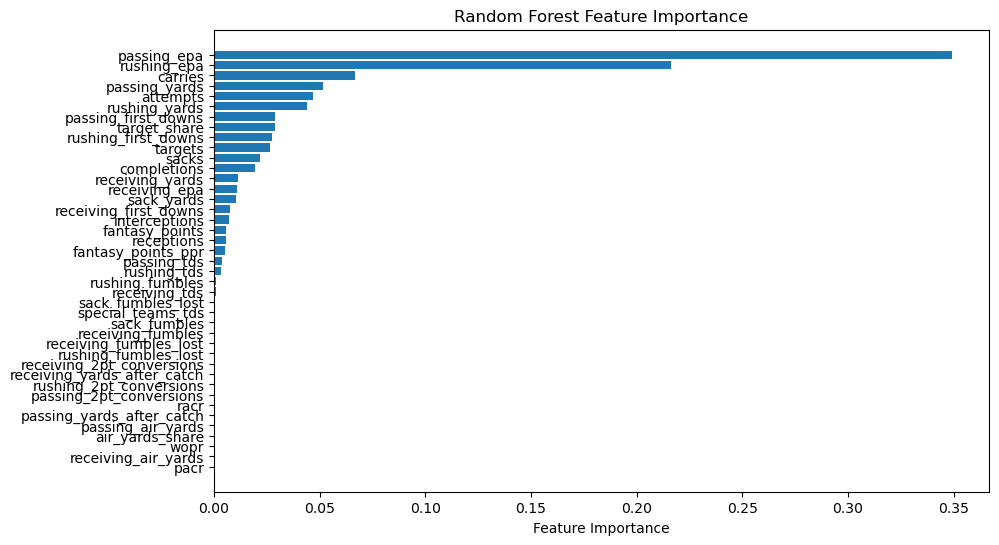

In [31]:
feature_names = X.columns
feature_importance = clf.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

C:\Users\timot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


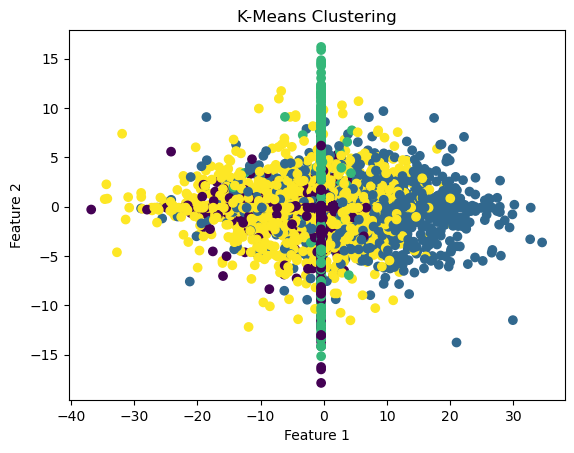

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the list of quantitative columns
quant_cols = ['completions', 'attempts', 'passing_yards',
              'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
              'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
              'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
              'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
              'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
              'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
              'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
              'receiving_air_yards', 'receiving_yards_after_catch',
              'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions',
              'racr', 'target_share', 'air_yards_share', 'wopr', 'special_teams_tds',
              'fantasy_points', 'fantasy_points_ppr']

# Define the feature columns and target column
X = grouped_by_week[quant_cols]
y = grouped_by_week['position_group']

# Train a Random Forest model to get feature importances
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Extract feature importances
feature_importances = clf.feature_importances_

# Sort the features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top N most important features (e.g., top 10)
top_n = 10
selected_feature_indices = sorted_indices[:top_n]

# Create a new dataframe with only the selected features
selected_features_df = X.iloc[:, selected_feature_indices]

# Apply K-Means clustering to the selected features
kmeans = KMeans(n_clusters=4, random_state=42)  
cluster_labels = kmeans.fit_predict(selected_features_df)

# Add the cluster labels back to the original dataframe
grouped_by_week['cluster_label'] = cluster_labels

# Visualize the clusters (for example, using a scatter plot)
plt.scatter(selected_features_df.iloc[:, 0], selected_features_df.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

C:\Users\timot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Unrecognized marker style ['s', 's', 'o', 'D', '^', 's', '^', 's', 's', 's', 's', 'D', 's', 's', 's', 'D', 'o', 's', 'D', '^', 's', 's', 's', 'o', 's', '^', 'D', 'o', 'o', 'D', 'D', 'D', '^', '^', 'D', '^', 's', 'D', 'D', '^', 'o', 'D', 'D', 'D', 's', 's', '^', 'o', '^', 's', '^', 'D', 'D', 'o', 'o', 's', '^', 'D', '^', 'o', 's', 's', 's', '^', 'D', 'o', 'o', '^', 's', 'D', '^', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', '^', 's', '^', 'o', 'o', 'D', 's', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', 'o', 'o', 'o', 'o', 'D', '^', 'D', 'D', 'o', 's', 's', '^', '^', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 's', 'o', 'D', 's', 'D', 's', 'D', 's', 'D', 's', 'D', 'D', 'D', '^', 'D', 'o', 'D', 's', 'D', 'D', 's', '^', 's', '^', 's', 'D', 's', 'D', 's', 'o', 's', '^', '^', 's', 's', 's', 'D', 's', 's', 'o', 'o', 's', 'D', 'D', 'o', '^', 'D', 'D', 'D', 'D', 'D', 'D', '^', 'o', 'o', 'D', 'D', 'D', 's', 'o', 's', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', 'o', 's', 'D', 's', 'o', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 's', 'D', '^', 'D', 'D', '^', 's', 'D', 'D', '^', 'D', 's', 's', 'D', 'D', '^', '^', 'D', 'o', 's', 's', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 's', 'o', 'D', 's', '^', 'o', 'D', 's', 's', '^', 'D', 'D', 'D', 's', 's', 's', 's', '^', 'D', '^', 's', 'D', 'D', 'D', 's', 's', '^', 'D', 'o', 'o', 's', 's', 'o', 'D', '^', 's', '^', 's', 's', 's', 's', 'D', 's', 's', 'D', 'o', '^', 's', 's', 's', 'o', 's', '^', 'o', 'o', 'D', 'D', 'D', '^', '^', 'o', 'D', '^', 'D', 's', 'D', 'D', '^', 'o', 's', 'D', '^', '^', 'D', 's', 'D', 's', 'o', 's', '^', 'D', '^', 's', '^', '^', '^', 's', 'o', 'D', 'D', 'D', 'o', 's', '^', 'D', '^', 'o', 's', 's', '^', 'D', 'D', '^', 'o', '^', 's', 'D', 'D', '^', '^', 's', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 'o', 's', 's', 'o', 'o', 'D', 'D', 'D', 'o', 's', 's', 's', 'D', '^', '^', '^', 'D', 'o', 'o', 'o', 'D', 'D', 'D', 's', 'o', 's', 's', 's', 'o', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 's', 'o', 's', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', 's', 'D', '^', '^', 's', 'D', 'o', 's', 'D', 's', '^', 's', '^', 'o', '^', 's', 's', 'D', 's', 'D', 's', 'o', 'o', 's', 'D', 'D', 'o', '^', 'D', 'D', 'D', 's', 'D', 'D', '^', 'o', 'o', 's', 'D', 'D', '^', 'D', 'o', 's', '^', 'o', '^', 'D', 's', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'o', 'D', 'D', 's', 's', 'D', 'o', 'D', 's', 'D', '^', 's', 'o', '^', 'D', 'D', 'D', '^', '^', 'D', 'D', 's', 'D', 's', '^', '^', 'D', 's', 's', '^', 'D', '^', 'D', 'D', '^', 's', 'D', 'D', '^', '^', 's', 's', 's', 'D', 'D', '^', 'o', 's', 's', 's', '^', 'D', 's', 's', 's', '^', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 's', 'D', 'D', 's', 's', '^', 'D', 'D', 's', 's', 's', 's', '^', 'o', 'D', '^', 's', 'D', 's', 's', 's', '^', 'o', 'D', '^', 's', '^', 's', 's', 'D', 'D', 's', 's', 'D', 'o', 's', '^', 's', 's', 's', 'o', 's', 'D', 'o', 'o', 's', 'D', 'D', 'D', '^', '^', 'D', '^', 's', 'D', 'D', 'D', '^', 'o', 'D', '^', 'D', 's', 'D', 's', 'o', 's', 'o', 's', '^', 'D', 'D', 'D', 'o', '^', 'D', 'o', 's', 's', '^', 'D', 'o', '^', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', '^', 's', '^', 'o', 'D', 's', 's', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', '^', 'D', 'o', 'o', 'o', 'D', '^', 'D', 'o', 'D', 's', 's', 'D', 's', 'o', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', 'D', 'D', 's', 's', 'D', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 's', 'o', '^', '^', 's', 's', '^', 's', 'o', '^', 's', 's', 'D', 's', 'D', 'D', 's', 'o', 's', 'D', 'o', 'D', 'D', 'D', 'D', '^', 'o', 'o', '^', 's', 'D', 'D', 'o', 's', '^', '^', 's', 'D', 'D', 'D', 'D', 's', 'o', 'D', 's', 's', 's', 'D', 'D', 'o', 'D', 's', 'D', '^', 's', 'o', '^', 'D', 'D', 'D', '^', 'D', 'D', 's', 'D', 's', '^', '^', 'D', 's', 's', '^', 'D', 's', 'D', 'D', '^', 's', 'D', 'D', '^', '^', 's', 's', 'D', '^', 'D', 's', 'D', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'o', 's', '^', 'D', 'D', 'o', 's', 's', 's', 's', '^', 'D', '^', 's', 'D', 'D', 's', 's', '^', '^', 'o', 's', '^', 's', 'o', 'D', '^', 's', 's', 's', 's', 'D', 'D', 's', 's', 's', '^', 's', 'D', 's', 's', 's', 'o', 's', 'D', 'o', 'o', 's', 'D', '^', '^', 'D', 'o', 'D', '^', 'o', 's', 's', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', 'D', 's', 'D', 'o', 's', '^', 'D', 's', '^', '^', '^', '^', 'D', 's', 'o', 'D', 'D', 'D', 'o', 's', 's', '^', 'o', 'D', 's', 's', 'D', '^', 'o', 's', '^', '^', 's', 'D', 'D', 'D', 'D', 's', 's', '^', 's', '^', 's', 's', 's', 'o', 'D', 'D', 'o', 'o', 's', 'o', 's', 's', 'o', 'D', 'D', '^', '^', 'D', 'o', 'o', 'o', '^', 'D', 'o', 'D', 's', 's', 'D', 's', 'o', '^', 'D', 'D', 'D', 'D', 'D', 'o', 's', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', 's', '^', 'D', '^', 's', 's', 'D', 'o', 'o', 's', 'D', 's', 'o', '^', 's', 'o', '^', 's', 's', 'D', 's', 'D', 's', '^', '^', 's', 'o', 's', 's', 'D', 'D', 'o', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', '^', 'o', 'o', '^', 's', 'D', 'D', '^', 'D', 'o', 's', '^', '^', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 's', 's', 's', 'D', 'o', 'D', 's', 'D', '^', 's', 'o', 'D', 'D', 'D', 'D', 's', 'D', '^', 'D', 'D', 's', 'D', 's', '^', '^', 'D', 's', '^', 'D', 'D', 'D', '^', 'D', '^', 's', 's', 'D', 'D', '^', 'D', 'o', 's', 's', 'D', 's', 's', 'D', 's', 's', 'o', 'D', 's', 'D', 's', 's', 'o', 'D', '^', 's', '^', '^', 'D', 'D', 'o', 's', 's', 's', 's', 's', '^', 'D', '^', 's', 'D', 'D', 's', 's', 's', '^', 'o', 'D', 's', 's', '^', 's', 's', 'D', 'D', 's', 's', 'D', 's', 'o', 's', 's', 'D', 's', 's', 's', 'D', 'o', 's', 'D', 'D', '^', '^', 'D', '^', 'o', '^', 's', 'D', 'D', '^', 'o', 's', 's', 'D', 'D', '^', 's', 'D', 'o', '^', 'D', 's', '^', '^', '^', 'D', 's', 'o', 'D', 'o', 's', 's', '^', 'D', 'o', '^', '^', 'o', '^', 's', 'D', '^', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', 's', 's', 'o', 's', 's', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 's', 'D', 'D', '^', '^', 'D', 'o', 'o', '^', 'D', 'o', 'D', 's', 's', 'D', 's', '^', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 'o', 's', 's', 'D', 'D', 'D', 's', 's', 'D', 's', 'D', 'D', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', '^', 'D', '^', '^', 's', 'D', 'o', 's', '^', 'D', 's', '^', 's', '^', 'o', '^', 's', 's', 'D', 's', 'D', 's', '^', 's', 'o', 'o', 's', 'D', 'D', 'D', 'o', '^', 'D', 'D', 's', 'D', '^', 'D', 'o', 'D', 'D', 'D', 'o', '^', '^', 's', 'D', 'D', 'D', 's', 's', 'o', '^', 'D', 'D', 's', 's', 'D', 'D', 'o', 'D', 's', 'D', 's', 'o', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', '^', '^', 'D', 's', 's', '^', 'D', '^', 'D', 'D', 's', 'D', 'D', '^', 's', 's', 'D', 's', 'D', '^', '^', 'D', 'o', 's', 's', 'D', 's', 's', 'D', '^', 's', 's', 's', 'o', 'D', 'D', 'D', 'D', 's', '^', 'o', 'D', 'D', '^', 'D', 'D', 'D', 'o', 's', 's', 's', 's', '^', '^', 's', 'D', 'D', 's', 's', '^', 'o', '^', 's', '^', 's', 's', 's', 's', 's', 'o', 'D', '^', '^', 's', 'D', 's', 's', 'o', 's', 'D', 'o', 'D', 'D', '^', 'D', 'D', '^', 'o', 's', 'D', 's', 'D', 'D', 'o', 's', 'D', 'D', 'D', 'D', 's', '^', 'o', 'D', 'D', 's', '^', '^', '^', '^', 'D', 's', 'D', 'D', 'o', 's', 's', 'D', 'o', 's', '^', 'D', '^', 's', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', '^', 's', 's', '^', 'o', 'o', 's', 's', 'o', 'D', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 'o', 'D', '^', 'D', 'o', 'o', 'D', 'o', 'D', 's', 's', 's', '^', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 's', 'o', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', 'D', 's', 'D', 'D', '^', 's', 'D', 's', '^', 'D', 's', 'o', 's', '^', 'o', '^', 's', 's', 's', 's', 's', 'o', 's', 'o', 'o', 's', 's', 'D', 'D', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', '^', 'o', 's', 'D', 'D', 'D', '^', 'D', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', 'o', 's', 's', 'D', 'D', 'o', 'D', 's', 'D', 's', 'o', '^', 'D', 'D', 'D', 's', '^', '^', 'D', 'D', 'D', '^', '^', 's', 's', '^', 'D', '^', 's', 'D', 'D', '^', 's', 'D', 'D', '^', 's', 's', 'D', '^', '^', 'D', 'o', 's', 's', '^', 'D', 's', 's', 'D', 'D', 's', 's', 's', 'o', 'D', 's', 's', 's', 'o', 'D', 'D', '^', '^', 'D', 'D', 'o', 's', 's', 's', 's', '^', 'D', '^', 's', 'D', 'D', 's', 's', '^', 's', '^', 's', 'o', 'D', '^', 's', '^', 's', 's', 'D', 'D', 's', 'o', 's', 's', 'o', '^', 's', 'D', 's', 's', 's', 'o', 's', '^', 'D', 'o', 'o', 'D', 'D', '^', 'D', 'D', '^', 's', 'D', 'D', '^', 's', 'D', 's', 'D', 'o', 's', '^', 'o', 'D', 's', '^', '^', '^', '^', 's', 'D', 'D', 'o', 's', 's', '^', 'D', 'o', 's', '^', 'D', 'D', '^', 'o', '^', 's', '^', '^', 'D', 's', 'D', 's', 'D', 'D', 's', 's', 's', 's', '^', 'o', 's', 's', 'o', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 'o', 'o', 'D', '^', '^', '^', 'D', 'o', 'o', 's', 'D', '^', 'D', 'o', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 'D', 'o', 's', 's', 'D', 'D', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', 's', '^', '^', '^', 's', 'D', 'o', 's', 'D', '^', 's', 'o', 'o', '^', 's', 's', 's', 'D', 's', 'D', 'D', '^', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', '^', 'o', 's', 'D', 'D', '^', 'o', 'D', 'o', 's', '^', 's', '^', 's', 's', 'D', 'D', 'D', '^', 'D', 's', 's', 's', 's', 'D', 'o', 'D', 's', 'D', '^', '^', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', '^', '^', 'D', 's', 's', 'D', 's', 'D', 'D', '^', 's', 'D', 's', '^', 'D', 'o', 's', 's', '^', 's', 'D', 'D', 's', 'o', 's', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', 's', '^', 'D', 'D', 'o', 's', 's', 's', 's', 's', '^', 'D', '^', 's', '^', 'D', 's', 'D', 'D', 's', 's', 's', '^', 'o', '^', 's', 's', 'o', 'D', '^', 's', '^', 's', 'D', 'D', 's', 'o', 's', 'D', 's', 'o', 'D', 'D', '^', 'D', 's', 's', 'o', 'o', 'o', 's', 'D', 'D', '^', 'D', 'D', '^', 'o', 's', 'D', 'D', 'o', 's', 'D', 's', 'D', 's', '^', 'o', 'D', 's', '^', 's', '^', 's', 'D', 'D', 'o', 's', '^', 'D', 's', '^', 'D', 'D', '^', 's', '^', '^', 's', 'D', 'D', 's', 's', 'D', 's', 's', 's', 's', '^', 'o', 'o', 's', 'o', 'D', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 'o', 'D', '^', '^', 'D', 'o', 'o', 'D', 'o', 'o', 's', 's', 'D', '^', 's', '^', 'o', '^', 'D', '^', 'D', 'o', 'D', 's', 's', 's', 'D', 's', 'o', 's', 'D', 'D', 'o', 'o', 's', 'D', 'D', 'D', '^', 's', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 's', 'D', '^', '^', '^', 's', 'D', 's', 'D', 's', 'o', 's', '^', 'o', '^', 's', 's', 's', 'D', 's', 'D', 'D', 's', 's', 's', '^', 'o', 'D', 'D', 'o', 'D', 'D', 'D', 's', 'D', 'D', '^', 'D', 's', 'o', 'o', 'o', '^', 'D', 'D', 'D', '^', '^', 'D', 's', 's', '^', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 's', 'D', 'o', 'o', 'D', 'D', '^', 's', '^', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', '^', '^', 's', 'D', '^', 'D', 'D', '^', 's', 'D', 'D', 'D', 'D', '^', 'D', 'o', 's', '^', 's', 'D', 's', 'D', 'D', 's', 's', 's', 's', 'D', 's', 's', 'o', 'D', 'D', 's', '^', 'o', 's', 's', 's', 's', '^', 'D', '^', 's', '^', 'D', 's', 'D', 's', 's', 's', '^', '^', 'D', 'o', 's', 'o', 'D', '^', 's', '^', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 's', 'o', 'D', 'D', '^', '^', 's', 'D', 's', 's', 's', 'o', 'D', 'o', 'o', 's', 'D', '^', 'D', '^', 'o', 'D', '^', 'o', 's', 'D', 'D', 'o', 's', 'o', 'D', 'D', 's', '^', '^', '^', '^', 's', 'D', 'D', 'o', 'o', 's', 'D', '^', 's', '^', 'D', 'o', 'o', '^', 's', 's', 'D', 'D', 's', 'D', 'D', 's', 's', 's', '^', 'o', 'o', 's', 's', 'o', 'D', 'o', 'D', 'o', 's', 'o', 's', 's', 'o', 'D', '^', '^', '^', 'D', 'o', 'o', 's', 'D', 's', 's', 'D', 's', 'o', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 's', 's', 's', 'D', 'D', 'o', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', '^', 'D', 'D', '^', '^', '^', 'D', 'D', 's', 'o', 's', '^', '^', 's', 's', 's', 's', 'D', '^', 's', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', '^', 'o', 'o', 'o', '^', 'D', 'D', '^', 'o', 'o', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 'D', 's', 'D', 'o', 'D', 's', 'D', '^', 's', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', '^', '^', 'D', 'D', 'D', 'D', '^', 's', 'D', 'D', 'D', 's', '^', 'D', 's', 's', '^', 'D', 's', 'D', 'D', 's', 'o', 's', 's', 'o', 'D', 's', 'D', 's', 's', '^', 'o', 'o', 'D', 's', '^', 'D', 'D', 'o', 's', 's', '^', 'D', '^', 'D', 'D', 's', 's', 's', '^', '^', 'D', 's', 'D', '^', 's', 's', '^', 's', 's', 'D', 'D', 's', 's', 'o', 's', 'D', 's', '^', '^', 's', 's', 's', 's', 's', 'o', 's', '^', 'D', 'o', 'o', 'D', 'D', 'D', '^', 'D', '^', 'o', 's', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', 'D', 'o', 's', '^', 's', 'D', 'D', '^', '^', '^', 's', 'D', 'o', 's', 'D', 'D', 's', '^', 'D', '^', 'o', '^', 's', 'D', '^', 's', 'D', 'D', 's', 'D', 'D', 's', 's', 's', 's', '^', 'o', 's', 's', 'o', 'D', 'o', 'D', 'D', 'D', 'o', 's', 'o', 's', 's', 's', 'o', 'D', '^', '^', 's', 'D', 'o', 'o', 's', 'D', 's', 's', 'D', '^', 'o', '^', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', 's', 'D', '^', '^', '^', 'D', 's', 'D', '^', 's', 'o', '^', 's', '^', 's', 's', 's', 'D', 's', 'D', 'o', 's', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', '^', 'o', 'o', '^', 'D', '^', 'o', 'o', 'D', 's', 's', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', '^', 'D', 'D', 's', 'D', 'D', 'D', '^', 's', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', '^', '^', 'D', 's', 'D', '^', 'D', 's', 'D', 'D', '^', 'D', 's', 's', 'D', 'D', '^', '^', 'D', 's', '^', '^', 'D', 's', 's', 'D', 'D', 's', 'o', 's', 's', 'o', 'D', 's', 'D', 's', '^', 'o', 'D', 'D', 's', 'D', 'D', '^', '^', 'D', 'D', 'o', 's', 's', 's', 's', '^', 'D', '^', 's', 'D', 'D', 's', '^', 's', '^', 's', 'D', '^', 's', 's', 's', 's', 'o', 's', 'D', 's', 's', '^', 's', 's', 's', 's', 'o', 's', 's', '^', 'D', 'o', 'o', 'D', 'D', 'D', '^', '^', 'D', '^', 'o', 'D', 's', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', 's', 's', '^', 'o', 'D', 'D', 's', '^', 's', '^', '^', 'o', 'D', 'D', 'o', 's', '^', 'D', 'D', '^', 's', 's', '^', 'D', 'D', '^', 'o', 's', 'D', '^', 'D', '^', 's', 'D', 'D', 's', 'D', 's', 'D', 'D', 's', 's', 's', 's', '^', 'o', 's', 'o', 's', 's', 'o', 'D', 'o', 'D', 'D', 'D', 'o', 'o', 's', 'o', 's', 's', 's', 'D', 'D', '^', 'D', 'o', 'o', 's', 'D', 'o', 's', 's', 'D', 's', 'o', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 'o', 's', 'D', 'D', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', '^', 'D', 's', 'o', 'D', 's', 'D', 'D', 's', 'D', 'D', '^', '^', 'D', 's', 'D', 's', '^', 'D', 'D', '^', 's', 'o', 's', '^', 's', 's', '^', 'o', 'D', 's', 'D', 'o', '^', 's', 's', 'o', 's', 's', 'D', 'D', 'D', '^', 'D', 'D', 'D', 's', 'D', '^', 'D', 'o', 'o', 'o', '^', 'D', 'D', 'D', '^', '^', 'o', 'o', 'D', 's', '^', '^', 'D', 'D', 'D', 'D', 's', 's', '^', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 'D', '^', '^', 'D', 'D', 'D', 's', 'D', '^', 'D', 's', 'D', 's', '^', '^', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', 's', 'D', '^', '^', 'D', 's', 's', '^', 'D', 's', 'D', 's', 'o', 's', 's', 'o', 'D', 'D', 's', 's', '^', 'D', 'o', 'D', 'D', 's', '^', '^', 'o', 'D', 'D', 'o', 's', 's', 's', 's', '^', 'D', '^', 's', '^', 'D', 'D', 'D', 's', 'D', '^', 's', '^', 'D', 'o', '^', 's', 'o', 'D', '^', 's', 's', 's', 's', 'D', 'D', 'o', 's', 'D', 's', 's', '^', '^', 's', 's', 's', 's', 's', 'o', 's', 's', '^', 'D', 'o', 'o', 'D', 'D', 'D', '^', '^', 'o', 'D', 's', 'D', 'D', 'D', '^', 'o', 's', 'D', 'D', '^', 's', 'D', 's', 'o', 'D', 'D', 's', '^', '^', 's', '^', 'D', '^', 'o', 's', 'D', 'D', 'o', 's', 'D', '^', 's', 's', '^', 'D', 'D', '^', 'o', '^', 's', 'D', '^', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', '^', 's', 's', '^', 'o', 's', 's', 's', 's', 'o', 'D', 'o', 'D', 's', 'D', 'D', 'o', 's', 's', 's', 'o', 'D', '^', '^', 's', 'D', 'o', 's', 'D', 'D', 'D', 'D', '^', 'o', '^', '^', 'D', 'o', 'D', 'D', 'D', 's', 's', 'D', 's', 'o', 's', 's', 'D', 'D', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'o', 's', 'D', 'D', 's', 'D', '^', '^', 's', '^', 'D', 'D', '^', 'o', 's', 'o', '^', 's', '^', '^', 's', '^', 'D', 's', 'D', 'o', '^', '^', 's', 'o', 'o', 's', 's', 'D', 'D', 'D', '^', 'D', 'D', 's', 'D', '^', 'o', 'o', 'o', '^', 'D', 'D', 'o', 'D', 's', 's', '^', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', 'D', 's', 's', 's', 'D', 'D', 's', 'D', 'o', '^', 'D', 'D', 'D', 's', '^', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 'D', '^', 'D', 'D', '^', 's', 'D', 'D', '^', 'D', 'D', '^', '^', 'D', 's', 's', '^', 'D', 's', 's', 's', 'D', 's', 'o', 's', 's', 'o', 'D', 's', 's', '^', 'o', 'D', 'D', '^', '^', 'D', 'D', 'o', 's', 's', 's', 's', 'D', '^', 's', 'D', 'D', 'D', 's', 's', 'o', '^', '^', 's', 's', 'o', 'D', 's', 's', 's', 'D', 'D', 'o', 's', 'D', 's', 's', 'D', '^', '^', 's', 's', 's', 's', 's', 'o', 's', 's', 'o', 'o', 'D', 'D', 'D', 'D', '^', 'D', 's', 'D', 'D', 'D', '^', 'o', 's', 'D', 'D', '^', 's', 'D', 'o', 's', '^', 'o', 'D', 'D', 's', '^', '^', 's', 'D', 'o', '^', 'D', 'D', 'o', 's', '^', 'D', 'D', 's', 's', '^', 'D', 'D', '^', 's', 'D', '^', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', '^', 's', 's', '^', 'o', 's', 's', 's', 's', 'D', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 'o', 'D', '^', '^', 'D', 'o', 'o', 's', 'D', '^', 'D', 'D', 'o', 's', 's', 'D', '^', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 'o', 's', 's', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', 's', 'D', 'D', 'D', '^', '^', 'D', 'o', 's', '^', 'D', '^', 'o', 's', 'o', '^', 's', '^', '^', 's', 's', '^', 'D', 'D', 's', 'o', '^', 's', '^', 'o', 'o', 's', 's', 'D', 'D', 'D', 'o', '^', 'D', 'D', 'D', 's', 'D', '^', 's', 'o', 'o', 'o', '^', 'D', 'D', 'D', '^', 's', 's', '^', 's', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 's', 's', 'D', 's', 's', 's', 'D', 's', 's', 'D', 'o', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', '^', 'D', '^', 'D', 'D', 's', 'D', 'D', '^', 'D', 's', 'D', '^', 'D', 's', '^', 'D', 's', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 's', 'D', 'o', 'D', 'D', 'D', '^', 'D', 'D', 'o', 's', 's', 's', '^', 'D', '^', 's', 'D', 'D', '^', 's', 'o', '^', '^', 's', 'o', 'D', '^', 's', 's', 's', 'D', 'D', 'o', 's', 'D', 's', '^', 's', 's', 's', 'o', 's', '^', 'o', 'o', 'D', 'D', 'D', 'D', '^', 'D', '^', 'D', 'D', 'D', 'D', '^', 'o', 's', 'D', 'D', '^', 's', 'D', 's', '^', 'o', 'D', 'D', 's', '^', '^', 's', '^', '^', 'o', '^', 's', 'D', 'o', 'o', 's', '^', 'D', 'D', 's', 's', '^', 'D', 'D', '^', 's', 'o', '^', 's', 'D', '^', 'D', '^', 's', 'D', 'D', 's', 'D', 'D', 's', 's', 's', '^', 'o', 's', 's', 's', 'o', 'D', 'o', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 's', 'o', 'D', 'D', '^', 'D', 'o', 'o', 'D', '^', 'D', 'D', 'o', 'D', 's', 's', 'D', 'o', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 's', 's', 's', 'D', 'D', 's', 'o', 's', 'D', 'D', '^', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', '^', 'D', '^', '^', 'D', 'o', 's', 'D', 'D', '^', 'o', 's', 'o', 's', '^', 's', '^', 's', 'D', 's', 'o', 's', 'o', 'o', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', '^', 's', 'o', 'o', '^', 's', 'D', 's', 's', '^', '^', 's', '^', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 's', 's', 's', 'D', 'o', 's', 's', 'D', 's', 'o', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', '^', 'D', 's', 's', '^', 'D', 's', 's', 'D', 'D', 's', 'o', 's', 'o', 'D', 'D', 's', 's', 's', 's', 'o', 'o', 'D', 'D', '^', 'D', 'D', 'o', 's', 's', 's', 's', 'D', 's', 'D', 'D', 'D', 's', '^', 's', '^', 'D', 's', 's', 'o', 'D', '^', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 'o', 's', 'o', 's', '^', 's', 's', 'o', 's', '^', 'o', 'D', 'D', 'D', 'D', 'D', '^', 'D', 's', 'D', 'D', 'D', '^', 'o', 's', 'D', 'o', 's', '^', 'D', 'D', 's', '^', '^', 's', '^', 'o', '^', 's', 'D', 'D', 'o', 's', '^', 'D', '^', 's', 's', '^', 'D', 'D', 'D', '^', 's', 'o', 'o', '^', '^', '^', 's', 'D', 's', 'D', 's', 'D', 'D', 's', 's', 's', '^', 'o', 's', 's', 's', 'o', 'D', 'o', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 's', 'o', 'D', 'D', '^', '^', 'D', 'o', 'o', 'D', 'D', 'D', 'o', 's', 'D', '^', 'o', '^', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 's', 's', 's', 'D', 's', 'o', 's', 's', 's', 'D', 'D', 's', 'o', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'D', '^', '^', 'D', 'o', 's', 'D', 'o', 's', 'o', 's', '^', 's', 's', '^', 'o', 's', 'D', 's', 'o', '^', 'o', 'o', 's', 's', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 'o', 's', 'D', 'D', 'D', '^', 's', '^', 's', '^', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 'D', 's', 's', 'D', 's', 's', 'o', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', '^', '^', 'D', 's', 'D', '^', 'D', 'D', '^', 's', 'D', 'D', 'D', 's', 's', '^', 'D', 's', 's', '^', 'D', 's', 'D', 'D', '^', 's', 'o', 'D', 's', 's', 's', 's', '^', 'D', 'o', 'o', 'D', 'D', '^', 'D', 'D', 'D', 'o', 's', 's', 's', 's', 'D', '^', 's', 'D', 'D', 'D', 'D', '^', 's', 'o', '^', '^', 's', 'o', 'D', '^', 's', 's', '^', 's', 's', 'D', 'D', 'D', 'o', 's', 's', 'o', 'D', 's', '^', 's', 's', 's', 's', 'o', '^', 'o', 'o', 'D', 'D', 'D', '^', 'D', '^', 'D', 's', 'D', 'D', 'D', 'o', 'D', 'D', 's', '^', 'o', 'D', 'D', 's', '^', '^', 's', '^', '^', 'o', '^', 'D', '^', 's', 's', '^', 'D', '^', 'D', '^', 'D', 'D', 'D', 'o', '^', 'o', '^', 's', '^', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', 's', '^', 'o', 's', 'o', 's', 's', 'o', 'D', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 's', 'o', '^', '^', '^', 'D', 'o', 'o', 's', 'D', 'D', 'D', 'o', 's', 's', 'D', 's', '^', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 's', 's', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', 'D', '^', 'D', 's', 'o', 's', 'D', 'D', '^', 'D', 'D', '^', '^', 'D', 'D', 'o', 's', '^', 'D', '^', 'o', 's', 'o', 's', '^', '^', 's', 's', 'D', 's', 'D', 's', 'o', 's', 'o', 'o', 's', 'D', 'D', 'o', '^', 'D', 'D', 'D', 's', 'D', '^', 'o', 'o', '^', 'D', 'D', 's', '^', 's', '^', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 's', 'D', 'D', 'D', 'o', '^', 'D', 'D', 's', 'D', 'D', 's', 'D', 's', '^', '^', 'D', 's', '^', 'D', 'D', 'D', 's', 'D', 'D', '^', 'D', 's', '^', 's', '^', 'D', 's', 'D', 'o', 'D', 's', 's', 'D', 's', 's', 's', '^', 'D', 'o', 'D', 'D', '^', 'D', 'D', 'o', 's', 's', 's', 'D', '^', 's', 'D', '^', 'D', 'D', 'D', 's', 's', '^', 's', '^', 'D', '^', 'o', 'D', '^', 'D', 's', 's', 's', 's', 'D', 'D', 'o', 's', 's', 'o', 's', 'D', '^', 's', 's', 's', 's', 'o', 's', 'o', 'o', 'D', 'D', 'D', '^', 'D', 'D', '^', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', 'o', 's', '^', 'o', 'D', 's', 's', '^', 'D', '^', 'o', 's', '^', 's', 's', '^', 'D', '^', 'D', 'D', 'D', 'o', 's', '^', 'D', 'D', '^', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 's', 'o', 's', 's', 's', 'D', 'o', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 'o', 'o', 'D', '^', '^', '^', 's', 'D', 'o', 's', 'D', 'D', 'D', 'o', 's', 's', 'D', 's', 'o', '^', 'D', 'o', 'D', 'D', 's', 's', 'D', 's', 's', 's', 's', 'D', 'D', 's', 'o', 'D', 's', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 'o', 'D', '^', 'D', 'D', 'o', 'D', '^', '^', '^', 'D', 'D', 's', 'D', 'o', 'o', 's', '^', 's', 's', '^', 's', 'D', 's', 'o', '^', 'o', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 'D', 'D', 'o', 'o', 'o', '^', 'D', 'D', 'D', '^', 's', 's', 's', '^', 'D', 'D', 'o', 's', 'D', 'D', 'D', 'D', 's', 'o', '^', 'D', 's', 'D', 's', 'D', 'o', 's', 'D', 'o', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', '^', '^', 'D', 's', 's', '^', 'D', 'D', 'D', '^', 's', 'D', 'D', 'D', 's', 's', 'D', '^', 'D', 's', 's', 'D', 's', 'D', '^', 'D', 's', 's', 's', 'D', 'D', 's', 'D', '^', 's', 's', '^', 'D', 'o', 'D', 'D', 'D', 's', '^', 'o', 'D', 'D', 'o', 's', 's', 's', 's', '^', 'o', 'D', '^', 's', 'D', 'D', 's', '^', 's', '^', 'o', '^', 'D', 's', 'D', 's', '^', 'D', 'D', 'o', 's', 'D', 's', 'D', '^', 'o', 'D', 'D', 'D', 's', 's', 'o', '^', '^', '^', 's', 's', 's', 'D', 'o', 's', 'o', 'o', '^', 's', '^', 's', 'o', 'D', 'D', 'o', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', '^', 's', 's', 'D', 's', '^', 's', 's', 's', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 's', 'D', 'D', '^', '^', 's', '^', 'D', 'o', 'D', 's', 'D', '^', '^', 's', 's', '^', '^', 's', 'D', 'D', 's', 'o', 'D', 'D', 's', 'o', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 'o', 's', 'o', 's', '^', 'o', 's', 's', 'o', 'o', 'D', 'D', 'D', 'D', 'o', 's', '^', 'D', 'D', '^', 's', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 'o', 'D', 'D', 'D', 'D', '^', '^', 's', '^', 'D', 'o', 'D', '^', 's', 'D', 'D', 's', 's', 'D', 'D', '^', 's', 'D', '^', 'o', 'D', 'D', 'D', 'o', '^', 's', 'D', 'D', 'D', 's', 's', 'D', 'o', 'D', 'D', '^', '^', 'D', 'D', '^', 'D', 's', 's', 'D', '^', 's', 'D', 'D', 'o', 'D', 'D', 'o', '^', '^', 's', 's', 'o', 'D', '^', 's', '^', 's', 's', 's', 's', 'D', 's', 'o', 's', 'D', 's', 's', 's', 'o', 's', '^', 'o', 'o', 'D', 'D', '^', '^', 'D', 'D', '^', 's', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', 's', 'D', 'o', 's', '^', 's', 'o', 'D', 'D', 's', '^', '^', 's', '^', 'D', 'o', 's', 'D', 'D', 'o', 's', 'D', 'o', 'o', '^', 's', 's', '^', 'D', 'o', '^', 'D', '^', 'D', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', 's', 'o', 'o', 'D', 's', 's', 'D', 'D', 'D', 'D', 'o', 'o', 's', 's', '^', 's', 'D', '^', '^', 'D', 'o', 'o', 's', 'D', 'D', 'o', 's', 'D', '^', '^', 'D', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'o', 's', 's', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 'D', 'o', '^', '^', '^', 's', 'D', 's', '^', 'D', 'o', 'o', '^', 's', '^', 'o', '^', 'D', 's', 's', '^', 'o', 's', 's', 'o', 'D', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 'o', 'o', '^', 's', 's', '^', 'o', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 'D', 's', 'D', '^', 'D', 's', 'D', 's', '^', '^', 'D', 's', '^', 'D', 's', '^', 'D', 'D', 's', 'D', '^', 'D', 's', 'D', 'D', '^', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 'o', 'D', 's', 's', 's', '^', 'D', 'D', 'D', 'o', '^', 'D', 'D', 'o', 's', 's', 'D', 's', 'D', 'D', 's', 's', '^', 's', '^', '^', 's', '^', 'D', 's', 's', 'D', 'D', '^', 's', 'D', 's', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 'D', 'D', 'D', '^', 's', 's', 's', 's', 's', 'D', 's', 'o', 's', 'o', 'D', '^', '^', 's', 's', 'o', 's', 'o', '^', 'o', 'o', 'D', 'D', '^', '^', 'D', 'D', 'D', '^', 'D', 'D', 'D', 'o', 's', 's', 'D', '^', 's', 'D', 's', 's', 'o', 'D', 'D', 's', '^', '^', 's', '^', 'D', 'o', 's', 'D', 'D', '^', 'o', '^', 'D', 'o', 'o', 'D', '^', 's', '^', 'D', '^', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 'D', 'D', 's', 's', 's', 'o', 'o', 'D', 's', 's', 's', 'D', 'D', 'D', 'o', 'o', 's', '^', 's', 'D', '^', '^', 'D', 'o', 's', 'D', 'D', 'o', 'D', 's', 's', 'D', '^', '^', '^', 'D', 'D', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 's', 's', 'D', '^', 's', 'D', 's', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 'o', '^', '^', 's', 's', '^', 'D', 'o', 'o', '^', 's', '^', '^', 'o', '^', 'o', 'D', 'D', 's', '^', 'o', 's', 's', 'D', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', '^', 'D', 'D', 'o', 'o', 'o', '^', 'o', '^', 'D', 'o', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 's', 'D', 'D', 'D', '^', 's', 'D', 'D', '^', 'o', 's', 's', 's', 'D', 's', 's', 'D', 's', 's', 's', 'D', 'D', 's', 'o', 'D', 's', 's', 'D', '^', 'D', 'D', 'o', 's', '^', 'D', 's', 'D', 's', 's', '^', '^', 'D', 'o', 's', 's', 'o', 's', '^', 'D', 's', 'D', 'D', '^', 's', 'D', 's', 'D', 'D', '^', 's', 's', 's', 'D', 'D', 's', 's', 's', 's', '^', 's', 's', 'D', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'D', '^', 's', '^', 's', 's', 's', 'D', 's', 'D', 'o', 's', 'o', '^', 's', 's', 'o', 's', '^', 'o', 'o', '^', '^', 'D', 'D', '^', 'D', 'D', 'D', 'D', '^', 'o', 's', 'D', 'D', '^', 's', 'D', 's', 'o', 'D', 'D', 's', '^', '^', '^', '^', 'o', 's', 'D', 'o', '^', 'D', 'o', 'o', '^', 's', '^', 'D', 's', 'D', '^', 's', 's', 's', 'D', 'D', 's', 's', 's', '^', 'o', 'o', 'D', 's', 'D', 'D', 's', 'D', 'o', 'o', 's', 'D', '^', 'o', 's', 'D', 'o', 'D', 's', 's', 'D', '^', '^', 'D', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', '^', 's', 'D', 'D', 'o', 'D', 's', 'D', 'D', 'D', 'D', 'o', 's', 's', '^', 'D', 'o', 'o', '^', '^', '^', 's', '^', 'D', 'o', 's', '^', 's', 's', 'D', '^', 'D', 'D', 'D', '^', 'D', 'o', 'o', '^', '^', '^', 's', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', '^', 'D', 'D', 's', 'D', '^', 'D', 'D', '^', 's', 'D', '^', '^', 'D', 's', 'D', '^', 'o', 's', 's', 'D', 's', 's', 'D', 'D', 's', 's', 's', 'o', 'D', 's', 'o', 's', 'D', 'D', 'D', '^', 'D', 'D', 'D', 'o', 's', 's', '^', 's', '^', 's', '^', 'D', 's', 'D', 'o', 'D', 'D', '^', 's', 'D', 'D', 's', '^', 's', 's', 'D', 'D', 's', 'D', 's', '^', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', '^', 's', '^', 's', 's', 's', 'D', 's', 'D', 'o', 's', 's', 'o', 's', '^', 's', 's', 's', '^', 'o', 'o', 'D', 'D', '^', 'D', 'D', '^', 'D', 'D', 'D', 'D', '^', 'o', 'D', '^', 's', 'o', 'D', 'D', 's', '^', 's', '^', 'D', 'o', 's', 'D', 'D', 'o', 's', 'D', 's', 's', '^', 'D', '^', '^', 's', '^', 'D', '^', 'D', 's', 's', 'D', 'D', 's', 's', 's', '^', 'o', 's', 'o', 's', 'D', 's', 'D', 'o', 'D', 's', 'D', 'o', 'o', 's', '^', 's', 'D', '^', '^', 'o', 'o', 's', 'D', 's', 's', 'D', 'o', '^', '^', 'D', 'o', '^', 's', 'D', 's', 's', 'D', 'D', 'D', 'D', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'D', '^', 'D', 's', 'D', 'o', 's', '^', 'D', 'o', 'o', 's', '^', 'o', 's', '^', 'D', 'D', 'o', 'o', 's', 's', 'D', 'D', '^', 'D', 'D', 's', 'D', 'o', 'o', 'o', '^', 's', '^', 'o', '^', 'D', 'D', 's', 's', 'o', 'D', 'D', 'D', 'D', 's', 'o', '^', 'D', '^', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', '^', '^', 'D', 's', 's', 'D', 'D', '^', 'D', 'o', 's', 'D', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 's', 's', 'o', 's', 's', 'D', 'D', 'D', 'D', 'D', 'o', 's', 's', 's', 's', 'D', 'D', 's', 's', 'D', '^', 'D', 's', 's', 'o', 'D', '^', 's', 'D', 'D', 'o', '^', 's', 's', 'D', 'D', 's', 's', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 'o', 'D', 'D', 'o', 'D', '^', 's', '^', 's', 's', 's', 'D', 's', 'o', 's', 'o', 's', '^', 's', 's', 's', 'o', 's', 'o', '^', 'o', 'D', 'D', '^', '^', 'D', 'D', 'D', '^', 'o', 's', 'D', 'D', '^', 's', 'D', 's', '^', 'o', 's', '^', '^', 's', 'D', '^', 'o', 's', 'D', 'o', 'D', 'o', '^', 's', 's', 'D', 's', '^', 's', '^', 'D', 's', 'D', 's', 'D', 'D', 's', 's', 's', '^', 'o', 's', 'o', 's', 's', 's', 'D', 'D', 's', 'D', 'o', 's', 's', 'D', 'D', '^', '^', 'D', 'o', 's', 'D', 'o', 'o', 's', 's', 'D', '^', 'o', '^', '^', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', 'D', 'o', '^', 'D', 'D', 'o', '^', 'D', 'o', 'o', '^', '^', '^', 's', '^', 'D', 's', 'D', 'o', 's', 'o', 'D', 'D', '^', 'D', 'D', 'D', 's', 'D', '^', 'D', 'D', 'o', 'o', 'o', '^', 's', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 'D', 'D', 'o', 'D', 's', 'o', '^', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', '^', '^', 's', 'D', 'D', '^', 'D', 'o', 's', 'D', 's', 's', 'D', 's', 's', 'o', 'D', 'D', 's', 's', 's', 's', '^', 'D', 'D', 'D', '^', 'D', 'D', 'o', 's', 's', 's', 'D', 's', '^', 's', '^', 'D', 's', 'D', 's', 's', 'D', 's', 'D', '^', 's', 'D', 'D', 's', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 's', 'D', '^', 's', '^', 's', 's', 's', 'D', 's', 's', 'o', 's', 'o', 'D', 's', '^', 's', 's', 's', 'o', 's', 'o', '^', 'o', 'o', 'D', 'D', '^', '^', 'o', 'D', '^', 'D', 'D', 'D', '^', 'o', 'D', 'D', '^', '^', 's', 'D', 's', '^', 'o', 'D', 's', '^', '^', 'o', 's', 'D', 'o', 's', 'D', 'o', '^', 's', 'D', '^', 's', 'D', '^', 's', 'D', 's', 'D', 's', '^', 'o', 's', 's', 's', 'D', 'D', 's', 'o', 'o', 's', '^', '^', 's', 'D', 'D', '^', 'D', 's', 'D', 'o', 's', 's', 'D', '^', 'o', '^', 's', 'D', 'D', 'D', '^', 's', 's', 'D', 's', 'D', 'o', 'D', 's', 'D', 's', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', '^', 'D', 's', 'D', 'o', 's', '^', 'D', 'o', '^', '^', 'o', 'D', 'o', 's', '^', 'o', 's', 's', 'o', 'D', 'D', 'D', 'D', '^', 'o', 'o', 'o', 'D', '^', 's', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 's', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'D', '^', '^', 'D', 's', 'D', '^', 'D', 'o', 'D', 's', 'D', 's', 'o', 'D', 'D', 's', 's', 'o', 's', 'D', 'D', '^', 'D', 'D', 's', '^', 's', 'D', 'D', 's', 's', 's', '^', 'D', 's', 's', 's', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 'D', '^', 's', 's', 's', 'D', 'D', 's', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 'D', '^', 's', 's', 's', 's', 's', 's', 'D', 'o', 's', '^', 's', 's', 's', 'o', 's', 'o', '^', 'o', 'o', 'D', 'D', '^', '^', 'D', 'D', 'D', 'D', 'D', '^', 'o', 's', 's', 'D', 'D', 's', 'D', 's', '^', 'o', 'D', 'D', 's', '^', 's', '^', 'D', '^', 'o', 's', 'D', 'D', 'o', 'o', '^', 's', 'D', '^', 's', 's', '^', 'D', 'D', 'D', 's', 's', 'o', 's', 'D', 's', 's', 'o', 'D', 'o', 's', 'o', 'o', 's', '^', 's', 'D', 'D', '^', '^', 'D', 'o', 'o', 's', 'o', 'D', 's', 'D', 'o', '^', '^', 's', 'D', 'D', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 'D', 'o', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'o', '^', 'D', 's', 'D', 's', '^', 'D', '^', 'o', '^', 's', '^', 'o', 'D', 's', 'D', 's', 'o', 's', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', '^', 'D', 'o', 'o', 'o', '^', '^', '^', 's', '^', 'o', '^', 'o', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', '^', 'D', 'D', 'D', '^', '^', 'D', 's', 'D', '^', 'D', 'o', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', 'o', 'D', 's', 's', 'D', 'D', 'D', '^', 'D', 'D', 'D', 'o', 's', 's', 's', 's', 'D', '^', 'D', 's', 's', '^', 's', '^', 'D', 'D', 's', 's', 'D', 'D', 's', 's', 's', 'D', 'o', '^', 's', 's', 's', 'D', 'D', 's', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 's', 'D', 'o', 'D', '^', 's', 's', 's', 's', 's', 'D', 's', 'o', 'D', 'o', 's', '^', '^', 's', 's', 's', 'o', 's', 'o', '^', 'o', 'o', 'D', 'D', '^', '^', 'D', 'D', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', 's', 'D', 's', 'o', 'D', 's', '^', '^', 's', '^', 'D', 'D', 'o', 'o', 's', 'D', 'o', 'o', '^', 's', '^', '^', 'D', 's', 'D', 'D', 'D', 's', 's', '^', 'o', 's', 'o', 's', 'D', 'o', 'o', 's', '^', 's', 'D', '^', '^', '^', 'o', 'o', 'D', 'o', 'o', 'D', '^', '^', '^', '^', 'D', 'D', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 'D', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', 'D', 's', 's', '^', 'D', 'o', 'o', 's', '^', 's', '^', 'D', 's', 'D', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'D', '^', 'D', 'o', 'o', 'o', '^', '^', 'o', 's', 'o', 'o', '^', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 'D', 's', 'D', '^', 'D', 's', 'D', 's', 'D', '^', 'D', 'D', 's', '^', 'D', 's', 'D', 'D', '^', '^', 'D', 'o', 's', 's', 'D', 's', 's', 'D', 's', 'D', 's', 'o', 'D', 'D', 's', 'D', 's', 'o', 'D', 's', 's', 's', '^', 'D', '^', 'D', 'D', 'o', 's', 's', 's', '^', 's', 'D', '^', 'D', 's', 's', '^', '^', 'D', 'D', 's', 's', 's', 'D', 'D', 'D', 's', 'D', '^', 's', 's', 'o', '^', 's', 's', 'D', 's', 's', 'D', 's', 'D', '^', 'D', 's', 's', 'D', 's', 'D', 'o', 'D', '^', 's', 's', 's', 's', 'D', 's', 'D', 's', 'o', 's', '^', '^', 's', 's', 's', 'o', 's', 'o', 'D', 'D', '^', '^', '^', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', 'D', 's', 'o', 'D', 's', '^', 'D', 'o', 's', 'D', 'D', '^', 's', 'o', 'o', '^', 's', '^', 'D', 'o', '^', 's', '^', 'D', 's', 'D', 's', 's', '^', 'o', 's', 'o', 's', 's', 's', 'o', 'D', 'D', 'D', 'o', 'o', 's', 's', '^', '^', 'D', 'o', 's', 'D', 'o', 'D', '^', 'o', '^', '^', 'D', 'D', 'D', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'D', '^', 'D', 'D', 's', '^', 'o', 'o', '^', 's', '^', 's', 's', '^', 'D', 'D', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', '^', 'D', 'o', 'o', '^', 's', '^', '^', 's', '^', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 'D', 's', 'o', '^', 'D', 'D', 's', 'D', '^', 'D', 'D', 's', '^', 'D', 's', 'D', 'D', 's', 'D', '^', '^', 'D', 'D', '^', 'D', 'o', 's', 's', 's', 'D', 's', 's', 'o', 'D', 'D', 's', 's', 'o', 'D', 's', 's', 's', '^', 'D', 'D', 'D', '^', '^', 'D', 'D', 's', 's', 's', 's', 'D', '^', 'D', 's', 's', '^', '^', 'D', 'o', 'D', 's', 's', 's', 's', 'D', 'D', 'D', 's', 's', 's', '^', 'o', '^', 's', 's', 'D', 'D', 's', 's', 'D', 's', '^', 's', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', '^', 's', 's', 's', 's', 's', 'D', 's', 's', 's', 'o', 's', '^', 's', 's', 's', 's', 'o', 's', 'o', 'o', 'o', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 'D', 'D', 'D', '^', 's', 'D', '^', 's', 'D', 'o', 's', '^', 'o', 'D', 's', '^', '^', 'o', 's', 'D', 'D', '^', 's', 'o', 'o', '^', 's', 's', 'D', '^', 'D', 'o', '^', 's', '^', 'D', '^', 's', 'D', 's', 'D', 's', 's', '^', 'o', 's', 'o', 's', 's', 'o', 'D', 'o', 'D', 'D', 'o', 'o', 's', 's', '^', 's', 'o', 'D', '^', '^', 'D', 'o', 's', 'D', 'D', 'o', 'o', 's', 'D', '^', 'D', '^', 'o', '^', '^', 'D', 'D', 'D', 'D', '^', 's', 's', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', '^', 's', 'D', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'D', '^', 'D', '^', 's', 'D', 'o', 's', '^', 'D', 'o', 'o', '^', 's', '^', 's', '^', 'D', 'D', 's', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', '^', 'D', 'D', 'o', 'o', 'o', 's', '^', '^', '^', 'D', 'o', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', 's', 'o', '^', 'D', 's', 'D', 'D', 's', '^', 'D', 's', 'D', '^', 'D', 'D', 's', 'D', '^', 'D', 'D', 'D', '^', '^', 'D', 'o', 's', 's', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 'o', 's', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', '^', 's', 'D', 's', 's', '^', '^', 'D', 'D', 's', '^', 's', 'D', '^', 'D', 'D', '^', 's', 's', '^', 'o', 's', 's', 's', 'D', 's', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 's', 'D', 'o', 'D', 's', 's', 's', 's', 's', 'D', 's', 's', 's', 'o', 's', '^', 's', 's', 's', 'o', 's', 'o', 'o', 'D', 'D', '^', '^', 'o', 'D', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', '^', 's', 'D', '^', 'D', 's', '^', '^', '^', 'o', 's', 'D', '^', 's', '^', 'o', '^', '^', 's', 'D', '^', 'D', 's', 'o', '^', 's', 's', '^', 'D', '^', 'D', 'D', 's', 'D', 's', 'D', 's', 's', '^', 'o', 's', 'o', 's', 's', 's', 'o', 'D', 'o', 'D', 'o', 'o', 's', 's', '^', 's', 'D', 'D', '^', '^', '^', 'D', 'o', 's', 'D', 'D', 'o', 'o', 'D', 's', 'D', 'D', '^', 'o', '^', '^', 'D', 'o', 'D', 'D', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', '^', 'D', '^', 's', 'D', 'o', 's', 'D', 'o', 'o', '^', 's', '^', '^', 'o', '^', 'D', 'D', 'o', 's', 's', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 's', 'D', 'D', 'D', '^', 'D', 'o', 'o', '^', '^', 'o', 's', '^', '^', 'D', 's', 'o', 'D', 'D', 'D', 'D', 's', 'D', 's', 'D', 'D', 'o', 's', 'o', '^', 'D', 'D', 's', 'D', '^', '^', 'D', 's', '^', 'D', 's', 'D', '^', 'D', 'D', 's', 'D', '^', 'D', 's', 'D', 'D', '^', 'D', 'o', 's', 's', 'D', 's', 's', 'D', 's', 'o', 'D', 'D', 'D', 's', 's', 'o', 'D', 's', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', '^', 'D', 'D', 's', 's', 's', '^', '^', 'D', 'D', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', 'D', '^', 's', 's', 'D', 's', 's', 'D', 's', '^', 's', 's', 'D', '^', 'D', 'D', 's', 's', 's', 'D', 's', 'o', 'D', '^', 's', 's', 's', 's', 's', 'D', 's', 'o', 's', 's', 'o', 's', 'D', '^', 's', 's', 's', 's', 'o', 'o', 'o', 'D', 'D', '^', 'o', 'D', '^', 'o', 'D', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', '^', 's', 'D', 's', '^', 'o', 'D', 's', '^', '^', '^', 'o', 's', 'D', 'D', '^', 'o', 's', '^', 'o', '^', '^', 's', 'D', '^', 's', 'o', '^', 's', 'D', '^', '^', 's', 'D', 's', 'D', 's', 's', 's', 'o', 's', 'o', 's', 'D', 's', 'D', 'o', 'D', 'D', 'o', 'o', 's', 's', 'o', 'D', '^', '^', 'D', 'o', 's', 'D', 'D', 'o', 's', '^', 'D', 'D', '^', '^', '^', 'D', 'D', 'D', 'D', '^', 's', 's', 's', 'D', 's', 's', 'D', 'D', 'o', 's', 'D', 'D', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', '^', 's', 'D', 's', '^', 'D', 'o', 's', '^', 'o', '^', 'D', 'o', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 'D', 'D', '^', 'D', 'D', 'o', 'o', 's', '^', 'o', '^', '^', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 's', 'D', 's', 'D', 'o', 's', 'o', '^', 'D', 'D', 's', 'D', '^', 'D', 's', '^', 'D', 's', 'D', '^', 'D', 'D', 's', 'D', '^', '^', 'D', 'D', 'D', '^', '^', 'D', 's', 's', 'D', 's', 's', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', 'D', 's', 'o', 'D', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 'D', 's', 's', '^', '^', 'D', 's', 's', 's', '^', 's', 'D', 'D', 'D', '^', 'D', 's', 'D', 'o', '^', 's', 's', 's', 'D', 's', 's', 'D', 's', '^', 'D', '^', 's', 's', 'D', 'o', 'D', '^', 's', 's', 's', 's', 'D', 's', 'D', 'o', 's', 's', 'o', 'D', 's', 's', 's', 'o', 'o', 'D', 'D', '^', 'D', '^', 'o', 'D', '^', 'o', 'D', 's', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', '^', 's', 'D', 'o', 's', 'o', 'D', 's', '^', '^', 'D', 'o', 's', 'D', 'D', 'o', 's', '^', 'o', '^', 'D', '^', 'D', 's', 'o', '^', 's', 'D', '^', 'D', 's', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 's', 's', 'o', 'D', 'o', 'D', 'D', 'o', 'o', 's', '^', 's', 'o', 'D', '^', '^', '^', 'D', 'o', 's', 'D', 'o', 'o', 's', 'D', 'D', '^', '^', 'D', 'D', 'D', 's', 's', 's', 's', 's', 'D', 'D', 'o', 'o', 's', 's', 'D', '^', 'D', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', 'o', '^', 's', 'D', 's', '^', 'D', 'o', 'o', '^', '^', 'o', '^', 's', 'D', 'o', '^', 'o', 's', 's', 'D', 'D', 'D', 'o', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', 'o', '^', '^', '^', 's', 's', '^', 'o', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 'o', 's', '^', 'D', 'D', 's', 'D', '^', 's', '^', 'D', 's', 'D', '^', 'D', 'D', 's', 'D', '^', 'D', 'D', '^', '^', 'D', 'o', 's', 's', 'D', 's', 'D', 'D', 's', 'o', 'D', 's', 's', 'o', 'D', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', 'D', 's', 's', '^', 'D', '^', 'D', 's', 's', 'o', '^', 's', 'D', 'D', 'D', 's', 'D', '^', 'D', 'D', 's', 'D', 'o', 's', 's', 's', 'o', 'D', 'D', 's', 's', 's', 's', '^', 's', 'D', 'D', 'D', 's', 's', 'D', 's', 'o', 'D', '^', 's', 's', 's', 's', 's', 'D', 's', 's', 'o', 'D', 's', 'D', '^', 's', 's', 's', 's', 'o', 'o', 'D', 'D', '^', 'D', 'o', 'D', 'D', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', '^', 's', 'D', 'o', 's', 'D', 's', '^', '^', 'o', 's', 'D', 'D', 's', 'o', '^', 's', 'D', 's', '^', 's', 'D', '^', 'D', 's', 'D', 'D', 's', 's', 's', '^', 'o', 'o', 's', 'o', 'D', 'o', 'D', 'D', 'o', 'o', 's', '^', 's', 'o', 'D', '^', '^', 'D', 'o', 'o', 's', 'D', 's', 'D', '^', '^', 'D', 'o', 'o', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', 'o', '^', 'D', 's', 'D', 's', '^', 'D', 'o', 'o', '^', 's', '^', '^', 'o', '^', 'D', '^', 'o', 's', 's', 'o', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 's', 'D', 'D', 'D', '^', 'D', 'o', 'o', '^', 'D', '^', 's', '^', 'o', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', 'o', 'D', 's', 's', 'D', 'D', 'o', 's', 'o', '^', 'D', 'D', 's', 'D', 'o', '^', 'D', 's', '^', 'D', 's', '^', 'D', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', '^', '^', 'D', 's', 's', 'D', 's', 's', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', 's', 's', 'o', 'D', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'o', 's', 's', '^', 's', '^', 'D', 's', 's', 'D', 'o', 'o', '^', 'D', 's', 's', 's', 's', 'o', '^', 's', 's', 'D', 'D', 'o', 'D', 's', 'D', '^', 'D', 'D', 's', 'D', 'o', 's', 's', 's', 's', 'D', 'D', 's', 's', 'o', 's', '^', 's', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 'D', '^', 's', 's', 's', 's', 's', 's', 'o', 'D', 's', 'D', '^', 's', 's', 's', 'o', 'D', 'o', 'D', 'D', '^', '^', 'o', 'D', 'o', 's', 'D', 'D', 'D', '^', 'o', 's', 's', '^', 'D', 's', 'D', '^', '^', '^', 'D', 'o', 's', 'D', 'D', '^', 'o', 's', 'D', 'o', 's', '^', 'D', 's', 'o', '^', 's', 's', 'D', '^', '^', 's', 's', 'D', 's', 's', '^', 'o', 's', 'o', 's', 's', 'o', 'D', 'o', 'D', 'D', 'o', 'o', 's', 'o', 's', '^', 's', 'o', 'D', '^', '^', 's', 'o', 's', 'D', 'o', 'D', '^', 'D', '^', '^', '^', 's', 'D', 'o', 'D', 'D', 'D', '^', 's', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', '^', 's', 'D', 's', 'D', 'o', 'o', '^', 's', '^', 'o', '^', 'D', 'o', '^', 'o', 's', 's', 'o', 'D', 'D', 'o', 'D', 'D', 'D', 's', 'D', 'D', 'D', '^', 's', 'D', 'o', 'o', '^', 'D', '^', '^', '^', 'o', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', 'o', 'D', 's', 'D', 'D', 'o', 'D', 's', '^', 'D', 'D', 's', 'D', '^', 'D', 'D', 's', '^', 'D', 'D', 'D', 'D', '^', 'D', 'D', '^', '^', 'D', 's', 'D', 's', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 'D', 's', 's', 'o', 'D', 's', '^', 'D', 'D', 'D', 'D', 'D', 'D', 'o', 's', 's', 's', '^', 'D', 's', 's', 'o', '^', 'D', 'D', 's', 'D', 's', '^', 's', 's', 'D', 'D', 's', 'D', '^', 's', 'D', 's', 'D', 'o', '^', 's', 's', 's', 'D', 's', 's', 's', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', '^', 's', 's', 's', 's', 's', 'D', 's', 'o', 'D', 's', '^', 's', 's', 's', 'o', 's', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'D', '^', 'o', 's', 'D', 's', 'D', 's', '^', 'o', 'D', 'D', 's', '^', '^', 'D', 'o', 's', 'D', 'D', '^', '^', 'D', 'o', '^', 's', '^', 'D', 's', 'o', '^', 's', 's', 'D', '^', 's', 'D', 's', 'D', 'D', 's', 's', 's', '^', 'o', 's', 'o', 's', 'o', 'D', 'o', 'D', 'D', 'o', 'o', 's', '^', 's', 'o', 'D', '^', '^', 'D', 'o', 's', 'D', 's', 'D', '^', '^', '^', '^', 'D', 'D', 'D', '^', 's', 's', 'D', 's', 'D', 'D', 's', 'D', '^', 'D', 's', 'D', 'D', 'o', 's', 'D', 'D', 'D', 'o', '^', 's', '^', 'D', 'o', 'o', '^', 's', '^', 'o', 'o', '^', 'o', 's', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 'o', 'o', '^', '^', 's', '^', 'o', '^', 'D', 'D', 'D', 'D', 's', 'o', 'D', 's', 's', 'D', 'D', 'o', 's', 'o', '^', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 'D', 'D', 's', 'D', '^', 'D', '^', '^', 's', 's', 'D', 's', 's', 'D', 's', 's', 'o', 'D', 'D', 's', 's', 'o', 'D', 's', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'o', 's', '^', 's', '^', 's', 's', '^', 'D', 'o', '^', 'D', 's', 'D', 's', 'D', 's', 'o', 's', 'o', 'D', 'D', '^', '^', 's', 'D', 's', 'D', '^', 's', 's', 's', 's', 's', 's', 's', '^', 'D', 'D', 'D', 'D', 's', 'o', 's', 's', 'D', 'D', '^', 's', 's', 's', 's', 's', 'D', 's', 'D', 'o', 's', 'D', 's', 'o', 'D', 's', 'D', '^', 's', 's', 's', 'o', 's', 'o', 'D', 'o', 'D', 'D', '^', '^', 'o', 'o', 'D', 'o', 'D', 'D', 'D', 'D', '^', 'o', 's', 's', 'D', '^', 's', 'D', 'o', 's', '^', 'o', 'D', 's', '^', '^', 'o', 's', 'D', 'D', '^', 's', '^', 'D', 'o', 's', '^', 'D', 's', 'o', 's', 's', 'D', '^', 's', 'D', 's', 's', '^', 'o', 'o', 's', 's', 'o', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', '^', '^', 's', 'D', 'o', 'o', 's', 'D', 'o', 'o', 's', '^', '^', '^', '^', 'D', 'D', 'D', '^', 's', 's', 'D', 's', 's', 'D', 'D', 'o', 's', 'D', 's', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', '^', 'D', '^', 's', '^', 'D', 'o', 's', 'o', '^', 's', '^', 'o', '^', 'o', 'D', 's', 'D', '^', 'o', 's', 's', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', 'o', 'o', '^', '^', 's', 's', '^', 'o', '^', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', 'o', 'D', 'D', 's', 'D', 'D', 's', 'o', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', '^', 'D', 's', 'D', 'D', 's', 'D', '^', '^', 'D', 's', '^', '^', 'D', 's', 's', 'D', 's', 's', 'D', 's', 's', 'o', 'D', 's', 's', 'o', 'D', 's', 's', 'D', 'D', 'D', '^', 'D', 'D', 'D', 'o', 's', 's', 's', '^', '^', 's', 'D', '^', 'D', 's', 's', '^', 'D', 'o', '^', 'D', 'D', 's', '^', 's', 'D', '^', 's', 'D', '^', 'D', 's', 'D', '^', 's', 's', 'D', 'D', 's', 'D', 'D', 's', 's', 'D', 's', 'o', 's', '^', 's', '^', 'D', 'D', 'D', 'D', 's', 'o', 's', 'D', 's', 'D', 's', 's', 'D', 'o', 'o', 'D', 'D', '^', '^', 's', 'o', '^', 's', 's', 'o', 'o', 'D', 's', '^', 'D', 's', 'D', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', 'D', 'o', 's', '^', 'D', 'o', 's', 'D', 'D', 'D', 'D', 'o', 's', '^', 's', 'D', 'D', '^', 's', 'D', 'D', '^', 'D', 's', 'D', '^', 'o', 's', 's', '^', 'D', '^', 'D', 's', 's', 'D', 'o', 's', 's', 'o', 's', '^', 'o', '^', 'D', 'D', 'D', 'o', 's', 's', 'o', 's', 'o', '^', 'o', 'D', 'o', 's', 's', '^', 'D', 'D', 'o', 'D', 'D', 'D', 'D', 's', 'D', '^', 's', 's', 's', '^', '^', 'D', 's', 'D', 'D', 'D', 'o', 'o', '^', 's', '^', 's', 'D', 'o', 'D', 'D', 'D', 'D', 'D', '^', 'D', 'D', 's', 's', 'D', 'D', 's', '^', 'D', 's', 's', 's', 'D', '^', 'D', 's', '^', 'D', 's', '^', 'D', 's', 's', '^', 'D', 'D', '^', 'o', 's', 's', 'o', '^', 'o', '^', 'o', 'o', 's', 'D', 'D', 's', 'o', 'D', 'D', 'D', '^', 's', 'D', 's', '^', '^', 's', 'D', 'D', 's', '^', 's', 'D', 'D', 'D', 's', 's', 'D', 's', 'D', 'o', 's', '^', 'o', 's', '^', 'o', 'D', 's', 'D', 'D', 'D', 'D', '^', 's', '^', 'D', 'D', 'D', 's', 'D', '^', 's', 's', 's', 's', 's', 's', 'o', 's', 'o', '^', 's', 's', 's', 's', 's', 'D', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'D', '^', 'o', 'D', 'D', 's', '^', 'o', 'D', 's', '^', '^', 'o', 's', 'D', 'D', '^', 'o', 's', 'D', 'o', 's', 's', 'D', 'D', '^', 's', '^', 'D', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', '^', 'o', 'o', 's', 'o', 'D', 's', 'D', 'D', 'o', 'o', 's', 's', 's', 'o', '^', 'D', 'o', 's', 'D', 'o', 'o', 'D', '^', '^', 'D', 'o', 'D', 'D', 's', '^', 's', 's', 's', 's', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'o', 'D', 's', 'D', 'D', 'D', 'o', '^', '^', 's', 'D', '^', 'D', 'o', '^', 's', 's', '^', 'D', 'D', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'o', 'D', 'D', 's', 'D', '^', 'D', 'o', 'o', 'D', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 'o', 's', 'D', 'D', 'D', '^', 'D', 'D', 'D', 'D', 's', '^', '^', 's', 'D', 'D', 's', 'D', 'D', '^', '^', 'D', 's', '^', 's', 's', 'D', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 's', '^', 'D', 'D', '^', '^', 'D', 'o', 's', 's', 'D', 's', '^', 'D', 's', 'D', 's', '^', 'D', 's', '^', 's', 'D', 's', 's', 's', 'D', '^', 'D', 's', 'D', 's', 's', '^', 'o', 's', 's', '^', 'D', 's', 'D', 's', '^', 's', 's', '^', 'D', 'D', 'D', 'D', 's', 's', 's', '^', 'o', 'D', 'D', '^', '^', 'D', 's', 's', 'o', 'D', 's', 'o', 'D', '^', 's', 's', 's', 'D', 'D', 's', '^', 'D', 's', 's', '^', 's', 's', 's', 's', 's', 's', '^', '^', 's', 's', 's', 's', 'o', 'D', 'D', 'D', '^', '^', 'D', 'D', 'D', 'D', 'o', 's', 'D', '^', 'D', 's', '^', 'o', 'D', 's', '^', 'o', 's', 'D', '^', 'o', 's', 'D', 'o', 'o', '^', 's', 'D', 'D', 'o', '^', 's', 'D', '^', '^', 'D', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 's', 'o', 'D', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 'o', '^', 'D', 'o', 's', 'o', 'o', 'D', '^', '^', 's', 'D', 'o', 'D', 's', '^', 's', 's', 's', 's', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', 'o', '^', '^', 'D', '^', 's', 'D', '^', 'D', 'o', '^', '^', 's', '^', 'D', '^', 's', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'o', 'D', 's', 'D', 'D', '^', 'D', 'o', 'D', 'o', 's', '^', 's', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'D', 'o', '^', 'D', 'D', 'D', 'D', 's', '^', 'D', '^', 'D', 'D', 's', 'D', 'D', '^', '^', '^', 's', 's', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 's', '^', 'D', 'D', '^', 'D', 'D', 'o', 's', 's', '^', 'D', 's', 's', '^', 'o', '^', 'D', 'D', 's', 'D', '^', 'o', 'D', '^', 'D', 's', 's', 's', 's', 'D', '^', 's', 's', 'o', 'D', 's', 's', 's', '^', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 'o', 's', 'D', '^', '^', 'D', 'D', 's', 'D', 's', 'o', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 's', '^', 'D', 's', 'D', '^', 's', 's', 's', 's', 's', 'o', 's', '^', 's', 's', 's', 's', 'D', 'D', '^', '^', 'o', 'D', 'D', 'D', 'D', 'o', 'D', 'D', 's', 's', '^', 'o', 'D', 'D', 's', '^', '^', '^', 'o', 'o', 's', 'D', 'D', '^', 'o', 'o', '^', 'o', 's', 'D', 'o', 'o', '^', 's', '^', '^', 's', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 's', 'o', 'D', 's', 'D', 'D', 'o', 'o', 's', 's', 'D', '^', 'D', 'o', 's', 'D', 'o', 'o', 'D', '^', '^', 'D', 'o', 'D', 'D', 's', 's', 's', 'D', 's', 's', 'D', 'D', 'o', 's', 'D', 's', 'D', 's', 'D', 'D', 's', 'D', 'o', 'D', 's', 'D', 'D', 'o', '^', '^', '^', 's', 'D', '^', 'D', 'o', '^', '^', '^', 'D', '^', 's', 's', 'o', 's', 's', 'D', 'D', 's', 'D', 'D', '^', 'D', 'D', 'o', '^', 's', '^', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', 'o', '^', 'D', 'D', 's', '^', '^', 's', 'o', 'D', 'D', 'D', '^', '^', 'D', 'D', 's', 's', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 'D', 's', '^', 'D', 'D', 'o', '^', 'D', 'D', 'o', 's', 's', '^', 'D', 's', 'D', '^', 'D', 'D', 's', 's', '^', 'D', 'o', 's', 'D', '^', 's', 's', 'D', 's', 'o', '^', 's', 'o', 'D', '^', 'D', 's', 's', 's', 'D', 'D', 's', 'o', 'D', 's', 's', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 'D', '^', 'D', 's', '^', 'D', 'D', 'o', 'D', 'D', 's', 'o', 'D', 's', '^', 's', 's', 's', 'D', 'D', 's', 'D', 's', 's', 'D', '^', 's', 's', 's', 's', 'D', 's', 'o', 'o', '^', 's', 's', 's', 's', 'D', 'D', 'D', '^', '^', 'o', '^', 'D', 'D', 'D', 'D', '^', 'o', 'D', '^', 'D', 's', '^', 'o', 'D', 'D', 's', '^', 'o', 's', 'D', 'D', '^', 'o', 's', '^', 'D', 'o', '^', 's', 'D', 'o', 'o', 's', 'D', '^', 'D', 'D', 's', 'D', 's', 's', '^', 'o', 'o', 'D', 's', 'o', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 's', 'D', '^', 'D', 'o', 's', 'D', 'o', 'o', 'D', '^', '^', 'D', 'D', 's', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', '^', 's', 'D', 'D', 'D', 'o', 's', 'D', 'D', 'D', 'o', '^', '^', 's', 'D', '^', 'o', '^', 's', '^', 'D', '^', 's', 's', 's', 's', 'o', 'D', 'D', 'D', 's', '^', 'D', 'D', 'o', 'o', 'D', '^', 'o', 's', '^', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', '^', 'D', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', '^', 'D', 's', '^', 'D', 's', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 'D', 'D', 'D', 'o', 'D', 's', 's', '^', 'D', 'D', 'o', '^', 'D', 'D', 'D', 'o', 's', 's', '^', 'D', 's', 'D', 's', 's', '^', 'D', 'o', '^', 's', 'D', '^', 's', 's', 's', 'D', 's', 'D', '^', 'D', 's', 's', 's', '^', 's', 's', 's', 'o', 'D', 's', 's', 'D', 's', '^', 's', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 's', 'D', 'o', 's', 'D', '^', '^', 'D', 's', 'D', 's', 'o', 'D', 'D', 's', 'o', 'D', 's', '^', 's', 's', 's', '^', 'D', 'D', 'D', 's', 'D', 's', 'D', 's', 's', 's', 's', 'D', 's', 'o', 'o', '^', 's', 's', 's', 's', 's', 'D', 'D', 'D', '^', 'o', 'D', 'D', 'D', '^', 'D', 's', 'D', 's', '^', 'o', 'D', 'D', 's', '^', '^', 's', 'o', 's', 'D', 'D', '^', 'o', 'D', 'o', 'o', '^', 's', 'D', '^', 'o', '^', 's', 'D', 's', 'D', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 's', 'o', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', '^', 's', 'D', 'o', 's', 'D', 'o', 'o', 'D', '^', '^', '^', 'D', 'o', 'D', 's', '^', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', 'D', '^', 'D', 's', 'D', '^', 'D', 'o', '^', 's', 'o', 's', 'o', 's', 'D', 's', '^', 'D', 'o', 'D', 'o', '^', '^', '^', 's', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 's', 'o', '^', 'D', '^', 'D', 'D', '^', 's', 'D', 'D', 'D', '^', 's', 'D', 'D', '^', '^', 'D', '^', 's', 's', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', 's', 's', 'D', '^', '^', 'D', 'D', 'o', 's', 's', '^', 'D', 's', '^', 'D', 's', 's', 's', '^', 'D', 'o', '^', 's', 'D', 's', 's', 's', 'D', 's', 'D', '^', 'D', 's', 's', 's', 's', 's', 'o', 's', 's', 'D', 's', '^', 's', 's', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', '^', 'D', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 's', 'o', 'D', 's', '^', 's', 'D', 'D', 'D', 's', 'D', 's', 's', 'D', 's', 's', 's', 's', 'D', 's', 'o', '^', 's', 'o', '^', '^', 's', 's', 's', 's', 'D', 'D', 'D', '^', 'o', 'D', 'D', 'D', '^', 'o', 'D', '^', 'D', 's', 's', '^', 'o', 'D', 's', '^', '^', 'o', 's', 'D', 'D', '^', 'o', 'D', 'o', 'o', '^', 's', 'D', '^', 's', 'D', 's', 'D', 'D', 's', 'D', 's', 'o', 'D', 's', 'o', 'D', 's', 's', 's', '^', 'D', 'o', 's', 'D', 'o', 'o', 'D', '^', '^', 'D', 'D', 'D', '^', 's', 's', 's', 'D', 's', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', 'D', 'D', 'o', '^', '^', 'D', '^', 'D', 'o', '^', '^', 's', '^', 'D', 'D', 's', 's', 'o', 's', 'o', 'D', 'D', 'D', '^', 'o', 'o', 'o', '^', '^', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', '^', 'D', 'D', '^', 'D', 's', '^', '^', 'D', 'D', '^', 's', 'D', '^', '^', 'D', '^', 's', 'D', 'D', 's', 's', 's', 'o', 'D', 'D', 'o', 'D', 's', 'D', 'D', 'D', '^', '^', 'D', 'o', 's', 'D', 'D', '^', 'D', 's', 's', 'D', '^', 's', 'D', 's', 's', 'D', 'D', 's', 's', 's', 's', 'D', 's', 'D', '^', 's', 'D', 'D', 'D', 'D', 'o', '^', 's', 'o', 'D', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 's', 'D', '^', '^', 'D', 's', 'D', 's', 'o', 'D', 's', 's', '^', 'D', 'D', 'D', 's', 's', 's', 's', 's', 'D', 's', 'o', 's', 'o', '^', 's', 's', 's', 's', 'D', 'D', 'o', '^', '^', 'o', 'D', 'D', 'D', 'D', '^', 'o', 'D', 'D', 's', 's', '^', '^', '^', 'o', 's', 'D', 'D', '^', 's', 'o', 'o', '^', 's', 'D', '^', 's', '^', 'D', 'D', 's', 'D', 'D', 's', '^', 'o', 's', 'o', 's', 'D', 'D', 'o', 'o', 's', 's', 's', 's', '^', '^', 's', 'D', 'o', 'o', 'D', '^', '^', '^', 'D', 'o', 'D', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', '^', 's', 'D', 's', 'D', 'D', 'o', 'D', 'D', 'o', '^', 's', 'D', 'D', 'o', 's', 'o', '^', 's', '^', 'D', 'D', 'o', 's', 'o', 's', 'o', 's', 's', 'D', 'o', 'D', 's', '^', 'D', 'o', 'o', 'D', '^', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', 'D', 'D', 'D', 's', '^', '^', 's', '^', 'D', 's', 'D', '^', 'D', 's', 'D', '^', 's', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 's', 'D', 'D', 'o', 'D', '^', 'D', 'D', 'D', '^', 'o', '^', 'D', 'o', 's', '^', 'D', 'D', 'D', 's', 's', '^', 'D', 's', '^', 's', 'D', 's', 'D', 's', 'D', 'D', '^', 's', 'o', 'D', '^', 's', 'D', 's', 'D', 's', 'D', 's', 's', 's', 'o', 'D', 's', 's', 's', 's', 'D', 's', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 'D', '^', 'D', 's', 'D', 'D', 'D', 's', 's', 'o', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'D', 'D', '^', 'D', 's', 's', 's', 's', 'D', 's', 'o', 's', 'o', 'D', '^', 's', 's', 's', 'D', 'D', 'D', '^', '^', 'o', 'D', 'D', '^', 'o', 's', 'D', '^', 's', 's', 's', 'o', 'D', 'D', 's', '^', 'o', 's', 'D', 'D', 'o', 'o', 's', 'o', 's', 's', 'D', 'o', '^', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', '^', 'o', 'o', 'D', 's', 'o', 'D', 'o', 's', 'D', 'D', 'o', 'o', 's', 's', 'D', '^', '^', 'D', 's', 'o', 'o', '^', '^', 'D', 'o', 'D', 's', '^', 's', 's', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 'o', '^', 'D', 's', 'D', '^', 'D', 's', 's', 'o', 's', '^', 'D', '^', 'o', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'o', 'D', 's', 'D', 'o', 'o', '^', 's', '^', '^', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'o', '^', 'D', '^', 's', 'D', 's', '^', '^', 's', 'D', '^', 's', '^', '^', 'D', 's', 'D', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', 'D', '^', 'D', 's', '^', 'D', 'D', '^', 'D', 'D', 's', '^', 'D', 's', '^', 'D', '^', 's', 's', 's', 'D', 's', 'D', 'D', '^', 's', 'o', '^', 's', 'D', 'D', 's', 's', 'D', '^', 's', 's', 'o', 'D', 's', 's', 's', 'D', 's', '^', 's', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 's', 'D', 'o', 's', 'D', '^', 'o', 'D', '^', 'D', 'D', 's', 's', 'D', 's', 'o', 'D', 's', '^', 's', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', 'o', 's', 'D', 's', 's', 's', 's', 'D', 's', 's', 'o', 'D', '^', '^', 's', 's', 's', 'D', 'D', 'D', 'o', 'D', 'D', 'D', '^', 'o', 'D', '^', 's', 'D', 's', '^', 'D', 'D', 's', '^', 'o', 's', 'D', 'D', '^', 'o', 's', '^', 'o', '^', 's', 'D', '^', 'o', '^', 's', 's', 'D', 's', 'D', 'D', 'D', 's', 's', '^', 'o', 'o', 's', 'o', 'D', 's', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', 's', 'D', 'o', 's', 'o', 'o', 'D', '^', 'D', 'o', 'D', 'D', 's', '^', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', '^', 's', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 's', 'o', '^', '^', 'D', 's', 'D', '^', 's', 'o', '^', 's', '^', 'o', 's', '^', 'o', '^', 'o', 's', 's', '^', 'o', 's', 's', 'o', 'D', 'D', 'D', 'D', '^', 'D', 'o', 'o', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', 'D', 'o', 'D', 'D', 's', '^', 's', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 's', '^', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 'o', 'D', 'D', 'D', 'o', '^', 'D', 'D', 'D', 'o', 's', 's', '^', 'D', '^', 'D', 'D', 's', '^', '^', 's', 'D', '^', 's', 's', 'o', 's', 'D', 's', 'D', 's', 's', 'D', '^', 's', 'D', 's', 'D', 'D', 'D', '^', 's', 's', 'o', 'D', 's', 's', 's', 's', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 's', 'D', '^', 's', 's', 'D', 'o', 's', 'D', '^', 'o', 'D', '^', 'D', 'D', 's', 'D', 's', 'D', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'D', 'D', 'D', '^', 's', 's', 's', 's', 's', 'D', 's', 'o', 's', 'o', '^', 's', 's', 's', 'D', 'D', 'D', '^', '^', 'o', 'D', 'D', 'D', '^', 's', 's', 'D', '^', 's', 'D', 's', 's', '^', 'o', 'D', 'D', 's', '^', 'o', 'D', 'D', '^', 'o', 's', 'o', '^', 's', 'D', 'o', '^', 's', 's', 'D', 's', 'D', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 's', 'o', 'D', 's', 'D', 'D', 'o', 'o', 's', 's', 's', 's', 'D', '^', 'D', 'o', 'o', 's', 'o', '^', 'D', 'o', 'D', 's', '^', 's', 'D', 's', 'D', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 's', 'D', 's', 'o', '^', 's', '^', 'o', 's', '^', 'D', 'D', '^', 's', 's', 'o', 's', 's', 'D', 'D', 'D', 'D', '^', 'D', 'o', 'o', '^', 'o', 's', '^', '^', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', '^', 'D', 'D', 'D', 'o', '^', 's', 'D', 'D', '^', 's', 's', '^', 'D', '^', 's', 'D', 'D', '^', 'D', 's', '^', 's', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', '^', 'o', '^', 'D', 'D', 'o', 's', '^', 'D', 'D', 'D', 's', 's', '^', '^', 's', 'D', '^', 's', 's', 'D', 's', 's', 'D', 'D', '^', 's', 'D', '^', 's', 'D', 's', 'D', '^', 's', 's', 'o', 'D', 's', 's', 's', 's', 'D', 's', 's', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', '^', 'D', '^', 'D', 'D', 's', 's', 'D', 'o', 'D', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 's', 'D', 's', 's', 'D', 'o', 's', 'o', '^', 's', 's', 's', 's', 'D', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', 's', 'D', '^', 'D', 's', 's', '^', 'o', 'D', 's', '^', 's', 'o', 's', 'D', 'D', '^', 'o', 's', 'o', 's', 'D', '^', 's', '^', 's', 'D', 's', 'D', 'D', 's', 's', 'o', 'o', 's', 'o', 'D', 's', 'D', 'D', 'o', 'o', 's', 's', 's', '^', 'D', 'o', 's', 'D', 'o', 'o', 'D', 'D', 'o', 'D', 's', '^', 's', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', '^', 'D', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 's', '^', 'D', '^', 'o', 'o', 's', '^', 'D', 'o', '^', 's', 's', '^', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 'D', 'o', 'o', 'o', 'o', '^', '^', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', 'D', 'D', 's', '^', '^', 's', '^', 'D', '^', 's', 'D', 'D', '^', 's', '^', 'o', 's', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 'D', 's', '^', 'D', 'D', '^', 'o', '^', 'D', 'D', 'D', 'o', 's', '^', 'D', 's', 'D', '^', 'D', 's', 's', '^', 's', '^', 's', '^', 's', 'D', 's', 's', '^', 's', 'D', 's', '^', 's', 'D', 'D', 's', 's', 's', 'D', '^', 's', 's', 'o', 'D', 's', 's', 's', 'D', 's', '^', 's', 's', 'D', '^', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 's', 'D', 'D', '^', 's', 'D', 'D', 's', '^', 'o', 'D', '^', 'D', '^', 'D', 'D', 's', 'D', 's', 'D', 'D', 's', 'o', 'D', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 's', '^', 'D', 's', 's', 'D', 's', 's', 's', 's', 'o', 'o', '^', 's', 's', 's', 's', 'D', 'D', 'o', 'D', '^', '^', 'o', 'D', 'D', 'D', 'o', 's', 'D', 's', 'D', 's', 's', '^', 'o', 'D', 'D', 's', '^', 'D', 'D', 'D', '^', 'o', 's', 'o', 's', 's', 'D', '^', 's', '^', 's', 'D', 's', 'D', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 's', 'o', 'D', 's', 'D', 'D', 'o', 'o', 's', 's', 's', '^', 'D', 'o', 's', 'D', 'o', 'o', 'D', '^', 's', '^', 'D', 'o', 'D', 's', 's', 's', 's', 'o', 's', 'D', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 's', '^', '^', 's', 'o', '^', 's', '^', 'D', 'D', 'o', '^', 'o', 's', 's', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', '^', 'D', 'o', 'o', 'D', 'o', '^', '^', 's', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', '^', 'D', 'D', 's', '^', '^', 's', '^', 's', 'D', 'D', '^', 'D', 's', 'D', 's', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 'o', 's', 'D', '^', 'o', '^', 'D', 'D', 'D', 'o', 's', 'D', 's', 'D', '^', 'D', 's', 's', '^', 's', '^', 's', 'D', 's', '^', 's', 'o', 'D', '^', 'D', '^', 's', 'D', '^', 'D', 's', 'D', 's', 'D', 'D', '^', 's', 's', 'o', 'D', 's', 's', 's', 'D', '^', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'D', 's', 's', 's', 's', 'D', 'D', '^', 's', 'D', 'o', 'D', '^', 's', 'D', '^', 'o', 'D', '^', 'D', 'D', 's', 'D', 'o', 's', 'D', 'o', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 's', 'D', 's', 's', 's', 'o', 's', '^', 's', 's', 's', 'D', 'D', 'o', 'D', '^', '^', 'o', 'D', 'D', 'D', 'o', 'D', '^', 's', 'D', 's', 's', '^', 'o', 'D', 's', '^', '^', 's', 'o', 'D', '^', 'o', 's', '^', 's', 's', 'D', 'o', '^', 's', 'D', '^', 's', 'D', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 's', 'o', 'D', 'o', 's', 'D', 'D', 'o', 'o', 's', 's', 'D', '^', 'D', 's', 'D', 'o', 'o', 'D', '^', '^', '^', 'D', 'o', 'D', 's', 's', 's', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 's', '^', '^', 's', '^', 'D', 's', 'o', 's', 's', '^', 'D', 'o', 's', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'o', 'D', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', '^', 'D', 'D', '^', 's', 'D', 'D', 's', '^', 'D', '^', 's', 'D', 'D', 'D', 's', '^', 's', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 's', 'D', 'D', 'o', 'D', 'D', '^', 'o', '^', 'D', 'D', 'D', 'o', 's', 's', '^', 'D', 's', 'D', 'D', 's', 's', '^', 'D', 's', '^', 's', 'D', 's', 'D', 'o', 's', 's', 'D', '^', 's', 's', 'D', '^', 's', 's', 'D', '^', 'D', 's', 's', 's', 's', '^', 's', 'o', 'D', 's', 's', 's', 'D', 's', '^', 's', 's', 'D', '^', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 's', 's', 's', 's', 'D', 'D', '^', 'D', '^', 's', 'D', 'o', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 's', 'o', 'D', 's', '^', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', 'D', 's', 's', 's', 's', 's', 'o', 's', '^', 's', 's', 'D', 'D', 'o', 'D', '^', '^', 'o', 'D', 'D', 'D', 'D', 'o', 's', 's', '^', 's', 'D', 's', 's', '^', 'o', 'D', 'D', 's', '^', 'o', 's', 'D', '^', 'o', 's', '^', '^', 's', 's', 'D', '^', '^', 's', 'D', 's', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 'o', 'D', 'o', 's', 'D', 'D', 'o', 'o', 's', 's', 'D', '^', 'D', 'o', 's', 'D', 'o', 'D', '^', '^', 'D', 'o', 's', '^', 's', 's', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', 'D', 's', '^', '^', 'D', 's', 'o', 's', '^', 'D', 'D', 's', 's', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 's', 'D', 'o', 'o', 'D', 'o', '^', '^', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', '^', 'D', 'D', 's', '^', '^', '^', 'D', '^', 's', 'D', 'D', '^', 'D', 's', '^', 'o', 's', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', 's', '^', 'D', '^', 'D', 's', 's', '^', 'D', 's', '^', 's', 'D', '^', 's', '^', 'D', 's', 'D', 's', 's', 'D', '^', 'D', '^', 'D', 's', 's', 's', 's', 'D', 's', 's', 's', 'o', 'D', 's', 's', 'o', 's', 'D', 's', '^', 's', '^', 'D', 'D', 'D', 'D', 'D', 'o', 'D', 'D', 's', 'D', 's', 's', 's', 's', 'D', 'D', 's', 'D', '^', 'o', 'D', '^', 'D', 'D', 's', 'o', 'D', 's', 'D', 's', 'D', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 's', 's', 'D', 's', 's', 's', 's', 'D', 's', 'o', 's', 's', 's', 's', 'D', 'D', 'o', 'D', '^', '^', 'o', 'D', 'D', 'D', 'o', 's', 'D', '^', 'D', 's', 's', '^', 'o', 'D', 'D', 's', 'o', 's', 'D', '^', 'o', 's', '^', '^', 's', '^', 'D', '^', 's', '^', 's', 'D', 's', 'D', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 'o', 'D', 's', 'D', 'o', 'o', 's', 's', 's', 'D', '^', '^', 'o', 's', 'D', 'o', 'D', '^', 'D', 'o', 'D', 's', 's', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', '^', 's', 'D', 'D', 'D', 'o', 'D', 'D', 's', '^', 'D', '^', 'D', 'o', 'o', '^', 's', '^', 's', '^', 'D', 'D', '^', 's', 'o', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'D', 'D', 'o', 'o', 'D', '^', 'o', '^', '^', 's', 'D', 'D', 'D', 's', 'D', 'D', 'o', 's', 'o', '^', 'D', 'D', 'o', '^', 's', 'D', 'D', 's', '^', 's', 'D', '^', 's', 'D', 'D', '^', 'D', 's', '^', 's', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', '^', 'D', 'D', 'o', '^', 'D', 'D', 'o', 's', '^', 'D', 's', '^', 'D', 's', 's', '^', 'D', '^', 's', 'D', 's', '^', 'D', 's', '^', '^', 's', 's', 'D', 's', 's', '^', 'D', '^', 's', 's', 's', 'D', 'o', 's', 'o', 'D', 's', 's', 's', 'D', 's', '^', 's', '^', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 's', 's', '^', 'D', 'D', 'D', 's', 's', 'D', '^', 'o', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 'o', 'D', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 's', 'D', 's', 's', 's', 's', 'D', 'o', 's', 'D', '^', 's', 's', 'D', 'D', 'D', '^', '^', 'o', '^', 'D', 'D', 'o', 's', 'D', '^', 's', 'D', 's', 's', '^', 'o', 'D', 'D', 's', '^', 'o', 's', 'D', '^', 'o', 's', 's', 's', '^', 'D', 'o', 'o', '^', 's', 'D', 's', 'D', 'D', 'D', 'D', 's', '^', 'o', 'o', 'D', 'o', 'D', 's', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', 'o', 's', 'D', 'o', 'o', 'D', '^', '^', '^', 'D', 'D', 's', 's', 's', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', 'D', 'D', 's', '^', '^', 's', 'D', 'D', 'o', '^', '^', 's', '^', 'D', '^', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 's', 'D', 'o', 'o', '^', 'o', '^', '^', 's', 'D', 'D', 'D', 's', 's', 'D', 's', 'o', '^', 'D', 'D', '^', 'D', 'D', 's', '^', '^', 's', 'D', '^', 's', 'D', 'D', '^', 'D', 's', '^', 's', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', 'D', 'D', 'o', 's', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', '^', 'D', 's', 'D', 'D', 's', 's', '^', 'D', 's', '^', 'D', 's', '^', 's', '^', 's', 'D', '^', 'D', 'D', 's', '^', 's', 'D', '^', 'D', 's', 'D', 'D', 's', 'D', 'o', 's', 's', 'D', 's', 's', 's', 'D', 's', '^', 's', '^', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 's', 'D', 'D', 'D', '^', 'D', 'o', 'D', 's', 'D', 'D', '^', 'D', 'D', 'D', 's', 'D', 's', 'o', 'D', 's', 'D', 'D', 'o', 'D', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 's', 's', 'D', 's', 's', 's', 's', 's', 'o', 's', 'D', '^', '^', 's', 's', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'D', 'o', 's', 's', '^', 's', 'D', 's', 's', '^', 'D', 'D', 's', '^', 'D', 'o', 's', '^', 'o', 's', '^', '^', 's', 's', 'D', 'o', 'o', 'o', '^', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 'D', 's', 'D', 'o', 'o', 's', 's', 's', '^', '^', 's', 'o', 'o', 's', 'D', 'o', 'o', 'D', '^', 'D', 'D', 's', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 'o', 'D', 's', '^', 's', 'D', 'D', 'o', 's', 'o', '^', 's', 'D', 'o', 's', 'o', 's', '^', 'o', 's', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', 'o', '^', 's', 'D', 'D', 'D', 's', 'o', 'D', 'D', 's', 'o', '^', 'D', 's', 'D', '^', 'D', 'D', 's', '^', '^', 's', 'D', '^', 's', 'D', 'D', '^', 'D', 's', '^', 's', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 'o', 's', 'D', 'o', 'D', 'D', 'o', 's', '^', 'D', 's', '^', 'D', 's', 's', '^', 'D', 's', '^', 'D', 's', '^', 'D', 's', '^', 's', 'D', '^', 's', 'o', 's', '^', 's', 's', 's', 'D', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 'o', 's', 'o', 's', 'o', 'o', 's', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 's', 's', 's', 's', 'D', 'D', 's', 'D', '^', 'o', 'D', '^', 's', 'D', '^', 'o', 'D', 'D', 'D', 'D', 's', 'D', 's', 'o', 'D', 's', 'D', 'o', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 's', 'D', 'D', 'D', 's', '^', 'D', 's', 'o', 'o', 'D', 'D', 'o', 'o', 's', 's', 'o', 's', 'D', 's', 's', 'D', 's', 'D', 'o', 'D', 's', 's', 's', '^', 'D', 'o', 's', 'D', 'o', '^', 'D', 'D', 's', 'D', '^', 's', 's', 's', 'D', 'D', 'D', 'D', 'o', 'D', 'D', '^', 's', 'D', 's', '^', 'D', '^', 's', '^', 'D', '^', 'D', 'o', 'D', 's', 'D', 's', '^', 's', 's', 'D', 'D', '^', 's', 's', '^', 'D', 'D', '^', 'D', 'D', 'D', 'D', '^', 's', '^', 'D', 's', 'D', 's', 's', 'o', 'D', 's', 'o', 's', 'o', 's', 'D', 's', 'D', 'D', 'D', 's', 's', 's', 's', '^', 'D', 's', 'o', 'o', 'o', 'D', 'o', 's', 'D', 's', '^', 'D', '^', 'D', 's', 's', 'o', 'D', '^', 'D', 'D', 'o', 's', '^', 's', 's', 's', 's', 's', 'D', 'o', 'D', 'D', '^', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', '^', 's', 'o', 'D', 'D', 'D', 'D', '^', '^', 's', 'D', 's', 's', 'D', 'D', 'D', '^', 's', 'o', 'D', 'D', 's', 's', 'o', 'D', '^', 'D', 'o', '^', 's', 's', 'o', 'D', 'D', 's', 's', 'D', 'D', 'D', '^', 's', 's', 's', 'D', 's', 'D', 'D', 'D', 'D', 's', 'o', '^', 's', 'o', 's', 'D', '^', 's', 's', 's', 's', 'D', '^', 's', 's', 's', 's', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', 'D', '^', 'o', '^', '^', 's', '^', 'D', 's', '^', 's', 'o', 's', 'D', '^', 'o', '^', 's', '^', 's', 'D', 'D', 's', 'D', 'D', 's', 's', 'D', 's', '^', 'o', 'o', 'D', 's', 'D', 'o', 's', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', 's', 'D', 'o', 'o', 'D', 'D', 'o', 'D', 's', 's', 's', 'D', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', 'D', 's', 'D', '^', 's', 'D', '^', 'D', 's', '^', 's', 's', '^', 'D', 'D', 'o', '^', 's', 's', '^', 'o', 's', 's', 'D', 'D', 'o', 'D', 'D', 's', 'o', 'o', '^', '^', 'o', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 'D', 'D', 'D', 's', '^', '^', 's', 'D', 'D', 's', 'D', '^', 'D', '^', 's', 's', 'D', 's', 'D', 's', 'o', 'D', 'D', 's', 's', 'o', 'D', 'D', 'D', '^', 'D', '^', 'D', 'D', 'o', 's', 'D', 's', '^', 's', 's', 's', '^', '^', 's', 's', 'D', '^', 's', 's', '^', 's', 's', 'D', '^', 'D', 'D', '^', 's', 's', 'D', 'D', 'D', '^', 's', 's', 's', 'o', 'D', 'D', 's', 's', 'D', 's', '^', 's', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 'o', 's', 'D', 's', 's', 's', 's', 's', 'D', 'D', 'o', '^', 'o', 's', '^', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'D', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 'o', 's', 'D', 'o', '^', 's', 's', 'o', 'D', '^', 's', 'D', '^', '^', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', 's', '^', '^', 'D', 's', 's', '^', 's', 's', 's', 'D', '^', 's', 's', 's', 's', 'D', '^', '^', 's', 's', 's', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', '^', 's', 'D', 's', '^', 's', 'o', 's', 'D', '^', 's', 'o', '^', 's', 'o', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 's', 'D', 's', 's', 'o', 'o', 'D', 's', 'D', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', '^', 's', 'D', 'o', 'o', 'D', 'D', 'o', 'D', 's', '^', 's', 'D', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', 'D', 's', 'D', '^', 'D', '^', 'D', 's', '^', 's', 's', '^', 'D', 'D', 's', '^', 'o', 's', 's', 'D', 'D', 'o', 'D', 'D', 's', '^', 'o', 'o', '^', 'o', '^', 'D', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'o', 's', 'o', 'D', 's', 'D', 'D', 's', '^', '^', 's', 'D', 's', 'D', 's', 'D', 'D', '^', 'D', '^', 's', 's', 'D', 's', 'D', 's', 's', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 's', 'o', 's', '^', 'D', 'D', 'D', '^', '^', 'D', 'D', 'D', 'o', 'D', 's', '^', 'D', 's', 's', '^', 'o', '^', 's', 's', 'D', 'D', '^', 's', '^', 's', 'D', '^', 's', 's', 'D', '^', 'D', '^', 'D', 's', 's', 's', 'D', 'D', 'D', 'o', '^', 's', 's', 's', 'o', 'D', 's', 's', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 'o', 's', 'D', 's', 's', 's', 'D', 's', 's', 's', 'o', '^', 'o', '^', 'D', '^', 'D', 's', 'D', 's', 'D', 's', 'o', 's', 'D', 'D', 'D', 'o', 'D', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 'o', 's', 'D', 'o', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 'D', 'D', 's', 's', '^', 's', 'D', 'D', 's', 's', '^', 'o', '^', 'D', 's', 'D', 's', 's', 'D', '^', 's', 's', 's', 'D', 's', 'D', '^', 's', 'o', 'D', 'D', 'D', 'o', 'D', 'D', 's', 's', 'D', '^', 's', 'D', 's', '^', 's', 'o', 's', 'D', '^', 'o', 'o', '^', 's', 'o', 'o', '^', 's', 'D', '^', 's', 'D', 'D', 's', 's', 'D', 's', 's', '^', 'o', 'o', 'D', 's', 'D', 'o', 'D', 'D', 'o', 's', 'D', '^', '^', 'D', 'o', 'o', 'D', '^', '^', 'D', 'D', 's', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 'D', 'D', 's', '^', '^', 'D', 'o', 's', 's', '^', 'D', 's', '^', 'o', 's', 's', 'D', 'o', 'D', 'D', '^', 'D', 'o', 'o', '^', 'o', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', 's', '^', '^', 'D', '^', 'D', 's', 'D', '^', '^', 's', 's', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', 'o', 's', 'D', 'D', 'D', 'D', '^', 'D', 'D', 'o', 's', 'D', '^', 'D', 'D', 's', 's', 'o', '^', 'D', 's', '^', 'o', 's', 'D', '^', 's', 'D', '^', 'D', '^', 'D', '^', 's', 's', 'D', 'D', 'o', '^', '^', 's', 's', 'o', 'D', 's', 'o', 's', 's', '^', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 'o', '^', '^', '^', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', 'o', 's', 'o', '^', 's', 's', 's', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', 's', 's', '^', 's', 's', 's', 's', 'D', '^', 's', 's', 's', 'D', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', '^', 'o', 's', 'D', '^', '^', 's', 's', '^', 'D', 's', 'o', 'D', '^', 'o', 'o', '^', 'o', '^', 's', 'D', '^', 'D', 'D', 's', 's', 'D', 's', 's', '^', 'o', 'o', 's', 'D', 's', 'D', 'D', 'o', 's', 's', 's', 'D', '^', 's', 'o', 'o', 'D', 'D', '^', 'D', 'D', 's', 'D', 'D', 's', 'D', 'o', 'D', 'D', 's', 'D', 'o', '^', 's', 'D', 'D', 's', 's', 's', '^', 's', 'o', '^', 's', 's', 'o', 'D', 'D', 'D', 'D', 's', 'D', 'o', 'o', '^', 'o', 's', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 's', 'o', 'D', 'D', 'D', 'D', 's', '^', '^', 's', 'D', '^', 'D', 's', 'D', 'D', '^', 'D', '^', 'o', 's', 's', 'D', 's', 'D', 's', 's', 's', 's', 'o', 'D', 's', 'D', 's', 'o', 's', '^', 'D', 'D', '^', 'D', 'D', 'D', 'o', 's', 's', 's', 's', '^', '^', 's', 'D', 's', 's', 'D', 'D', '^', 'D', '^', 'D', 's', 'D', 'D', 'o', '^', '^', 's', 's', 's', 's', 'o', 'D', 'D', 's', 's', 's', 'D', 's', '^', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 's', 'D', 's', 's', 'D', 's', 'o', 'D', '^', 'D', 'D', 's', 'D', 'D', 's', 'o', 'o', 'D', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 's', '^', 's', 'o', 's', 'o', 's', '^', '^', 'o', 'D', '^', 's', 'D', '^', '^', 'D', 'D', 'D', 's', 's', '^', 's', 'D', 'D', 's', 's', 'o', '^', 's', 's', '^', 's', 's', 's', 's', 's', 's', 's', 'o', 'D', 'D', '^', 'o', 'D', 'D', '^', 'o', 'D', '^', '^', 's', 's', '^', 's', 'o', 'D', '^', 'o', 's', '^', 's', '^', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 's', 's', 's', '^', 'o', 'o', 'D', 's', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', 's', 'D', 'o', 'o', 'D', '^', 'D', 'D', 's', 's', 'D', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', 'D', 's', 'D', '^', 'D', '^', 'D', 's', 'o', 's', '^', 's', '^', 'D', 's', 'o', 's', '^', 'o', 's', 'o', 'D', 'D', 'D', 's', '^', 'D', 'o', 'o', 'o', '^', '^', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 'D', 'D', 'D', 's', '^', 's', 'D', 'D', 'D', '^', 'D', '^', 's', 's', 's', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 's', '^', 'D', 'D', '^', '^', 'D', 'D', 'D', 's', 's', '^', 'o', '^', 's', 's', 'D', 's', '^', 'o', 's', 'D', 's', '^', 's', '^', 'D', '^', '^', 's', 'D', 'D', 'o', '^', '^', 'o', 'D', 'D', 's', 's', 'o', 'D', 's', '^', 'D', '^', 'D', 'D', 's', 'D', 'D', 'o', 'D', 's', 's', 'D', 'D', 's', '^', 'o', '^', 'D', '^', '^', 's', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', 'D', '^', 's', 's', 's', 'D', 'D', 'D', '^', 'D', 'D', 's', 'o', 's', 's', '^', 's', 's', 's', '^', '^', 's', 'D', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', 's', '^', '^', 'D', 's', 's', 's', 's', 'o', 'D', 's', 's', 's', 'D', 's', 's', 's', 'o', 'D', '^', 'o', 'D', 'D', 'D', '^', 'o', '^', '^', 's', '^', 's', 'o', 's', 'D', '^', 'o', 's', 'o', 's', 'o', '^', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 'D', 'D', 'o', 'o', 's', 's', 'D', '^', 's', 'D', 'o', 'o', 'D', 'D', 'D', 'D', 's', '^', 's', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 'o', 'D', 'D', 'D', '^', 'D', 's', 'o', '^', 's', 'D', 'D', 'o', '^', 'o', 'D', 'D', 's', '^', 'D', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', '^', 'D', '^', 'D', 'D', 's', '^', '^', 's', 'D', 'D', '^', 'D', '^', 's', 's', 'D', 's', 'D', 's', 's', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', '^', '^', 's', 'D', 's', 'o', 's', 'D', 's', 'D', 's', 'D', 's', 's', 'D', 'D', '^', 's', 's', 'o', 'o', 'D', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'D', 's', 's', 's', 'D', 'D', '^', '^', '^', 'D', 'D', 's', 'D', 'D', 'o', 'D', 'D', 'o', 'D', 'D', 'D', '^', 's', 's', 'D', 'D', 's', '^', 'D', 's', 'o', 's', 'D', 'o', '^', 's', 's', 's', '^', 'o', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 's', 'o', '^', 'D', 's', '^', 's', 'D', 's', 'D', 'D', 's', 'o', 'D', 's', 's', 's', 'D', '^', 's', 's', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', '^', 'o', 's', 's', '^', 'o', 'D', 's', '^', 'D', '^', 'o', 'D', 'o', '^', 's', 'o', '^', 'D', 'D', '^', 's', 'D', 's', 'D', 's', 'o', 'D', 's', 'D', 'o', 'o', 's', 'D', '^', 's', 'D', 'o', 'o', 'D', 'D', 'D', 'o', 's', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 'D', 'D', 'D', 's', 'D', 'o', '^', 'D', '^', 'D', 's', '^', 's', '^', 's', '^', 'D', 'D', 'o', 's', 'o', '^', 'o', 's', 's', 'D', 'D', 's', '^', 's', 'D', 'o', '^', '^', '^', 'D', 'D', 'D', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', '^', 'D', 'D', 's', '^', 's', 'D', 'D', 's', 'D', '^', 'D', 's', 's', 'D', 's', 'D', 's', 's', 's', 's', 'D', 'D', 's', 's', 'D', 'D', '^', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 'D', 's', 'o', 's', 's', 's', 'D', '^', '^', 'D', 'D', '^', 's', 'D', 's', 'D', 'D', 'D', 'o', '^', 's', 'o', 'D', 'D', 's', 's', 'D', '^', 's', 'D', 'D', 'D', 'D', 's', 'D', 'o', 's', 'D', 's', 's', 's', 's', 'D', 'D', 'o', '^', 's', '^', 'D', '^', '^', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 'o', 's', 'D', '^', 's', 's', 's', 'D', 'D', 'D', 's', '^', 'D', 's', 'o', 's', 'o', 'o', 's', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 's', 's', 's', '^', '^', 'D', 'o', '^', '^', 's', '^', 's', 'o', 'D', 's', 's', 's', 's', 'D', 's', 's', 'o', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', '^', 'o', 'D', '^', 's', '^', 'o', 'D', 's', 'o', 'o', 's', 'D', 'o', 's', 'o', '^', 's', 'D', '^', '^', 's', 'D', 's', 'D', 's', '^', 's', 'D', 'D', 's', 'D', 'o', 'o', 's', 's', '^', 'D', 'o', 'o', 'D', 'D', 'o', 's', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', '^', 'D', 'D', 'o', 'o', '^', '^', 's', '^', 's', 'o', 'o', 's', 's', 'D', 'D', 'o', 'D', '^', 'o', 'o', '^', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 's', '^', 'D', 'D', 's', '^', '^', 's', 'D', 'D', 's', 'D', 'D', '^', 'D', 's', '^', 's', 's', 'D', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', '^', 'D', 'D', 'D', 's', '^', '^', 's', 'D', 'D', '^', 's', 'o', 's', 'D', 's', 'D', 's', '^', 'D', '^', 'D', 's', 'D', 's', 'D', 'D', 'D', 'o', '^', '^', 's', 's', 'o', 'D', 's', 's', 's', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 's', 's', 'D', 's', 'D', 's', '^', 'o', '^', 's', 'D', 'D', '^', 'D', 'D', 's', 'D', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 'D', 'o', 's', 'D', 'o', 's', 's', 's', '^', 'o', 'D', '^', 's', 'D', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'D', 's', 's', 'D', 's', 'o', '^', 's', 'D', 's', 'D', 's', 'D', '^', 's', '^', 's', 's', 's', 'D', '^', 's', 's', 'o', 'o', 'D', 'D', 'D', '^', 'D', 'D', 'D', '^', 'o', 's', '^', '^', 'D', 's', '^', 'D', 's', '^', '^', 'o', 'D', '^', 'o', 's', 'o', '^', '^', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 's', '^', 'o', 's', 'D', 's', 'D', 'D', 'o', 'o', 's', 's', 'D', 's', 'D', 'D', 'D', 'o', 's', '^', 's', 's', 'D', 'D', 'D', 'o', 'D', 'D', 's', 'D', '^', 's', '^', 'o', '^', 's', 's', '^', 'o', 's', 'o', 'o', 's', 's', 'D', 'D', 'o', 's', '^', 'D', 'o', 'o', '^', '^', 'o', '^', '^', 'D', 'D', 's', 'D', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', '^', 'D', '^', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', 'D', 's', 's', 's', 's', 'D', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', '^', '^', 's', 's', 'D', 's', 's', 'D', '^', 'D', 's', 'D', 'D', 's', 'o', '^', 's', 'o', 'o', 'D', 's', 'D', 's', 'D', 's', '^', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 's', 'D', 's', 'o', '^', 'o', 'D', '^', 'D', '^', 's', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 'o', 's', 'o', 'o', 's', 's', 's', '^', 'D', 'o', '^', 's', 'D', '^', 'D', 'D', 'D', 'D', '^', 's', 's', 'D', 'D', '^', 's', 's', '^', 'D', 's', 's', '^', '^', 's', 'D', 's', 's', 's', '^', 's', 's', 's', 'D', 's', 's', 'o', 'D', 'o', 'D', '^', 'o', 'D', 'D', 'D', '^', 'o', 's', 'D', '^', '^', 'o', 'D', 's', '^', 's', 'o', 'D', '^', 's', 'D', 'o', '^', 'o', 's', 's', 'D', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 's', '^', 'o', 's', 'D', 's', 'D', 'o', 'o', 's', 's', 'D', '^', 's', 'D', 'o', 'o', 'D', 'D', '^', 'D', 'o', 's', 's', 's', 's', 'D', 'D', 'o', 'D', 'D', 'D', 's', '^', 'D', 'o', '^', 's', 's', '^', 'D', 'o', 's', 'o', '^', 'o', 's', 's', 'D', 'D', 'o', 'D', 'D', 'o', 'o', '^', '^', 'o', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 'o', 'o', '^', 's', 'D', '^', 'D', 'D', 's', '^', 'D', 'D', 's', 'D', '^', 'D', '^', 's', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 'D', 'D', '^', '^', 'D', 'D', 'D', '^', 'D', 's', '^', 'D', 's', 's', 's', '^', '^', 's', 's', 'D', 's', 's', '^', 'D', '^', 'D', 'D', 'D', 'D', 'D', 'o', 's', 's', 's', 'o', 'o', 'D', 's', 'D', 's', '^', 's', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 'D', '^', 'o', '^', '^', 'D', 'D', '^', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', '^', 'D', 's', 'o', 's', 'D', 'o', 's', 's', 's', 's', 'D', '^', 'D', 'o', 'D', '^', 'D', 'D', '^', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 's', 's', 's', '^', 's', 's', '^', '^', 'D', 's', 'D', 'D', 'o', '^', 's', 's', 's', 's', 'D', 's', 's', 's', 'o', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', '^', 'o', 's', '^', '^', 's', '^', 'o', 'D', 's', '^', 'o', 'D', '^', 'o', 's', 'D', 'o', '^', 's', '^', '^', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 's', 'D', 'D', 's', '^', 'o', 's', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', 's', 'o', 'o', 'D', 'D', '^', 'D', 'o', 's', '^', 's', 's', 's', 's', 'D', 'D', 'D', 's', 'o', 'D', 'D', 's', '^', 'D', '^', 'D', 'o', '^', 's', '^', 's', 'D', 'o', 's', 'o', 's', '^', 'o', 's', 's', 'D', 'D', 'o', 'D', 'D', 's', 'D', 'o', 'o', '^', '^', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', '^', 'D', '^', '^', 's', 'D', 'D', 's', 'D', 'D', '^', 's', 's', 'D', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 's', 'D', 's', 's', '^', 'D', 'D', 'D', '^', 'D', 'D', 'o', '^', 'D', 's', '^', 'D', 's', 's', '^', 's', 's', 'D', '^', 's', 'D', '^', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'o', '^', 's', 'o', 'o', 'D', 's', 's', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 'D', 's', 'o', '^', 'D', '^', 'D', 's', 'D', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', 's', '^', 'D', 'D', 'D', 'D', 's', 's', '^', 'D', 's', 'o', 's', 'o', 'D', 'o', 's', 'D', 'D', 's', 'D', 'D', '^', 'D', '^', 'o', 'D', '^', 's', 'D', 'D', '^', 'D', 'D', 'D', 'D', 's', '^', 's', 'D', 'D', 's', 's', 's', '^', '^', '^', 'D', 's', '^', '^', 'D', 's', 'D', 'D', '^', 's', 's', 's', 's', 'D', 's', 's', 'o', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', 'D', '^', '^', 's', '^', 'o', 'D', 's', 's', 'o', 's', '^', 'o', 's', 'D', 'o', '^', 's', 'o', '^', 's', 'D', 'D', '^', '^', 's', 'D', 'D', 's', 's', 'D', 'D', 's', '^', 'o', 's', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', 's', 'o', '^', 'D', 'D', 'o', 'D', 's', '^', 's', 's', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'o', 'D', 'D', 's', 'o', '^', 'D', '^', 'D', 'o', '^', 's', 's', '^', 'D', 'o', '^', 's', 's', '^', 'o', 's', 'D', 's', 'D', 'D', '^', 'D', 'o', '^', '^', 'o', 's', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', '^', 'D', 's', '^', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', '^', 's', 's', 'D', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 's', 'D', 's', 's', '^', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 'o', 'D', 's', 'D', 'D', 's', 's', 's', '^', 'o', '^', 's', 's', 'D', '^', 'o', 's', 'D', 's', 's', 'D', 's', 'D', 'D', '^', 'D', '^', 's', 's', 'D', 's', 'D', 'D', 'o', 's', 'o', 'D', 'D', 's', 's', 'o', 'D', 's', '^', 's', 's', 'D', '^', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'o', 'D', 'D', '^', 's', 'D', 'D', 's', 'D', 'D', 's', 'o', 'D', 'D', 's', 'D', '^', 's', 's', 's', 'D', 'D', 'D', 's', 's', '^', 'D', 'o', 's', 'o', 's', 'D', 'o', 's', 'D', 's', 's', 's', 's', '^', 'D', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 'D', 'D', 'D', 's', '^', 's', 'D', 'D', 's', 's', 's', '^', '^', '^', 'D', 's', 'o', '^', '^', 's', 'D', 's', 's', '^', 's', 's', 's', 's', 'D', 's', 's', 'o', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', '^', '^', 's', '^', 'D', 'D', 's', 's', 'o', 'o', '^', 'o', 's', 'D', 'o', 's', '^', 'o', '^', 's', 'D', 'D', 's', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', '^', 's', 'o', '^', '^', 'D', 'o', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'o', 'D', 'D', 's', '^', 'D', '^', 'D', 'o', '^', '^', 's', '^', 'D', 'o', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 's', '^', 'D', 'o', '^', '^', 'o', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', 'o', 'D', 'D', 's', '^', '^', 's', 'D', 'D', 'D', 'D', '^', 's', 's', 'D', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', '^', '^', 'D', 'D', 'D', 'o', '^', 's', 's', 's', 's', '^', 'o', '^', 's', 's', 'D', 's', '^', 's', 'D', 's', 's', 'D', '^', '^', 'D', 'D', '^', 'D', 'D', 's', 'D', 'o', 's', 's', 'o', 'D', 's', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 'o', 's', 'D', 'D', 'D', 's', 's', 's', 'o', '^', 'o', 'o', 's', 'D', 'D', '^', 's', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', '^', 's', 'D', 's', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 'o', 's', 'o', 'D', 'o', 'D', 'D', 's', 's', 'D', '^', 's', 'D', 's', 's', 's', '^', 'D', 'D', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 'D', 'D', 'o', 's', 's', 's', '^', '^', '^', 'D', 's', 'o', '^', 's', '^', 'D', 's', 'D', 's', 'o', '^', 's', 's', 's', 's', 'D', 's', 's', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', '^', '^', 'D', 's', '^', 'o', 'D', 's', 's', 'o', 'o', '^', 'o', 's', 'D', 'o', 's', '^', '^', 'o', '^', 's', 'D', 'D', '^', 'D', 's', 'D', 's', 's', '^', 'o', 'o', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', '^', 's', 'o', 'o', 'D', 'D', 'o', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'D', 's', 'D', 'o', 'D', 'D', 'D', 's', 'D', '^', 'D', '^', 'D', 'o', 'o', '^', 's', 's', '^', '^', 's', 'o', 's', '^', 'o', 's', 's', 'o', 'D', 'D', 'D', 'D', 's', '^', 'D', 'o', '^', '^', 'o', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', '^', 'D', 'D', 's', '^', '^', 's', 'D', 's', 'D', 'D', '^', 'D', 's', '^', 's', 's', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', '^', '^', 'D', 'D', 'D', '^', 's', 'D', 'D', 's', 's', '^', 'o', '^', 's', 's', 'D', 'D', 's', '^', 's', 's', 'D', '^', 'D', '^', 'D', 's', 'D', 'D', 'o', '^', 's', 's', 's', 'o', 'D', 's', 'D', 's', '^', 's', '^', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 's', 'o', 's', 's', 's', 'D', 'D', 's', 'o', 'D', '^', 'o', 'o', 's', 'D', '^', 'D', 's', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', '^', 'D', 's', 'o', 'D', 'D', 'D', 's', 's', '^', 'D', 's', 'o', 's', 'o', 'D', 'o', 'D', 's', 'D', 's', '^', 's', 'D', 's', 's', 'D', 's', 's', '^', 'D', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 'D', 'D', 'D', 's', '^', 's', 's', 'D', 'D', 's', 's', 's', '^', 'D', 's', '^', '^', '^', 's', 's', 'D', 'D', 's', 's', 'o', '^', 's', 's', 's', 's', 'D', 's', 's', 's', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', 'D', '^', '^', 'D', 's', '^', 'o', 'D', 's', '^', 's', 'o', 's', 'D', '^', 'o', 'D', 'o', 's', '^', '^', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 'o', 'D', 'D', 'o', 'o', 's', 's', 'D', '^', 's', 'o', 'o', 'D', 'D', 'o', 'D', 's', '^', 's', 's', 's', 's', 'D', 'D', 'D', 's', 'D', 'o', 'D', 'D', 'D', 's', '^', 'D', 'D', 'o', '^', 's', '^', 'D', 's', 'o', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'o', '^', '^', '^', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', 'D', 'D', 's', '^', '^', 's', 's', 'D', 'D', '^', 'D', 's', 's', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', '^', 'D', '^', 's', '^', 's', 's', 's', 's', 'D', 's', '^', 's', 's', 's', '^', '^', 'D', 'D', 'D', 's', 'D', 'D', 'o', '^', 's', 's', 's', 's', 'o', 'o', 'D', 'D', 's', 'D', 's', '^', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 's', 's', 's', 'D', 'D', 's', 'D', 's', 'o', 'D', '^', 'D', '^', 'o', 'o', 'D', 'D', '^', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'o', 'D', 'D', 's', '^', 'D', 's', 's', 'o', 'D', 'D', 'D', 's', 's', '^', 'D', 's', 'o', 's', 'o', 'D', 'o', 's', 's', 'D', '^', 's', 'D', 's', 'D', 'D', '^', '^', 'D', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 'D', 'D', 'D', 's', '^', 's', 's', 'D', 's', 's', '^', '^', 'o', '^', 's', '^', 's', 'D', 's', 'D', 'D', 's', 's', 'o', '^', 's', 's', 's', 's', 'D', 's', 's', 's', 'o', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', 'D', '^', '^', 'D', 's', '^', 'o', 'D', 's', 's', 'o', 's', 'D', '^', 'o', 's', 'D', 'o', '^', '^', '^', 's', 'D', 'D', '^', 's', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 'D', 's', 'D', 'o', 'o', 's', 's', 's', 'D', '^', 's', 'o', 'o', 'D', 'o', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', '^', 'D', 'o', 'o', '^', 's', '^', 's', '^', 's', 'o', 's', '^', 'o', 's', 'o', 'D', 'D', 'D', 's', '^', 'D', 'o', '^', '^', '^', 's', '^', 'D', 'D', 'D', 's', 'o', 'D', 'o', 's', 'o', '^', 'D', 'D', 'D', 'D', '^', '^', 'D', 's', 'D', 'D', '^', 'D', 's', 's', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', 'D', '^', '^', 'D', 'D', 'D', '^', 's', 'D', 's', 's', 's', '^', 's', 's', 'D', 's', '^', 's', 'D', 's', 'D', '^', 'D', '^', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 'o', '^', 's', 's', 's', 'o', 'o', 'D', 'D', 's', 's', 'D', 's', '^', 's', 's', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 's', 's', 's', 's', 'D', 'D', 's', 'D', 'o', 'D', '^', 'o', 'o', 's', 'D', 'D', '^', 'D', 's', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', '^', 's', 'D', 's', 's', 's', 'D', 'D', 'D', 'D', 's', 's', '^', 'D', 's', 'o', 's', 'D', 'o', 'D', 'o', 's', 's', 's', 'D', 's', 'D', 's', '^', 's', 'D', 'D', '^', 's', 'D', '^', 'D', 'D', 'D', 'D', 's', '^', 's', 's', 'D', 's', '^', 's', 's', 'o', '^', 'D', 's', '^', 's', 's', 'D', 'D', 's', 'o', '^', 's', 's', 's', 's', 'D', 's', 'o', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 's', 'D', '^', '^', 'D', 's', 'D', 's', 'o', '^', 'o', 'o', 's', 'o', '^', '^', 's', 'D', '^', 's', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 'D', 's', 'D', 'o', 'o', 's', 's', 'D', '^', '^', 's', 'D', 'o', '^', 'D', 'o', 's', '^', 's', 's', 'o', 's', 'D', 'D', 's', 'D', 'D', 's', 'o', '^', 'D', '^', 'D', 'o', '^', 's', 's', '^', 'D', 's', 'o', 's', '^', 'o', 's', 's', 'o', 'D', 'D', 'D', 'D', 's', '^', 'D', 'o', 'D', '^', '^', '^', 'D', 'D', 'D', 'D', 'D', 'o', 'o', 's', 'o', '^', 'D', 's', 'D', '^', 'D', 'D', '^', 'D', 'o', 's', 'D', 'D', '^', 'D', 's', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 's', 'o', '^', 'D', 'D', 'D', '^', 'D', 'D', 's', '^', 's', 's', '^', 's', 's', 'D', 's', '^', 's', 's', 'D', '^', 's', 'D', '^', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', 'D', 'o', '^', 's', 's', 'o', 'D', 's', 'o', 'D', 's', '^', 's', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 's', 'o', 's', 's', 's', 'D', 's', 'D', 'o', 'D', '^', 'o', 'o', 's', 'D', 'D', '^', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 'D', 'D', 's', 'D', '^', 's', 'D', 's', 's', 's', 'D', 'D', 'D', 'D', 's', 's', '^', 'D', 's', 'o', 's', 'o', 'D', 'o', 'D', 's', 'D', 's', '^', 's', 'D', 's', 's', 'D', '^', 's', 'D', 'D', 'D', '^', 's', 'D', 'D', '^', 'D', 'D', 'D', 'D', 's', '^', 's', 's', 'D', 'o', 's', 'o', '^', '^', '^', '^', 's', 's', 'D', '^', 'D', 's', 'o', 's', 'D', 's', 's', 's', '^', '^', 'D', 'o', '^', 'D', 's', 'o', 'D', 's', 'o', 'D', 's', 'D', 's', 's', 'o', 's', 'D', 'D', '^', 'o', 'o', 's', 'D', 'D', '^', 's', 'D', 'D', 'o', 'D', '^', 'D', 's', 'D', 's', '^', 'D', 'o', 's', 'D', 's', '^', 'D', 'D', 'D', 'o', '^', '^', 'D', 'D', 'D', 'D', 'D', '^', 's', 's', 's', 'D', 'D', 's', 's', 's', '^', 's', 'D', 'D', 's', '^', '^', 'D', 's', 's', 's', 's', 's', 'D', 'D', 's', '^', '^', 's', 'D', 'D', 's', 'o', 'o', 's', 's', 's', 's', 'D', 'o', 'D', 'o', 'D', '^', '^', 's', '^', 'o', 's', 's', 'D', 'D', 'D', 'o', 'o', 'o', 'D', 's', 'D', 's', 's', 's', 's', 'D', 'D', 'D', 'D', '^', 'D', 's', '^', 's', 'D', 'D', 'o', 's', '^', 'o', 'D', 'D', '^', 'D', 'D', 'D', 'o', '^', 'D', 'D', 'D', '^', 's', 's', 'D', 's', '^', 's', '^', 's', 's', 's', 'D', 's', '^', '^', 'D', 'o', 's', 's', 's', 'o', 'D', 'D', 's', '^', 's', 'D', 'D', 'o', 'o', 's', 'D', 's', 's', 's', 'D', 's', 'D', '^', 'D', '^', 'D', 'D', 'D', 'D', 'D', '^', 's', 's', 'D', 's', '^', '^', 'o', 's', 'o', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', '^', 's', 's', 's', 'D', 's', 'D', 's', 's', 's', 'o', 'o', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', '^', '^', 's', 'D', '^', '^', 'o', 'D', '^', 'o', 's', 'o', 'o', '^', 's', 'D', 's', 'D', 's', 'D', 's', 's', '^', 'o', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 'D', '^', '^', 's', 'o', 'D', 'o', 'D', 's', '^', 'D', 's', 'o', 's', 's', 'D', 'D', 's', 'D', 'o', 'D', 'D', 'D', '^', 'D', '^', 'D', 'o', '^', 's', '^', '^', 'D', 's', 'o', '^', 'o', 's', 'D', 'D', 's', 'D', 'o', 'o', '^', '^', 's', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', 'D', 's', '^', '^', 's', 'D', 's', 'D', '^', 'D', 's', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', '^', 'D', 'o', '^', '^', 's', 's', '^', 's', 's', 'D', 's', '^', 'o', 's', 's', 's', 'D', 'D', '^', 'D', 'D', '^', 's', 'D', 's', 'D', 'D', '^', 's', 's', 'o', 'D', 'D', 's', 'D', '^', 's', 's', 'D', '^', 'D', 'D', 's', 'D', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', '^', 's', '^', 's', '^', 'D', 'D', '^', '^', 'D', 'D', 's', 'o', 'o', 'D', 'D', 's', 'D', 's', 'D', 's', 'D', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', '^', 'D', 's', 'o', 's', 's', 'D', 's', 'o', 'D', 's', 'D', '^', 'D', 's', '^', 's', '^', 'o', 'D', '^', 's', 'D', 'D', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', '^', 's', 's', 'D', 'D', 's', '^', 'o', 'D', 's', '^', '^', 's', 'D', 's', 's', 'D', 's', 's', 's', 'o', 's', 's', '^', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', 's', '^', '^', 's', 'D', 'o', '^', 'D', 's', '^', 's', 's', 's', 's', 'D', '^', 's', 's', 's', 'o', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', 's', '^', '^', 's', 'o', 'D', '^', '^', 'o', 's', 'D', '^', 's', 'o', 's', 'o', 'o', 'o', '^', 's', 'D', '^', 's', 'D', 's', 'D', 's', 's', '^', 'o', 'o', 'D', 'D', 'o', 'o', 's', 's', 's', 's', 'D', '^', '^', 's', 'o', 'D', 'o', 'D', 's', '^', 's', 'D', 's', 'o', 's', 's', 'D', 'D', 's', 'D', 'o', 'D', 'D', '^', 'D', '^', 'D', 'o', '^', 's', '^', '^', 'D', 's', 'o', '^', 'o', 's', 'D', 'D', 'D', 's', 'D', 'o', 'o', '^', '^', 's', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 's', 'D', 'D', 's', '^', 's', 'D', 'D', 's', 'D', '^', 'D', 's', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', 'o', 'D', '^', 's', 'D', '^', 'D', 's', 's', 's', 's', 'D', 's', 'o', 's', 'o', 's', '^', 's', 's', 'D', 'D', 's', 'D', '^', 's', 's', 'D', 'D', '^', 's', 's', 'o', 'o', 'D', 's', 'o', 's', 'D', '^', 's', 's', 'D', '^', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', '^', 's', '^', 's', '^', 'D', 'D', '^', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'D', 's', 'D', 's', 'D', 's', 's', '^', 'D', 'D', 'D', 's', 'D', '^', 'D', 's', 'o', 's', 'D', 'o', 's', 'D', 's', 'D', 's', 's', '^', 's', '^', '^', 'D', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'D', 'o', 's', 's', '^', '^', 's', '^', '^', 's', 's', 's', 's', 'o', 'D', '^', 's', 'D', 'D', '^', 's', '^', 'D', 'D', 's', 'D', '^', '^', 's', 'D', 'D', 'D', 's', '^', 's', 's', 'D', 'o', '^', 'D', 'o', 's', 's', 'o', 's', 's', 's', 's', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 'o', 's', '^', 's', 'D', '^', 'o', 'o', 'D', '^', 's', 'o', '^', 's', 'D', 'D', 's', 'D', 's', 'D', 's', 's', '^', 'o', 'o', 's', 'D', 'o', 'o', 'o', 's', 's', 's', 's', '^', 's', 'o', 'D', 'D', 'o', 'D', 's', '^', 's', 'D', 's', 'o', 's', 's', 'D', 'D', 's', 'D', 'o', 'D', 'D', 'D', '^', '^', 'D', 'o', 'o', '^', 's', '^', 's', 'o', 'o', 's', 'D', 'D', 'D', 'D', 'o', '^', '^', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 'D', 's', '^', '^', 'D', 'D', 's', 'D', '^', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', '^', 'D', '^', 's', 'D', 'D', 's', 's', 's', 's', 'D', 's', 'o', 's', 's', 'D', 'D', 'D', '^', 'D', '^', 's', 's', 'o', 'o', 's', 's', 'D', '^', 's', 's', '^', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', '^', 'o', 's', '^', 'D', '^', 'D', '^', 'D', 'D', 'o', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 's', '^', 'D', 'D', 'D', '^', 'D', 's', 'o', 's', 'D', 'o', 'D', 'D', 's', 'D', 's', 's', 's', '^', 's', '^', 'D', 'o', 'D', '^', 's', 'D', 'D', '^', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 's', '^', 's', '^', '^', '^', 'o', '^', 's', 'D', 'D', 's', 's', 'o', 'D', 's', 'D', 'D', 's', 'D', 's', 'D', 's', '^', 'D', 'D', 's', 's', 'D', 'D', 's', 's', 'D', 'o', '^', 'o', 's', 's', 's', 's', 's', 's', 'o', 'o', 'D', 'o', 'D', '^', 'o', 'D', 'D', 'D', 's', '^', 's', 's', 'D', '^', '^', 'D', '^', 'o', 's', 's', 'o', 's', 'D', 'D', '^', 's', 's', 'D', 's', '^', 'o', 'o', 'D', 'o', 'o', 's', 's', 's', 's', 'D', '^', 's', 'o', 'D', 'D', 'D', 's', '^', 's', 's', 's', 's', 'D', 'D', 'o', 'D', '^', '^', 'D', 'o', '^', '^', 's', 'o', '^', 'o', 's', 'D', 'D', 'o', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 'o', '^', 'D', 's', 'D', 'D', 's', '^', '^', 's', 'D', 'D', '^', 's', 'D', '^', 'D', 's', 's', 'D', 's', 's', 'o', 'D', 'D', 's', 'o', 'D', '^', 'D', '^', 's', 'D', '^', 's', 's', 's', 'D', 's', 'o', 's', 's', 'D', 'D', '^', 'D', '^', '^', 'D', 's', 'D', 'D', '^', 's', 's', 's', 'o', 'o', 'D', 's', 'o', 'D', '^', 's', 'D', '^', 'D', 'D', 's', 's', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', '^', 's', '^', 's', 'D', 'D', '^', 'D', '^', 'D', 'D', 's', 'o', 's', 'D', 's', 'D', 's', 'D', 's', '^', 'D', 'D', 'D', 's', 'D', '^', 'D', 's', 'o', 's', 'D', 'o', 's', 's', 'D', 's', 's', 'D', 's', 's', 's', 's', 'o', 'D', 's', 'D', 'D', '^', 'D', 's', 'D', 'D', '^', 's', 's', 'D', 'D', 'o', 's', '^', 's', '^', 's', 's', 'D', 's', 'D', 's', 's', 'o', 'D', '^', 's', '^', 'D', 'D', 's', 's', 'D', 's', 'D', 's', '^', 'D', 'D', 's', 's', 's', '^', '^', '^', 'D', 's', 's', 'D', 'o', '^', 'D', 'o', 's', 's', 's', 's', 's', 'D', 'o', 's', 's', 's', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 's', '^', 's', 's', '^', 's', 'o', '^', 'o', 's', 's', 'o', '^', 'D', 'D', '^', 's', 'D', 's', 'D', 'D', '^', 'o', 'o', 's', 'D', 'o', 's', 'D', 'o', 'o', 's', 's', 's', 's', 'D', '^', 's', 'o', 'D', 'D', 'o', 'D', 's', '^', 's', 's', 'D', 's', 's', 's', 'D', 'o', 'D', 'D', 'D', '^', '^', 'D', 'o', '^', 's', '^', 'o', '^', 'o', 'D', 'D', 'D', 'D', 'o', 'o', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 's', 'D', 'D', 's', '^', 's', 's', 's', 'D', '^', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 's', 's', 'D', 'D', 'D', '^', '^', 'D', '^', 's', 'D', 'D', 's', 's', 's', 'D', 's', 'o', 's', 'D', 's', 'D', '^', 's', 'D', 'D', 's', 's', 's', 'o', 'D', 's', 's', 'D', '^', 's', 's', 'D', '^', 'D', 'D', 's', 's', 's', 'D', 'D', 'D', 's', 'D', '^', 's', '^', 'D', 'D', 'D', 's', 'D', 's', 'o', 's', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', 'o', 's', 's', 'D', 's', 's', 'D', 'D', 's', 's', 's', 's', 'o', 'D', '^', 's', 'D', 'D', '^', 's', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'D', 's', '^', '^', '^', 's', '^', 'D', 's', 's', 'o', 's', 'D', '^', '^', 'D', 'D', 's', '^', 's', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', '^', '^', '^', 'D', 's', 's', 'D', '^', 'D', 'o', 's', 's', 's', 's', 's', 'o', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', '^', '^', 's', '^', 'D', '^', '^', 's', 'o', 'D', '^', 'o', 's', 's', 'o', '^', 'D', '^', 's', 's', 'D', 'D', 's', '^', 'o', 'o', 's', 'D', 'D', 's', 'D', 'o', 'o', 's', 's', 'D', '^', 's', 'o', 'D', 'o', 'D', 's', '^', 's', 'D', 's', 's', 's', 'D', 'D', 'o', 'D', 'D', 'D', 'o', '^', 'D', 's', '^', 's', 'o', '^', 'o', 's', 'D', 'D', 'D', '^', 'D', 'o', 'o', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 'D', '^', 'D', 's', '^', 's', 'D', 'D', '^', 'D', 'D', 'D', 's', 's', 's', 'o', 'D', 's', 's', 'o', 'D', 'D', 'D', 'o', '^', 'D', '^', 's', 'D', 's', 's', 's', 'D', 'o', 's', 'o', 's', '^', 's', 'D', 'D', 'D', 's', '^', 'D', 's', 'D', 'D', 'o', 'o', 'D', 's', 's', 'D', '^', 's', 's', 'D', '^', 'D', 'D', 's', 'D', 's', '^', 'D', 'D', 's', 's', 'D', '^', 'D', 's', '^', 'D', 'D', '^', '^', 'D', 's', 's', 'o', 'D', 'D', 's', 'D', 's', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 'D', 's', 's', 'D', 'o', 's', 's', 's', 's', 's', 'D', 's', 'D', '^', 's', 'D', 'D', '^', 'D', 's', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 's', '^', 's', '^', 's', '^', 'o', 's', 's', 'D', 's', 's', 'o', 'D', 's', '^', 'D', 's', 's', '^', 'D', 's', 's', 'D', '^', '^', 's', 'D', 'D', 'D', 's', 's', 's', '^', '^', 'D', 'o', '^', 'o', 's', 's', 's', 's', 's', 's', 'o', 'o', 'D', 'o', 'D', 'o', 'D', 'D', 'D', 's', '^', '^', 's', 'o', '^', 's', 'o', 'D', '^', 'o', 's', 'o', 's', 'o', '^', 's', 'D', 's', 'D', 'D', 's', '^', 'o', 'o', 's', 'D', 'D', 'D', 'o', 'o', 's', 's', 's', 's', 'D', '^', 's', 'o', 'D', 'o', 's', '^', 's', 'D', 'o', 's', 's', 'D', 'D', 'D', 'o', 'D', 'D', 'D', 'o', 'o', '^', 'D', 'o', 'o', '^', '^', 's', '^', 's', '^', 's', 'D', 's', 'D', 's', 'D', 'o', 'o', '^', '^', 'D', 'D', 'D', 's', 'D', 'D', 's', 'D', 's', 'D', '^', 'D', 's', '^', 's', 'D', 's', 'D', '^', 'D', 'D', 's', 's', 's', 'D', 's', 'D', 'o', 'D', 'D', 'D', 'o', '^', 'D', '^', 's', 'D', '^', 'D', 's', 's', '^', 's', 'D', 'o', 's', 's', '^', 's', 'D', 's', 'D', '^', '^', 's', 'D', 's', 's', 'o', 'o', 'D', 'D', 's', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', '^', '^', 's', '^', 'o', '^', 'D', 'D', '^', 'D', 'D', 's', 'D', 'o', 'o', 's', 'D', 'D', 's', 'D', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 'D', 's', 'o', 's', 'o', 's', 'o', 'D', '^', 's', 'D', 's', 'D', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 's', 'D', 'D', 'D', 's', '^', 's', 'D', 'D', 's', '^', 's', '^', '^', 's', 'D', '^', 'o', 's', 's', 'D', 's', 's', 'o', 's', 'D', '^', '^', 's', '^', 'D', 's', 's', 's', 'D', 'D', 'D', 's', 'D', '^', 'D', 's', 'D', 's', '^', '^', 's', 's', 'D', 'o', 'D', 's', 's', 'o', 's', 's', 's', 's', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 's', '^', '^', 's', 'o', 'D', '^', 'o', 'o', 'D', '^', 'o', 'o', 's', 'o', '^', 'D', 's', 'D', 'D', 's', '^', 's', 'D', 'o', 's', 's', 's', 'D', '^', 'o', 'o', 'D', 'D', 'o', 's', '^', 'D', 's', 'o', 's', 's', 'D', 'D', 's', 'D', 'o', 'D', 'D', '^', 'o', '^', 'D', 'o', '^', 's', '^', 's', 'o', '^', 'o', 's', 'D', 'D', 'D', 'o', 'o', '^', '^', '^', 'D', 'D', 'D', 's', 'D', 'D', 's', '^', 's', 'D', '^', 's', '^', 's', 'D', 'D', 's', 'D', '^', 'D', 's', 'D', 'D', 's', 's', 's', 'D', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', '^', 'D', 's', 's', '^', 's', '^', 's', 's', 's', '^', 's', 'D', 'D', 'D', '^', '^', 's', 's', 'D', 'D', 'o', 's', 's', 'o', 'o', 'D', 'o', 'D', 's', 'D', '^', 'D', 'D', 's', 'D', 's', 's', 'D', 's', 'D', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 'o', 's', 'D', 's', 'D', 's', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', '^', 's', 'o', 's', 'D', 'o', '^', 's', 'D', 'D', 's', 'o', '^', 'D', '^', '^', 'D', 's', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', '^', 's', 'o', '^', '^', 's', 'D', '^', 'D', 's', 'D', 'D', 's', 'D', 's', '^', 'D', 'D', 'D', 'D', 'D', '^', 'D', 's', '^', 'D', 'D', 'D', '^', '^', '^', 's', 's', 'D', 'D', 'o', 'D', 'o', 's', 'o', 's', 'D', 's', 's', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 's', 's', '^', 's', 'o', 'D', '^', 'o', 'D', '^', 's', 'o', 's', 'o', '^', 's', 'D', 'D', 's', 'D', 's', 'D', 'D', 's', '^', 'o', 'D', 'o', 'D', 's', 'D', 's', 's', 'D', '^', 's', 'o', 'D', 'D', 'o', 's', 's', 'D', 's', 'D', 'D', 's', 'D', 'o', 'D', 'D', '^', 'o', 'o', '^', 's', '^', 's', '^', 's', 'o', '^', 'o', 's', 'D', 's', 'D', 'o', '^', '^', 'o', 'D', 'D', 's', 's', 'D', 'D', 's', '^', 'D', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 'D', '^', 's', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 'D', '^', '^', 'D', '^', 's', 'D', '^', 'D', 's', 's', 's', 's', 'D', '^', 'o', 's', '^', 's', 's', 'D', 'D', 'D', '^', 'D', 's', 's', 'D', 'o', 's', 's', 's', 'o', 'o', 'D', 'D', 'o', 's', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 's', 's', 'D', 's', 's', 'D', '^', 's', '^', '^', 'D', 'D', 'D', 's', 'D', 's', 'o', 'o', 's', 'D', 's', 'D', 's', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 'o', 's', 's', 's', 's', 's', '^', 'o', '^', 'D', 'D', '^', '^', 'D', 's', 'D', 's', 's', '^', 's', 'D', 'D', '^', '^', '^', 's', '^', 'o', 's', 'D', 's', 's', 'o', 's', 'D', 'D', 's', 's', 's', '^', '^', 's', 'D', 'D', 'D', 'D', 's', '^', 'D', '^', 's', '^', 'D', 's', 's', 'D', 's', 'D', '^', '^', 'D', 'D', 'o', 'D', 'o', 's', 's', 's', 'D', 'D', 's', 's', 'o', 'o', 'D', 'D', 'D', '^', 'D', 'D', 's', 's', '^', '^', 'o', '^', 'o', 'o', 'D', 's', 'o', 'o', 'D', 'D', 's', 'D', 's', 'D', 'D', 's', 'o', 'D', 'o', 'D', 's', 'D', 's', 's', 's', 'D', '^', 's', 'o', 'o', 'D', 'D', 'D', 'o', '^', 's', 'D', 'o', 's', 's', 'D', 's', 'D', 'o', 'D', 'D', '^', 'D', 'o', '^', 's', 's', '^', 'o', '^', 'o', 's', 'D', 'D', 'D', 'o', 'o', '^', '^', 'o', '^', 'D', 'D', 'D', 'D', 's', 's', 's', '^', 'D', 's', 'D', 'D', 's', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 's', 'D', 'D', 'D', '^', 'D', 's', 'D', '^', 'D', 's', 's', '^', 's', 's', 'D', 'o', 's', 's', 's', 's', 'D', '^', 'D', 's', 'D', '^', '^', 's', 's', 'D', 'D', 'o', 'o', 'D', 's', 'D', '^', 's', 's', 'D', '^', 'D', 'D', 's', 'D', 'o', 'D', 's', 's', 's', '^', 'D', '^', 's', '^', 'D', '^', 'D', 'D', 'D', 's', 'D', 's', 'o', 's', 'D', 'D', 's', 'D', 's', 's', 'D', 's', 'o', 'o', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 's', 'D', 'o', 's', 'D', 's', 's', 's', 's', '^', 'D', 'o', '^', 'D', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', 'D', '^', 's', 's', '^', '^', '^', 's', '^', 'o', 's', 'D', 's', 's', 's', 'o', 'D', 's', '^', 's', '^', '^', 'D', 'D', '^', 's', 's', '^', 'D', 'D', 's', 'D', '^', '^', 's', 'D', 'D', 's', 's', 's', '^', '^', '^', 's', 'D', 'o', '^', 'D', 'o', 's', '^', 's', 'o', 's', 'D', 's', 's', 'o', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', 's', 's', '^', '^', 'o', '^', '^', 'o', 'D', 's', 'o', 's', 'o', 'o', '^', 's', 'D', 'D', '^', 's', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 's', 'D', 'o', 'D', 's', 's', 's', 'D', '^', '^', 's', 'o', 'o', 'D', 'D', 'o', 's', 's', 's', 'D', 'o', 's', 's', 'D', 'D', 's', 'o', 'D', 'D', '^', 'D', 'o', 'D', 'o', '^', 's', '^', 's', '^', 'o', '^', 'o', 's', 'D', 'D', 'D', 'o', 'o', '^', '^', 'o', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', '^', '^', 'D', '^', 's', 'D', '^', 'D', 's', 'D', 'D', 's', 's', 'D', 's', 'D', 's', 'D', 'D', 'D', '^', 'D', '^', 's', '^', 's', 's', 'o', '^', 's', '^', 'D', 's', '^', 's', 'D', 'D', '^', 'D', 'D', '^', 's', 's', 's', 'D', 'D', 'o', 's', 's', 'o', 'o', 'D', 'D', 'o', 's', 'D', 's', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 's', 's', 'D', 's', 'D', '^', '^', 's', '^', 'D', 'D', '^', 'D', 'D', 'D', '^', 'D', 's', 'D', 's', 'o', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 's', 'D', 'o', 'D', 's', 's', 's', '^', 's', 'D', 'o', 'D', 'D', 'D', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 'D', 'D', 'o', 's', '^', 's', '^', 'D', 's', '^', 'o', 's', '^', 's', 'D', 's', 's', 'o', '^', 'D', 'D', 'D', '^', '^', 'D', '^', 's', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 'D', 'D', 's', 's', 's', 'D', '^', '^', '^', 's', 'D', '^', 'D', 'o', 's', 's', 'o', 's', 'D', 's', 's', 'o', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', '^', 's', '^', 's', 'o', '^', 's', 'o', 'D', 's', 'o', 's', 'o', 'o', 's', 'D', 'D', '^', '^', 's', 's', 'D', 's', 's', '^', 'o', 'o', 'o', 'D', 's', 'D', 'D', 's', 's', 's', 'D', '^', 's', 'o', 'o', 'D', 'D', '^', 'D', 'o', 's', 'D', 's', 'o', 's', 's', 'D', 'D', 's', 'o', 'D', 'D', '^', 'D', 'D', 'o', '^', '^', 's', '^', 'o', '^', 'o', 's', 'D', 'D', 'D', 'D', 'o', 'o', '^', '^', 'o', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 'D', 's', 'D', 'D', 's', '^', 's', 'D', 'D', 's', 'D', '^', 'D', 's', 'D', 'D', 's', 's', 's', 'o', 'D', 'D', 's', 's', 'D', 'D', 'D', '^', '^', 'D', 'D', '^', 's', 's', 's', 'o', '^', 's', 'D', 'o', 's', '^', 'o', 's', 's', 'D', 'D', '^', 'D', 'D', '^', 's', 'D', 's', 's', 'D', 'o', 's', 's', 'o', 'o', 'D', 'o', 's', 'D', '^', 's', 's', 'D', '^', 'D', 'D', 's', 's', 'D', 'D', 's', 'o', 's', 'D', '^', 's', '^', 's', '^', 'D', '^', 'D', 'D', '^', 'D', 'D', 's', 'o', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 's', 'D', 's', 's', 'D', 's', 's', 's', 's', 's', 's', 'o', 'D', 'D', '^', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 'D', 'D', 'o', '^', 's', '^', '^', 's', 's', 's', 's', 'o', '^', 'D', 'D', 'D', 'D', '^', '^', 'D', 's', 'D', 'D', '^', 'D', 'D', 's', '^', 'D', 'D', 's', 'D', 's', '^', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', '^', '^', '^', 's', 'D', 'D', '^', 'D', 'o', 's', 's', 'o', 's', 'D', 'o', 's', 's', 's', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', '^', 's', 's', '^', 's', 'o', 'D', 'o', 's', 'o', 's', 'o', 'o', '^', 's', 'D', 'D', 'D', 'D', 's', 's', '^', 'o', 'o', 's', 'D', 'o', 'D', 'o', 's', 'D', 'o', 's', 's', 's', 'D', '^', 's', 'o', 'D', 'D', 'o', 's', 'D', 'o', 's', 's', 'D', 'D', 's', 'o', 'D', 'D', '^', '^', 'D', 'o', '^', 's', 's', '^', 'o', 'o', 's', 'D', 'D', 'D', 'D', 'o', 'o', '^', '^', 'o', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', '^', 'D', 's', 'D', 'D', 's', '^', 's', 'D', 's', 'D', '^', 'D', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', '^', 'o', '^', 'D', 'D', '^', 's', 'D', '^', 's', 's', 'o', '^', 's', '^', 's', 'D', 's', 'o', 's', 's', 'D', 'D', '^', 'D', 's', 'D', '^', 'D', 's', 's', 'D', 'D', 'o', 's', 's', 'o', 'o', 'D', 's', 'o', 's', 'D', '^', 's', 's', 'D', '^', 'D', 'D', 's', 'D', 'D', 's', 'o', 's', 's', '^', 's', 'D', '^', 'o', '^', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'o', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 's', '^', 'D', 's', 'o', 'D', 'D', 'D', 's', 's', 's', '^', 's', 'o', 'D', 'D', '^', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 's', '^', 's', 's', '^', '^', 's', '^', 's', 'D', 's', 's', 'D', 'D', '^', '^', 'D', '^', '^', 'D', 'D', 's', 'D', 's', 's', '^', 'D', 'D', 'D', 's', 'D', '^', '^', 's', '^', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', '^', '^', '^', 's', 's', 's', 'D', 'D', '^', 'D', 'o', 's', 's', 's', 'D', 's', 's', 's', 'o', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', 's', 's', '^', '^', '^', '^', 'o', 'D', 'o', 's', 'o', 's', 'o', '^', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 'o', 'D', 'D', 'D', 'o', 's', 's', 's', 's', 'D', '^', '^', 's', 'o', 'D', 'D', 'D', 'o', 's', 'D', 's', 'o', 's', 's', 'D', 'D', 's', 'o', 'D', 's', 'D', '^', 'D', 'o', '^', 's', '^', 's', '^', 'o', 'o', 's', 'D', 'D', 'D', 'D', 'o', 'o', '^', '^', 'o', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'o', '^', 'D', 's', '^', 'D', '^', '^', 'D', '^', 's', 'D', '^', 'D', 's', 's', 'D', 's', 'D', 's', 's', 'o', 'D', 'D', 's', 'D', 'D', 's', 'D', 'D', 'D', '^', '^', 'D', 'D', '^', 's', 'D', '^', 'D', 's', 's', 's', 'o', '^', 's', 's', 'D', 's', 's', 's', 's', 'D', 'D', 'D', 'D', '^', 'D', 's', 'D', 'D', 'o', 's', 's', 'o', 'o', 'D', 's', 'o', 's', 'D', '^', 's', 's', 'D', '^', 'D', 'D', 's', 'D', 'D', 'o', 's', 'D', '^', 'D', 'D', 's', 's', 'D', 'o', '^', 's', '^', 's', 'D', '^', 'D', 's', 'D', 's', 'o', 's', 'D', 'D', 'D', 's', 'D', 's', 'D', 's', 'D', 's', 's', '^', 'o', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 's', 'D', 's', 'D', '^', 's', 's', 'D', 's', '^', 'o', 'D', 'D', '^', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', 'o', 's', '^', '^', 's', 's', '^', 's', 'D', 's', 's', '^', 'D', 'D', 'D', '^', '^', 'D', 'D', 's', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', '^', '^', 's', '^', 'D', 'o', 's', 's', 'D', 's', '^', '^', 's', 's', 'D', 'D', 'D', 's', 'o', 's', 's', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 'o', 'D', '^', 'o', 'D', 'D', 'D', '^', 's', 's', '^', '^', 's', '^', '^', 'o', 'D', 'o', 's', 'o', 's', 'o', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 's', 'o', 'o', 'D', 'D', 'D', 'D', 'o', 's', 's', 's', 'D', '^', 's', 'o', 'D', '^', 'D', 'o', 's', 's', 's', 's', 'D', 'D', 'o', 's', 'o', 'D', 's', '^', '^', 'D', 'o', '^', '^', 's', '^', 'D', 'o', '^', 'o', 's', 'D', 'D', 'D', 'D', 'o', '^', '^', 'o', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', 's', 'o', '^', 'D', 'D', 'D', '^', '^', 's', 'D', 'D', '^', 's', 'D', '^', 'D', 's', 's', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', '^', 'D', 'D', '^', 's', 'D', 's', 's', 'o', '^', 's', '^', 's', 'D', 'o', 's', '^', 'o', 's', 's', 's', 's', 'D', 'D', '^', 'D', 'D', '^', 's', 'D', 'D', 's', 's', 'D', 'o', 's', 's', 'o', 'o', 'D', 's', 's', 'D', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 'D', 'o', 's', 's', 'D', 'D', 's', 's', 'D', 'o', 's', '^', 's', '^', 'D', '^', 'D', 'D', 's', 'D', 's', 'o', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', 'D', 'D', '^', 'D', 's', 'o', 's', 's', 's', 's', 'D', 'D', 's', '^', '^', 'o', 'D', 'D', 'D', '^', '^', 's', 'D', 'D', 'D', 's', 's', '^', 's', 'D', 'D', 'o', 's', 's', '^', '^', '^', 's', '^', '^', 'D', 's', 'D', 's', 's', 's', 'D', 'D', '^', 'D', 'D', 'D', '^', 's', 's', 'D', 'D', 's', 's', 'D', '^', 'D', 'D', 'o', 's', 'D', 'D', 's', 'o', '^', '^', 's', 's', 'D', 'D', 'D', 's', 'o', 's', 's', 's', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', 's', '^', '^', 's', '^', 'D', 'o', 's', 'o', 'o', 'o', '^', 's', 'D', '^', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 's', 'D', 'o', 'D', 'o', 's', 'D', 'o', 's', 's', 'D', '^', 's', 'o', 'D', 'D', 'o', 's', 's', 's', 's', 'D', 'D', 's', 'o', 'D', 's', 'o', '^', '^', 'D', 'o', '^', '^', 's', '^', 'D', 'o', 'o', 's', 'D', 'D', 'D', 'D', 'o', 'o', '^', '^', 'o', '^', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'o', '^', 'D', 's', 'D', '^', 'D', 's', '^', 's', 'D', '^', 's', 'D', '^', 'D', 's', 's', 'D', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', '^', 'D', '^', 's', 'D', '^', 'D', 's', 's', 's', 'o', '^', 's', 's', 'D', 's', 's', 's', 'o', 'D', 'D', '^', 'D', 's', '^', 's', 'D', 'D', 's', 'D', 'o', 's', 's', 'o', 'o', 'D', 'D', 'o', 's', 'D', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 'o', 's', 's', 'D', 'D', 's', 'D', 's', 'D', 'o', '^', '^', 'o', 's', '^', 'D', '^', 'D', 's', 'D', 's', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 'o', 's', 's', 'o', 'D', 'D', 's', 's', '^', 'o', 'D', 'D', 'D', '^', '^', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', 'o', 's', '^', 's', '^', '^', '^', 's', '^', 'o', '^', '^', 's', 'D', 'D', 's', 's', 'D', 'D', 'D', '^', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 'D', 'D', 's', 's', 'D', '^', '^', 's', 'D', 's', 's', 'D', 'o', '^', 's', 's', 's', 'D', 'D', 'o', 'D', 's', 'o', 's', 's', 's', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', '^', 'o', 'D', 'D', 's', 's', '^', '^', 's', '^', 'o', '^', '^', 'o', 'D', 'o', 's', 'o', 's', 'o', 'o', '^', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 's', 'D', 'D', 'D', 'D', 'o', 's', 's', 'D', '^', '^', 's', 'o', 'D', '^', 'D', 'o', 's', 'D', 'o', 's', 'o', 'D', 's', 'D', '^', 'o', '^', 'D', 'o', 'o', '^', 's', '^', 's', '^', 'D', 'o', '^', 'o', 's', 'D', 'D', 'D', 'o', '^', '^', 'o', 's', '^', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'o', 's', '^', 'D', 's', 'D', '^', 'D', '^', 's', 'D', '^', 's', 'D', 's', 's', 'D', 's', 's', 's', 's', 'o', 'D', 'D', 's', 'D', 's', 'D', 'D', 'D', '^', '^', 'D', 'o', '^', 's', 'D', '^', 's', 's', 's', 'o', '^', 's', 's', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', 'D', '^', 's', 'D', 's', 'D', 'D', 'o', 's', 'o', 'o', 'D', 'D', 'o', 's', 'D', '^', 's', 'D', '^', 'D', 's', 'o', 's', 'D', 's', 'o', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 'o', '^', 's', '^', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 's', 'o', 's', 'D', 'D', 's', 'D', 's', 'D', 's', 's', '^', 'o', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 'o', 's', '^', 'D', 's', 'o', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', '^', '^', 'o', 'D', 'D', 'D', '^', 's', 'D', 'D', 's', '^', 's', 'D', 'D', 'o', 'D', 's', '^', '^', 's', '^', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 'D', '^', '^', 'D', '^', 's', 's', 'D', 'D', 'D', '^', 'D', 'D', 's', 's', '^', 'D', 'D', 'D', 's', 's', 'D', '^', 's', '^', 'D', 's', 's', 'D', 'D', 'D', 'o', 'o', '^', '^', 's', 's', 'D', 'D', 'D', 's', 'o', 's', 's', 's', 'o', 'D', 'D', 'o', 'D', 'D', 's', 'D', 's', 'D', 'o', 's', 'o', 's', '^', 'o', 'D', 'o', '^', 'D', 'o', '^', 'D', 'D', '^', 'D', 'D', 's', '^', '^', 'o', '^', '^', 's', 's', 'D', 's', '^', 's', '^', 'D', 's', 'D', 's', 's', 'D', '^', 'D', 'D', 'D', 'o', 'D', 'D', 'D', '^', 's', 's', 'D', 'D', 'D', 's', 's', 's', 'D', 's', '^', 's', 'D', 's', 's', '^', 'D', 'D', 's', '^', 's', 'o', 'D', 'D', 's', 's', '^', 'o', 's', '^', 's', 'o', 'D', 's', 's', 'D', 's', 'D', '^', 'o', 'D', 'o', 'o', 'D', 'D', '^', 'D', 's', 's', 's', 'D', 'D', '^', 'D', '^', 's', '^', '^', 's', 's', 'D', 'D', 'D', 'o', 'o', 'D', '^', '^', 's', 's', 'D', 's', 's', 'D', '^', 'D', 'D', '^', 'D', 'D', 'D', 's', 'D', '^', 's', 'D', 's', 'D', 's', 's', 'D', 'D', 's', '^', 'D', 's', 's', 'o', 'o', 's', '^', 'D', 's', '^', 'o', 'o', 'D', '^', 'D', 's', 's', 's', 'D', 'D', 'D', '^', 's', 's', 'D', 'o', 'D', 's', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', '^', 'D', 's', 's', 'o', 's', '^', '^', 'D', 'D', 's', 'D', '^', 's', 'o', 'D', '^', 's', 'D', 'D', 'D', '^', 's', 's', 's', 's', 'o', 'D', 'D', 'o', 'D', 'D', '^', 'o', 's', '^', 'D', '^', '^', 'D', '^', 's', 'o', 's', 'o', '^', 's', 'D', '^', 's', 's', 'D', 'D', 's', '^', 'o', 'o', 's', 'D', 'D', 'o', 'o', 's', 's', 'D', '^', 's', 'o', 'D', 'D', '^', 'D', 'o', 's', 's', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', '^', '^', 'D', '^', '^', 'o', '^', 'o', 's', 'D', 'o', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', '^', 'D', 'D', '^', 'D', 's', '^', 's', 'D', 's', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', '^', 'D', 'D', 'o', 's', 'D', '^', 'D', 's', '^', 's', 'D', 's', 's', '^', 's', 's', 'D', 's', 'D', '^', '^', 's', 's', 'D', 'o', 's', 'o', 'o', 'D', 's', 'o', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 's', '^', 'D', '^', 'o', '^', '^', 'o', 's', '^', 'D', '^', 'D', 'D', 'D', 's', 'o', 's', 'D', 'D', 's', 'D', 'D', 's', 'D', '^', 's', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', '^', 'D', 's', 'o', 's', 'o', 'D', 's', 'D', 's', 'D', 's', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'D', 'o', 's', '^', 's', '^', 's', 's', '^', 's', 's', 'D', 'D', 'D', 's', 's', 'o', 's', '^', '^', '^', 'D', 's', 's', '^', 'D', 'D', 'D', 'D', 's', 's', 'o', 'D', '^', 's', '^', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 'o', '^', '^', 's', 's', 'D', 'D', 'o', '^', 'D', 'o', 's', 's', 's', '^', 'D', 's', '^', 'D', 's', 's', 's', 'o', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', '^', '^', 's', '^', 's', 's', 's', 's', 'o', 'D', 'D', 'o', 'D', 'D', 'D', '^', 'o', 's', '^', '^', '^', 'D', '^', 's', 'o', 'o', '^', 's', 'D', '^', 's', 'D', 'D', 'D', 's', 'o', 's', 'D', 'o', 'o', 'o', 's', 's', 'D', '^', 's', 'o', 'D', 'D', 'o', 's', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', '^', '^', 'D', 's', '^', 'o', '^', 'o', 's', 'D', 'o', 'o', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', '^', 'D', 'D', '^', 'D', 's', '^', 's', 'D', 's', 'D', '^', 'D', 's', 's', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', 'D', 'D', 'o', 's', '^', 'D', 's', 's', 'D', 's', 's', 's', 'D', 's', 'D', '^', '^', 'D', 's', 'D', 'o', 'o', 'o', 'D', 's', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', '^', 'o', '^', '^', 'o', 's', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', '^', 's', 's', 's', 'D', 'D', 'D', 'D', 'D', 'D', '^', 'D', 's', 'o', 's', 's', 'o', 'D', 'D', 'D', 's', 'D', 's', 'D', '^', 's', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'D', 'o', 's', '^', 's', 's', '^', '^', '^', 's', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 'o', 'D', '^', '^', 'D', 's', '^', 's', '^', 'D', 'o', 's', 's', 'o', 'D', 's', 'D', 's', 's', 'D', 'D', 'o', '^', '^', '^', 's', 's', 'D', 'D', 'o', 'o', 's', 's', 'D', '^', '^', 'D', 'D', 's', '^', 'D', 's', 's', 's', 'o', 'D', 's', 's', 'D', 'D', 'D', '^', 'D', '^', 'o', '^', 's', 's', 's', 's', 's', 'D', 'D', 'o', 'D', 'D', 'o', 's', '^', 's', 's', 'o', 'D', 's', 'o', 'o', '^', 'D', '^', '^', 's', 'D', 'D', 'D', 's', 'o', 'o', 'o', 'o', 's', 's', 'D', '^', 's', 'o', 'D', 'D', 'o', 's', 's', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', '^', 'o', '^', 'D', 'o', 'D', 'o', 'o', '^', '^', '^', 'D', 'D', 's', 'D', 'D', 'o', 'o', '^', 'D', 'o', 'D', 'D', 'D', '^', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', 'D', '^', 'D', 'o', 's', 'D', 'D', 's', 's', 's', 'D', 'o', 's', 's', 's', 'D', '^', 'D', 's', 'D', '^', 'o', 'D', 'D', 's', 's', 'D', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 'D', 's', '^', 'D', 'o', '^', '^', 'o', 's', '^', '^', 's', 'D', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', '^', 's', 'D', 'D', 'D', 's', 'D', 'D', 'o', 's', 's', 'o', 's', 'D', 's', 'D', 's', 'D', '^', 's', '^', 'o', 'D', '^', 's', 'D', 'D', '^', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 'D', 'o', 's', 's', 's', '^', 'D', '^', '^', 's', '^', 's', 'D', 's', 's', '^', 'D', 'D', 'o', 'D', 's', '^', '^', 'D', '^', 's', '^', 's', '^', 'D', 'D', 'D', 'D', 's', 's', 'o', 'D', 's', '^', 's', 's', 's', 'D', 'D', 'o', 'D', '^', '^', 's', 'D', 'D', 'o', 'D', 'o', 's', 's', '^', '^', 'D', 's', '^', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 's', 's', 's', 's', 'o', 'D', 'o', 'D', 'D', 'o', '^', 's', 'D', '^', 'o', 'D', '^', 's', 'o', '^', 's', 'D', '^', 's', 'D', 's', '^', 'o', 'o', 's', 'o', '^', 's', 'o', '^', 'D', '^', 's', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'D', '^', '^', 's', 's', '^', '^', 'o', 's', 'D', 'o', '^', 'D', 'D', 'D', 's', 'D', 'D', 'o', 's', 'o', '^', 'D', 'D', 'o', '^', 'D', 's', '^', 'D', 's', 'D', 'D', 's', 's', 's', 'D', 's', 'D', 'D', 'D', 'D', 'o', 's', 'D', 'D', 's', 's', '^', 'D', 'o', 's', 's', '^', 's', 's', 's', 'D', '^', '^', 's', 'D', 's', 's', 'D', 'o', '^', 's', 'o', 'o', 'D', 'D', 's', 'o', 's', 'D', 's', '^', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 'D', 'D', 'o', '^', '^', 's', '^', '^', 'D', 'D', 's', 'D', 'D', 'D', 'D', '^', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 'D', 'o', 's', 'o', 'D', 's', 's', 'D', '^', '^', 'D', '^', 's', 'D', 'D', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', '^', 's', 's', 'o', 'D', '^', 's', 's', '^', '^', '^', 'o', 's', 's', 'D', 's', 'D', 's', 'D', 'D', 'o', 'D', 's', '^', '^', '^', 'D', '^', '^', 'D', 'D', 'D', 'o', 's', 'D', 's', 'D', 's', 's', 's', 'D', 's', '^', '^', 's', 'D', 'D', 'o', '^', 'D', 'o', 's', '^', 's', '^', '^', 'D', 'D', 's', '^', 'D', 'o', 'D', 's', 'D', 'D', 'D', 's', 'D', 'D', '^', 'D', 'o', 's', 's', '^', 's', 's', 's', 's', 's', 'o', 'D', 'D', 'o', 'D', 'D', '^', 'o', 's', '^', 'D', '^', 's', 'o', 's', 'D', '^', 'o', 'o', '^', 's', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'o', 'D', 's', 'o', 's', 'D', 's', 'o', 'D', '^', 'D', 'o', '^', 's', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', '^', 's', 'o', 's', 'D', 'o', '^', '^', 'D', 'D', 'D', 's', 'D', 'D', 's', 'o', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', 'D', 'o', 'D', 'D', 's', 's', 'D', 's', '^', 's', 'D', 'D', '^', 's', 'D', 's', 's', 'o', '^', 's', 'o', 'o', 's', 'o', 'D', '^', 's', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 's', '^', 'D', 'o', 'D', '^', 'o', '^', '^', 'D', 'D', 'D', 'D', 'D', 'D', 'D', '^', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 'o', 's', 's', 'o', 'D', 's', 'D', 's', 's', 'D', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 's', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'o', '^', 's', '^', '^', 's', '^', 'o', 's', 's', 'D', 's', 'D', 's', 'D', 's', 'D', 'D', '^', '^', '^', 'D', 's', '^', '^', 's', 's', 'D', 'D', 'D', 'o', 's', 's', 'D', 'D', 's', '^', 'D', 's', 's', 'D', 'D', 'D', '^', 'D', 'o', '^', 'o', 's', 's', '^', 's', '^', 's', 's', '^', '^', '^', 'D', 'D', 's', '^', 'D', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', 'o', 's', '^', 's', 's', 's', 's', 'o', 'D', 'D', '^', 'o', 'D', 'D', '^', 'o', 's', '^', 'D', '^', 'o', 'D', '^', 's', 'o', 's', 'o', '^', 's', 'D', 's', 'D', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 'D', 's', 'o', 's', 'D', '^', 's', 'o', 'o', 'D', '^', 'o', 's', 's', 's', 'D', 'D', 's', 'D', '^', 'D', 's', 's', '^', '^', 's', 'D', 's', 'o', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'o', '^', 's', '^', 'D', 's', 'D', 'D', 's', 's', 's', 'D', 's', 'D', 's', 'o', 'D', '^', 'D', 'D', 'D', '^', 's', 's', 's', 'D', 's', '^', 's', 's', 's', '^', 's', 'D', 'D', 'o', '^', 's', 'o', 'o', 'D', 'D', 's', 'o', 's', 'D', '^', 's', 'D', 'D', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 'D', 'o', '^', '^', 's', '^', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', '^', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 'o', 's', 'o', 'D', 's', 'D', 's', 's', '^', '^', '^', 'o', 'D', 's', 'D', 'D', '^', '^', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'D', '^', 's', 's', '^', '^', 's', 'D', 'D', 's', 'D', 'D', 'o', 'D', 'D', 's', '^', 'D', 's', '^', 'D', '^', 's', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 'D', '^', '^', '^', 's', 'D', 'D', 'o', 's', 's', '^', 's', '^', '^', '^', 'D', 'D', 's', '^', 'D', 's', 'D', 'D', 'D', 's', 's', 'D', 'D', '^', 'o', 's', '^', 's', 's', 's', 's', 'o', 'D', '^', 'o', 'D', 'D', 's', '^', 'D', '^', '^', 's', 'o', 'o', '^', 's', 'o', 'o', '^', 's', 'D', 's', 's', 'D', 's', 's', 'o', 'o', 's', 'o', 's', 'D', '^', 's', 'o', 'o', '^', 'D', 'o', '^', 's', 'D', 's', 's', 'D', 'D', 's', 'D', 'D', '^', 'D', '^', 'D', 's', 's', '^', '^', 'o', 's', 'D', 'D', 'o', 'o', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', 'o', 'D', 's', 'D', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 'o', 'D', '^', 'D', 's', 's', 's', 'o', 's', 's', '^', 's', 's', 'D', 'D', '^', '^', 's', 's', 'D', 'o', '^', 's', 'o', 'o', 'D', 'D', 's', 's', 's', '^', 's', 'D', 'D', 'D', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 'D', 's', '^', 'D', 'o', '^', 's', '^', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 's', 's', 'D', 'D', 'D', 'D', 'D', 'D', 's', 's', 'o', 's', 'D', 's', 'D', 'D', 's', 'D', 's', 'D', 'D', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 's', '^', 'D', 'o', 'D', '^', 's', '^', '^', 's', '^', 'o', '^', 's', 'D', 'D', 'D', 's', 'D', 'o', 'D', 's', '^', 'D', '^', 's', '^', 'D', 's', 'D', 'D', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', '^', '^', '^', 's', 'D', 'D', 'o', '^', 'D', 'o', 's', 's', 's', '^', 's', 's', 's', 'D', '^', '^', 'D', 'D', 's', 'D', 's', 'o', 'D', 'o', 's', 'D', 'D', 's', 'D', 'D', 'D', '^', 'D', '^', 's', 's', 'o', 's', 's', 's', 'o', 'D', 'D', '^', 'D', 'o', 's', '^', 'D', '^', 's', 'o', 'D', 'o', 'o', 'D', 's', 'D', 's', 'D', 's', '^', 'o', 'o', 's', 'D', 's', '^', 's', 'o', 'D', '^', 'D', 'o', 's', 'D', 's', 's', 's', 's', 'D', 'D', '^', '^', 'D', 's', 's', '^', '^', 'o', 's', 'D', 'o', 'D', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'o', '^', 'D', 'D', 'D', 's', '^', 'D', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', 'o', 's', '^', 's', 's', 's', 's', 'D', 'o', 's', '^', 's', 's', 'D', '^', 's', 's', 'D', 'o', 'o', 'D', 's', 's', 'D', '^', 's', 'D', 'D', 'D', 'D', 's', 's', 's', 's', '^', 's', 'D', 's', '^', 'o', '^', '^', 's', '^', 'D', 'D', 'D', 's', 'o', 's', 'D', 'D', 'D', 's', 'D', '^', 's', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 'D', 'o', 's', 'o', 'D', 's', 'D', 's', 's', '^', '^', 'o', '^', 'D', 'D', '^', '^', 'D', 's', '^', 's', 'o', '^', 's', '^', 'o', '^', 's', '^', '^', 's', 'D', 's', 'D', 'D', 's', 's', 'D', 'o', 'D', 's', '^', '^', '^', 'D', 'D', '^', 'D', 's', 's', 'D', 'D', 'D', 's', 's', 'o', 'D', '^', 's', '^', 'D', 'D', 's', 'D', 'D', 'D', '^', '^', 's', 'D', 'D', 'D', 'o', '^', 'D', 'o', 's', '^', 's', '^', 's', 's', 'D', '^', '^', 'D', '^', 'D', 'D', 'D', 's', 'D', 'D', 'o', 's', 'D', 's', 'D', 'D', 's', 'D', 'D', '^', 'D', 'o', '^', 's', 's', 's', 's', 's', 'o', 'D', 'D', 'o', 'D', 'D', 'o', 's', '^', 'D', '^', 's', 'o', 'D', '^', 's', 'o', '^', 'o', '^', 's', '^', 'D', 's', 's', 'o', 's', 'D', 'o', 's', '^', 'o', 'o', 'D', 'D', 'o', 's', '^', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', '^', 'D', '^', 'D', 's', '^', 's', '^', '^', 'o', 's', 'D', 'o', '^', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', 's', '^', 'D', 's', 's', 's', 'D', 'D', 's', 'D', 'o', 'D', 'D', 'D', 'o', 's', '^', 'D', 's', 's', 's', 'D', 's', 's', 's', 's', 'D', '^', '^', 's', 'D', 's', 's', 'o', '^', 'o', 'o', 'D', 's', 'o', 'D', 's', 'D', 'D', 's', 'D', 'D', 's', 's', 's', 's', '^', '^', 'D', '^', 'o', '^', 'D', 's', 'D', 's', 'o', 's', 'D', 'D', 's', 'D', '^', 's', 's', 's', 'D', 'D', 'D', 's', 's', 'D', 's', 'D', 's', 'o', 's', '^', 'o', 's', 'D', 'D', 's', 'D', 's', 'D', '^', '^', 'o', '^', 's', 'D', '^', '^', 'D', 'D', 's', '^', 's', 's', 'D', 'o', 'D', '^', 's', 's', '^', 's', '^', '^', 's', '^', 's', 'D', 'D', 'D', 'D', 'o', 's', '^', '^', 'D', 'D', 's', 's', 's', '^', 'D', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 'D', '^', 'D', 'D', 'D', 'D', 's', '^', '^', 's', 's', 'D', 'D', 'o', '^', 'D', 's', 's', 's', 's', 'D', 'D', '^', 'D', 'D', 's', '^', 'D', 'D', 's', 'D', 'o', 's', 'D', 'D', 'D', 'D', 'o', 'o', 's', '^', 's', 's', 's', 's', 's', 's', 'o', 'o', 'D', '^', 'o', 'D', 'D', '^', 'o', 's', 'D', '^', '^', 'D', 'o', 'o', '^', 's', 'D', '^', 's', 's', 'D', 'D', 's', 's', '^', 'o', 'D', 'o', 's', '^', 's', 'o', 'o', 'D', 'o', '^', 's', 'D', 'o', 's', 'D', 'D', 's', 's', 'D', 'D', '^', 'D', 'D', 's', '^', 'o', 's', 'D', 'o', '^', 'D', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 's', 'D', 's', 's', 'D', 's', 'D', 's', 'o', 'D', '^', 'D', 'o', '^', '^', 'D', 's', 's', 's', 'D', 'o', 's', '^', 's', 's', 'D', '^', 's', 's', 'D', '^', 's', 'o', 'o', 'D', 'o', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', '^', 'D', 'o', '^', '^', 's', '^', '^', 'D', 'D', 's', 'D', 's', 'o', 's', 'D', 'D', 'D', 'D', '^', 's', 'D', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', 's', 's', 's', 'D', '^', '^', 'o', 'D', '^', 'D', '^', '^', 'D', 's', 's', 's', 'D', 'o', '^', 's', 's', 'o', 'o', 's', '^', 's', 'D', 's', 's', 'o', 'D', 'o', 's', 'D', '^', '^', 's', 's', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 'D', 'D', '^', '^', 's', 's', 's', 'D', 'D', 'o', '^', 'D', 's', 's', '^', 's', 'D', 'D', 'D', 'D', 's', '^', 'D', 'D', 's', 's', 'D', 'D', 'o', 's', 'D', 'D', 's', 'D', 'D', 'D', 'o', '^', 'D', 'o', '^', 's', 's', 's', 's', 's', 'o', 'D', 'D', '^', 'o', 'D', 'D', '^', 's', '^', 'D', '^', 'o', 'D', 'o', 'o', 'o', 'o', '^', 's', 'D', '^', 's', 'D', 'D', 's', 's', '^', 'o', 'o', 's', 's', 'D', 'o', 's', '^', 's', 'o', 'o', 'D', '^', 's', 'D', 'o', 'D', 'D', 's', 's', 'D', 'D', '^', 'D', 'D', 'o', 's', 's', '^', '^', 'o', 's', 'D', 'D', 'o', 'o', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 'o', 's', 'o', '^', 'D', 's', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', '^', 'D', 's', '^', 'D', 's', 's', 's', 's', 'D', '^', 's', 's', 'D', '^', '^', 's', 's', 's', 'D', '^', 's', 'o', 'o', 'D', 'D', 's', 'o', 's', 'D', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 'D', 's', 's', 's', '^', 'D', 'D', 's', '^', 'D', '^', 'o', '^', 'o', 's', 'D', 's', 'D', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 's', 'D', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 's', 'o', 's', 'D', '^', 'o', 'D', 's', 'D', 'D', 's', 's', 'D', 's', 'D', '^', 's', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 's', 's', '^', 's', 's', 'D', 'D', 's', '^', 'o', '^', 's', 's', 's', 'D', 's', 'D', 'D', 's', 's', 's', 'o', 's', 'D', 'o', 'D', 'D', '^', '^', '^', 's', '^', 'D', '^', 'D', 's', 's', 'D', 'D', 'D', 'D', 'o', 's', 'D', '^', 's', 'D', 'D', 'D', 'D', 'D', '^', '^', 's', 's', 's', 'D', 'D', 'o', '^', 'D', 's', 's', 'o', '^', 'D', '^', 'D', 'D', 's', '^', 'o', 'D', 's', 's', 'o', 'D', 'o', 's', 'D', 's', 'D', 'D', 's', 'D', 'D', '^', 'D', 'o', '^', 's', 's', 's', 's', 's', 's', 'o', 'D', 'D', '^', 'o', 'D', 'D', '^', 's', '^', 'D', '^', '^', 'o', '^', 'o', 'o', 'o', '^', 's', 'D', '^', 's', 'D', 'D', 's', 's', 'o', 'D', 's', 'D', 's', '^', 'o', 'o', '^', 'D', 'o', 's', '^', 's', 'D', 'o', 's', 'D', 'D', 's', 's', 'D', 'D', '^', 'D', '^', 'D', 'o', 's', '^', 's', '^', 'o', 's', 'D', 'D', 'o', 'o', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 'D', 's', 'D', 'o', 'D', 's', 'D', 's', 's', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', '^', 's', 's', 'D', 's', '^', 's', 's', 'D', 's', 'D', '^', 's', 'o', 'o', 'D', 's', 'o', 's', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 'D', 's', 's', 's', 's', '^', 's', 'D', 'D', '^', 'D', 'o', '^', 'o', 'o', 's', '^', 'D', 'D', 'D', 's', 'o', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 's', 'D', 's', 's', '^', 'D', 'D', 'D', 'D', 's', 'D', 's', 'o', 's', 'o', 's', 'D', 'D', 's', 'D', 's', 's', 'D', 's', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 's', 's', '^', 's', 's', 'D', 'D', 'o', 's', 's', '^', '^', 'o', 's', 's', '^', 's', '^', 'D', 's', 'D', 'D', 's', 's', 'o', 's', 'D', 'o', 'D', '^', 'D', '^', 'D', 'D', 's', '^', 'D', 'D', 'D', 's', 's', 'D', 'D', 'D', 's', 'o', 'D', '^', 's', '^', 'D', 'D', 's', 'D', 'D', '^', '^', '^', 's', 's', 'D', 'D', 'o', '^', 'D', 'o', 's', 'o', '^', '^', 's', 's', 'D', 'D', 'D', 'D', 'D', 'D', 's', '^', 'o', 'D', 'D', 's', 's', 's', 'o', 'D', 'o', 's', 'D', 's', 'D', 'D', 'D', 'D', 'D', 'o', '^', 'D', 'o', '^', 's', 's', 's', 's', 's', 'o', 'D', 'o', 'D', 'D', 's', '^', 'o', 'D', '^', '^', 'o', 'D', '^', 's', 'o', 'o', 'o', '^', 's', 'D', '^', 's', 'D', 'D', 's', '^', 'o', 's', 's', 'D', '^', 's', 'o', 'o', 'D', 'o', '^', 's', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', '^', 'D', '^', 'D', 's', '^', 's', '^', 'o', 's', 'D', 'D', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', 'D', 's', '^', 'D', 's', 's', 's', 'D', 'D', 's', 's', 's', 'D', 'D', 's', 'D', 's', 'o', 'D', 'D', 'D', 'D', '^', '^', 's', 's', '^', 's', 'D', 'o', 's', 's', '^', 's', 's', 'D', '^', 's', 'o', '^', 'o', 'o', 'D', 's', 'o', 's', 's', '^', 's', 'D', '^', 'D', 'D', 'D', 'D', 's', 's', 's', 's', '^', 's', 'D', 'D', 'D', 'o', '^', '^', 'o', 's', 'D', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 's', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 'D', 's', 'o', 's', '^', 'o', 'o', 'D', 'D', 'D', 's', 's', 's', 'D', 's', 's', '^', '^', 's', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'D', 's', 's', '^', '^', 'o', 's', 's', '^', '^', 'o', 'D', 's', 'D', 's', 'D', 's', 's', 'o', 's', 'D', 'o', 'D', '^', '^', 'D', 'D', 's', '^', 's', '^', 's', 's', 'D', 'D', 'D', 'D', 'D', 's', 'D', '^', '^', 'D', 's', 's', 'D', 'D', '^', '^', 's', 's', 'D', 'D', 'o', 'o', 's', '^', 's', 's', 's', 'D', 's', 'D', 'D', 'D', 's', '^', 'o', 'D', 's', 'D', 's', 'o', 's', 'o', 'D', 's', 'D', 'o', 's', 'o', 's', 's', 'D', 's', 's', 'D', 'D', 'D', '^', 'D', 'o', '^', 's', 's', 's', 's', 's', 's', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', 's', 'o', 'D', 'o', 'D', '^', 's', 'o', 'o', '^', 's', 'D', '^', 's', 'D', 'D', 's', '^', 'o', 'D', 'D', 'o', '^', 's', 'o', 'o', 'D', '^', 'D', 'o', '^', 's', 's', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', '^', 'D', '^', 'D', 'o', 's', 's', '^', '^', 'o', 's', 'D', 's', 'D', 'o', '^', '^', 'D', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 's', 'D', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 's', 's', 's', 'o', 'D', 'D', 's', 'o', 'D', 'D', 'D', '^', 'D', 'D', 'o', '^', 'D', '^', 's', 's', '^', 's', 'D', 'o', 's', 's', '^', 's', 's', 'D', 'D', '^', '^', 's', 's', 'D', 'o', '^', 's', 'o', 'D', 's', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 'D', 's', 's', 's', 's', 'D', 'D', 'D', 's', 'D', '^', 'o', '^', '^', 'o', 's', 'D', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 's', '^', 'D', 'D', 'D', 'D', 's', 'D', 's', '^', 'D', 's', 'o', 's', '^', 'o', 'o', 'D', 'D', 's', 's', 'D', 's', 's', '^', 'D', 's', '^', 'o', 'D', '^', 's', 'D', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'D', 'o', '^', 's', 's', '^', '^', 's', 's', '^', '^', '^', 'D', 's', 's', 'o', 's', '^', 'D', 'o', 'D', '^', '^', 'D', '^', 'D', 's', 's', '^', 's', 'D', 'D', '^', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'o', 'D', '^', 's', '^', 'D', 'D', 's', 's', 'D', 'D', '^', '^', '^', 's', 's', 'D', 'D', 'o', '^', 'D', 'o', 's', '^', 's', '^', 'D', 's', 's', 'D', 'D', 'D', '^', 'D', 'D', 's', 'o', 'o', 'D', 's', 'D', 's', 'o', 's', 'D', 's', 's', 'D', 'D', 'D', 'o', '^', 'D', 'o', '^', 's', 's', 's', 's', 's', 's', 'o', 'D', 'D', '^', 'o', 'D', 'D', 'D', '^', 's', 'o', '^', '^', 'o', 'o', 'D', 's', 'o', 'o', 'o', '^', 's', 'D', '^', 's', 'D', 'D', 's', 's', '^', 'o', 's', 'D', 'D', '^', 's', 'o', 'o', 'D', 'D', 'o', 's', '^', 's', 's', 'D', 's', 'D', 'D', 's', 'D', 'D', '^', 'D', '^', 'D', 'o', 's', '^', '^', 'o', 's', 'o', 'D', 'o', '^', '^', '^', 'D', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', '^', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 's', 'o', 'D', 'D', 'D', 'D', 'D', 'D', '^', 's', 's', 's', '^', 's', 'D', 'o', 's', 's', '^', 'D', '^', 's', 's', 'D', 'o', '^', 's', 'o', 'D', 's', 's', 's', '^', 's', 'D', 'D', 'D', 's', 'D', 'D', 's', 's', 's', '^', 's', 'D', 'D', 'D', '^', 'o', '^', '^', 'o', '^', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 's', 's', '^', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 'o', 's', '^', 'o', 'o', 'D', 's', 's', 's', 'D', 's', 's', '^', 's', '^', 's', 's', '^', 'o', 'D', '^', 's', 'D', 'D', '^', '^', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'D', 'o', '^', 's', 's', '^', 's', '^', '^', 's', '^', 'D', 's', 'D', 's', 'o', 'D', '^', '^', '^', 's', 's', 'D', 'D', 'D', '^', 's', 's', 'D', 'D', 'D', 'D', 's', 'o', 'D', '^', 's', 'D', 'D', 's', 'D', 'D', 'D', '^', '^', '^', 's', 'D', 'D', 'o', '^', 'D', 'o', 's', 's', '^', 's', '^', 'D', 'D', 's', 'D', 'D', 'D', '^', 'D', 'D', 'D', 's', 's', 'o', 'D', 'D', 's', 'D', 's', 'o', 'D', 's', 'D', 's', 's', 'D', 'D', 'D', '^', 'D', 'o', 's', '^', 's', 's', 's', 's', 's', 's', 'o', 'o', 'D', 'D', '^', 'o', 'D', 'D', 's', 's', 'D', '^', 'o', 'D', '^', 's', 'o', 'o', 'o', 'o', '^', 's', 'D', '^', 's', 'D', 'D', 'D', 's', '^', 'o', 's', 'D', 's', 'D', 's', '^', 's', 'o', 'o', 'D', '^', 'D', 's', '^', 's', 'D', 's', 'D', 'D', 's', 's', 'D', 'D', '^', 'D', '^', 'D', 'o', '^', 's', 'o', '^', 'o', 's', 'D', 'o', 's', 'o', '^', '^', '^', 'D', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 's', 's', 'D', 'D', 's', 'D', 'o', 'D', 'D', '^', 'D', '^', 'D', '^', 's', 's', '^', 's', 'D', 'o', 'o', 's', '^', 's', 's', 'D', 'D', '^', 's', 's', 'D', 'o', 'o', 'o', 'D', 's', 's', 'D', 's', '^', 's', 'D', 'D', 'D', 's', 'D', 's', 's', 's', 's', 's', 'D', 'D', 's', 'D', '^', 'o', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', 'D', '^', 's', 's', '^', 's', 'o', 'D', 'D', 'D', 'D', 'D', 'D', 's', '^', 'D', 's', 'o', 's', '^', 'o', 'o', 's', 's', 's', 's', 'D', 's', 'D', '^', '^', 's', '^', 'o', 'D', '^', 'D', 'D', '^', '^', 'D', 'D', 's', 's', '^', 's', 's', 'D', 'D', 'o', 's', 'o', '^', 's', '^', '^', 's', '^', '^', 's', 's', 'D', 's', 'o', 's', 'D', '^', 'D', 'D', 's', '^', 'D', '^', 'D', '^', 's', 'D', 'D', '^', 'D', 's', 's', 'D', 'D', 'D', 'D', 'o', 'D', '^', 's', 'D', 's', 'D', 'D', 'D', '^', '^', '^', 'D', 's', 'D', 'D', 'o', '^', 'D', 'o', 's', 's', 's', 's', 's', '^', 'D', 's', 'D', 'D', 'D', 'D', 'o', 's', '^', 'D', 'D', 'D', 'D', 's', 'o', 's', 'o', 'D', 'D', 'D', 's', '^', 'o', 'D', 'D', 's', 's', 'D', 'D', 'D', '^', 'D', 'o', 's', '^', 's', 's', 'o', 's', 'o', 'o', 'D', '^', 'o', 'D', 'D', 's', 's', 'D', '^', 'o', 'D', '^', 's', 'o', 'o', 'o', '^', 's', 'D', '^', 's', 's', 'D', 'D', 's', '^', 'o', 'D', 'o', 's', 'D', 's', '^', 's', 'o', '^', 'D', 'o', '^', 's', 'D', 'o', 'D', 'D', 's', 'D', 'D', '^', 'D', 'D', 'o', 'o', '^', 'o', 's', 'D', 's', '^', '^', 'D', 'D', 'D', 'D', 'D', 'D', 's', 'o', 'D', 'D', 'D', 's', 'D', 's', 'D', 's', 's', 's', 'D', 'D', 's', 's', 's', 'D', 's', 'D', 'o', 'D', 'D', '^', 'D', '^', 'D', '^', 'D', 's', 's', 's', '^', 'D', 'o', 's', 'o', 's', '^', 's', 's', 'D', 'D', '^', '^', 's', 's', 'D', 'D', 'o', '^', 'o', 'o', 's', 's', 's', '^', 's', 'D', '^', 'D', 'D', 's', 'D', 's', 's', 's', 's', '^', 's', 'D', 'D', '^', 'D', '^', 'o', 'D', '^', '^', '^', 'D', 'D', 's', 'D', 'D', 'D', 'D', 's', 'D', '^', 's', 's', '^', 's', 'o', 'D', 'D', 'D', 'D', 's', 'D', 's', 'D', 's', '^', 'o', 'o', 's', 'D', 's', 's', 's', 's', 'D', '^', 's', '^', 'o', 'D', 's', 'D', 'D', '^', 'D', 'D', 's', '^', 's', 's', 'D', 'D', 'o', '^', 's', '^', '^', 'o', '^', '^', 'o', 's', '^', 'o', 'D', 's', '^', 'D', 's', 's', 's', 'o', 's', 'D', '^', 'D', 'D', 's', '^', 'D', 'D', 's', 'D', 'D', 's', 'D', 'D', '^', 's', 'D', 'D', 's', 's', 'D', 'D', 'D', 'D', 'o', 'o', 'D', '^', '^', 's', '^', 'D', 's', 'o', 'D', 'D', '^', '^', '^', 'D', 's', 's', 'D', 'D', 'o', '^', 'D', 'o', 's', 's', 's', 's', 'D', 'D', 's', 'D', 'D', 'D', 's', '^', 'o', 'D', 'D', '^', 'D', 'D', 's', 'o', 's', 'o', 'D', 'D', 's', 's', 'D', 's', '^', 'D', 's', 'D', 'D', 's', 's', 'D', '^', 'D', 'D', '^', 'D', 'o', 'D', '^', 'o', 'D', 'D', 's', 'o', 's', '^', 'D', 'o', 's', 'D', 's', 'o', 's', 'D', '^', 'D', 's', 'o', '^', 'D', 'D', 'D', 's', '^', 's', 's', 's', '^', 'D', 'o', 'o', 's', '^', 's', 'D', 's', 'D', '^', 'D', 'D', 's', 'D', 'D', 'D', 's', 'o', 's', 's', 'D', 'D', 's', '^', 'D', 'D', '^', 's', '^', '^', 's', '^', '^', 'D', 'D', 'D', 's', '^', 'D', 's', 'D', 's', 's', '^', 'D', 'D', 'o', 's', 's', 's', 's', '^', 'D', 'o', 'D', 'D', 's', 's', 'o', 's', 's', 'o', 'D', 'D', '^', 'D', 'D', 's', 's', 'D', '^', 'D', '^', 'D', '^', 's', 'o', 'o', 'o', 'D', 'D', 'D', 's', 's', 'o', '^', '^', 'D', 's', 'D', 'D', 'D', 's', 'D', '^', 's', 'D', '^', 's', 's', 'D', 'D', 's', 'D', '^', 'D', 'D', 'D', 'D', '^', 's', '^', 's', 's', 'D', 'D', 'o', 's', 'D', 'o', 's', 's', 's', '^', 'D', 's', '^', 's', 'o', 'D', 'D', '^', 's', '^', 'D', 'o', 'D', 'D', 'D', 's', 'o', '^', 'D', '^', 's', 'D', 's', 's', 'D', 'D', 's', 'D', '^', 'D', 'o', 'D', 's', 's', 's', 'o', 'D', 'D', 's', 'o', 'D', 's', 'D', '^', 'D', 's', 'D', 'D', '^']

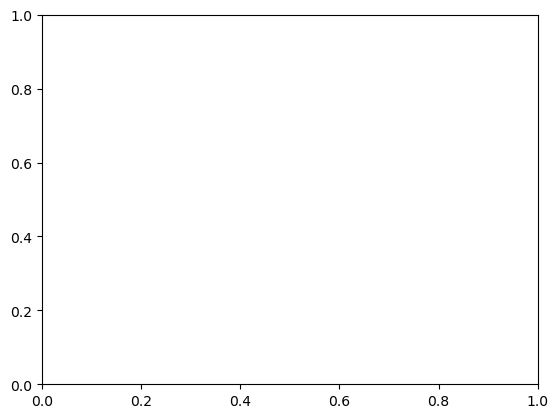

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Define the list of quantitative columns
quant_cols = ['completions', 'attempts', 'passing_yards',
              'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
              'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
              'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
              'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
              'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
              'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
              'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
              'receiving_air_yards', 'receiving_yards_after_catch',
              'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions',
              'racr', 'target_share', 'air_yards_share', 'wopr', 'special_teams_tds',
              'fantasy_points', 'fantasy_points_ppr']

# Define the feature columns and target column
X = grouped_by_week[quant_cols]
y = grouped_by_week['position_group']

# Train a Random Forest model to get feature importances
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Extract feature importances
feature_importances = clf.feature_importances_

# Sort the features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top N most important features (e.g., top 10)
top_n = 10
selected_feature_indices = sorted_indices[:top_n]

# Create a new dataframe with only the selected features
selected_features_df = X.iloc[:, selected_feature_indices]

# Apply K-Means clustering to the selected features
kmeans = KMeans(n_clusters=3, random_state=42) 
cluster_labels = kmeans.fit_predict(selected_features_df)

# Define marker shapes for each position_group
marker_shapes = {'QB': "o", 'RB': "s", 'TE': "^", 'WR': "D"}  # You can customize these shapes

# Create a list of marker shapes based on position_group
marker_list = [marker_shapes[group] for group in grouped_by_week['position_group']]

# Visualize the clusters with marker shapes
plt.scatter(selected_features_df.iloc[:, 0], selected_features_df.iloc[:, 1], c=cluster_labels, cmap='viridis', marker=marker_list)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend(handles=[plt.Line2D([0], [0], marker=marker, color='w', label=group, markersize=10) for group, marker in marker_shapes.items()])
plt.show()